In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy.stats import jarque_bera
from jqdata import *

index_code = '000016.XSHG'  # 指数的代码
start_date = '2018-01-01' #历史数据的开始日期
end_date = '2022-12-31' #历史数据的结束日期
test_start = '2023-01-01' #测试开始日期
test_end = '2024-6-30' #测试结束日期

weights = get_index_weights(index_code,test_start)
constituents = weights.index.tolist()  # 获取上证50指数的成分股列表


print(weights)

stock_price = get_price(constituents, start_date=test_start, end_date=test_end, frequency='daily', fields=['close'])
#print(stock_price)
#print(stock_price['close']['600009.XSHG'])

def find(constituents,start_date =start_date,end_date = end_date):
    n= len(constituents)
    max_codes = None
    maxr = 0.90 #相关性基准，相关性大于此基准将被选中
    selected = []#挑选出的股票
    total_p=0
    for i in range(len(constituents)):
        name1 = constituents[i]
        for j in range(i+1, len(constituents)) :#股票两两一组，遍历每一组股票
            name2 = constituents[j]
            price=get_price([name1,name2], start_date=start_date, end_date =end_date,fields='close')['close']
            r,p = pearsonr((price[name1]),(price[name2]))#求股票价格的相关性
            if r > maxr:  #根据相关性寻找配对股票
                model = sm.OLS(np.log(price[name1]),np.log(price[name2])).fit()#线性回归模型
                slope=model.params[0]#求价格比例
                jb_statistic, p_value = jarque_bera(np.log(price[name1])-slope*np.log(price[name2]))#求p值，p值越高，两股票价格差越趋近于正态分布，会在平均值上下震荡，可以有更多交易机会以获得更大收益
                max_codes=(name1,name2)
                print("找到高相关股票",max_codes,"r:",r,"p-value:", p_value)
                selected.append((name1,name2))  #将选取的股票加入备选组
                total_p += p_value   #计算总p值，方便求每组股票的p值比例，通常p值越大的价差更容易获利，可以提高交易数值以提升收益
    if selected == []:
        print("没有高相关股票")
    return selected,total_p

selected,total_p = find(constituents)
print(selected)
print(total_p)


                   date  weight display_name
code                                        
600010.XSHG  2022-12-30   0.655         包钢股份
600028.XSHG  2022-12-30   0.873         中国石化
600030.XSHG  2022-12-30   2.910         中信证券
600031.XSHG  2022-12-30   1.406         三一重工
600036.XSHG  2022-12-30   6.905         招商银行
600104.XSHG  2022-12-30   1.008         上汽集团
600111.XSHG  2022-12-30   0.818         北方稀土
600196.XSHG  2022-12-30   0.670         复星医药
600276.XSHG  2022-12-30   2.576         恒瑞医药
600309.XSHG  2022-12-30   2.613         万华化学
600346.XSHG  2022-12-30   0.491         恒力石化
600406.XSHG  2022-12-30   1.223         国电南瑞
600436.XSHG  2022-12-30   1.303          片仔癀
600438.XSHG  2022-12-30   1.560         通威股份
600519.XSHG  2022-12-30  16.242         贵州茅台
600585.XSHG  2022-12-30   0.984         海螺水泥
600690.XSHG  2022-12-30   1.386         海尔智家
600745.XSHG  2022-12-30   0.589         闻泰科技
600809.XSHG  2022-12-30   2.082         山西汾酒
600887.XSHG  2022-12-30   2.970         伊利股份
600893.XSH

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:120: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  round=round)
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarni

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600028.XSHG', '601857.XSHG') r: 0.9105897907246147 p-value: 1.0887777260881748e-06


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600031.XSHG', '600346.XSHG') r: 0.9292410091820315 p-value: 2.2554883516434643e-09


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600031.XSHG', '603288.XSHG') r: 0.9342693809002562 p-value: 2.5069932019228247e-07


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600036.XSHG', '603501.XSHG') r: 0.9092550868216096 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600111.XSHG', '600406.XSHG') r: 0.9207825946310882 p-value: 1.2165433105337797e-09


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600111.XSHG', '603260.XSHG') r: 0.9435075905310286 p-value: 2.3875177728172048e-05


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600309.XSHG', '600346.XSHG') r: 0.9293755845229544 p-value: 4.771738559838923e-13
找到高相关股票 ('600309.XSHG', '600436.XSHG') r: 0.9403575295060396 p-value: 0.0010721356934852988
找到高相关股票 ('600309.XSHG', '600438.XSHG') r: 0.9018702961802946 p-value: 2.924129827164279e-09
找到高相关股票 ('600309.XSHG', '600519.XSHG') r: 0.934598688119419 p-value: 0.0
找到高相关股票 ('600309.XSHG', '600690.XSHG') r: 0.9367206771772514 p-value: 0.0
找到高相关股票 ('600309.XSHG', '600809.XSHG') r: 0.9577724316234734 p-value: 0.0
找到高相关股票 ('600309.XSHG', '600893.XSHG') r: 0.9169594260974684 p-value: 3.617268673594687e-06


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600309.XSHG', '601899.XSHG') r: 0.9517721211516474 p-value: 0.0
找到高相关股票 ('600309.XSHG', '601888.XSHG') r: 0.9552477980613884 p-value: 1.2451106812250146e-10
找到高相关股票 ('600309.XSHG', '601012.XSHG') r: 0.9467938550005497 p-value: 6.394884621840902e-14


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600346.XSHG', '600690.XSHG') r: 0.9002869048600691 p-value: 0.049992573662383855
找到高相关股票 ('600346.XSHG', '601888.XSHG') r: 0.928053831345904 p-value: 9.100683178053792e-06


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600406.XSHG', '600438.XSHG') r: 0.9142972676049086 p-value: 9.571232695293475e-13
找到高相关股票 ('600406.XSHG', '601012.XSHG') r: 0.9058887747987767 p-value: 1.874833621684502e-12


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600436.XSHG', '600519.XSHG') r: 0.9029127611435005 p-value: 1.9051427102567686e-13
找到高相关股票 ('600436.XSHG', '600809.XSHG') r: 0.9669471204983044 p-value: 0.0
找到高相关股票 ('600436.XSHG', '600893.XSHG') r: 0.9094990953899644 p-value: 3.047425645164026e-10
找到高相关股票 ('600436.XSHG', '601919.XSHG') r: 0.9169018025581127 p-value: 0.0
找到高相关股票 ('600436.XSHG', '601899.XSHG') r: 0.9273947953284207 p-value: 0.0
找到高相关股票 ('600436.XSHG', '601633.XSHG') r: 0.9370911563686596 p-value: 0.0
找到高相关股票 ('600436.XSHG', '601012.XSHG') r: 0.9612766826269735 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600438.XSHG', '600809.XSHG') r: 0.9485470432830563 p-value: 0.0
找到高相关股票 ('600438.XSHG', '600900.XSHG') r: 0.9065387578954595 p-value: 0.0
找到高相关股票 ('600438.XSHG', '601899.XSHG') r: 0.9149144473724229 p-value: 8.09918576649693e-10
找到高相关股票 ('600438.XSHG', '601012.XSHG') r: 0.9713754693574816 p-value: 4.1566164066253464e-08


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600519.XSHG', '600809.XSHG') r: 0.920282302811031 p-value: 0.0
找到高相关股票 ('600519.XSHG', '600887.XSHG') r: 0.90339560364279 p-value: 0.00014965398104094252
找到高相关股票 ('600519.XSHG', '601888.XSHG') r: 0.9377739690498006 p-value: 0.0
找到高相关股票 ('600519.XSHG', '601012.XSHG') r: 0.9126847084799686 p-value: 0.0
找到高相关股票 ('600519.XSHG', '603288.XSHG') r: 0.908330142615691 p-value: 0.44139637676511545


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600690.XSHG', '601899.XSHG') r: 0.9203188068398254 p-value: 0.0
找到高相关股票 ('600690.XSHG', '601888.XSHG') r: 0.9035023131360385 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600745.XSHG', '603986.XSHG') r: 0.9060659054573998 p-value: 6.645471295474437e-08
找到高相关股票 ('600809.XSHG', '600893.XSHG') r: 0.9057774844699923 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600809.XSHG', '601919.XSHG') r: 0.9272019262953222 p-value: 1.49776857583106e-11
找到高相关股票 ('600809.XSHG', '601899.XSHG') r: 0.9599133626149507 p-value: 1.342603805909448e-10
找到高相关股票 ('600809.XSHG', '601633.XSHG') r: 0.9179436186847535 p-value: 0.00020940733589891458
找到高相关股票 ('600809.XSHG', '601012.XSHG') r: 0.9786355903391005 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('600893.XSHG', '601899.XSHG') r: 0.9025950850092135 p-value: 0.0
找到高相关股票 ('600893.XSHG', '601633.XSHG') r: 0.9239509765070263 p-value: 0.0
找到高相关股票 ('600893.XSHG', '601012.XSHG') r: 0.9307386302216625 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('601919.XSHG', '601633.XSHG') r: 0.9165838540877553 p-value: 0.0
找到高相关股票 ('601919.XSHG', '601012.XSHG') r: 0.9119485839846282 p-value: 2.8926705475385006e-08
找到高相关股票 ('601919.XSHG', '603799.XSHG') r: 0.9272292097434671 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('601088.XSHG', '601225.XSHG') r: 0.9647817117636295 p-value: 1.7763568394002505e-15


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('601899.XSHG', '601012.XSHG') r: 0.9520527786506853 p-value: 2.1273982575564787e-11


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('601633.XSHG', '601012.XSHG') r: 0.9314125869973063 p-value: 3.410342378495912e-07
找到高相关股票 ('601633.XSHG', '603799.XSHG') r: 0.9096461691388643 p-value: 0.0
找到高相关股票 ('601888.XSHG', '603288.XSHG') r: 0.9143943359099742 p-value: 8.654450462541874e-05


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('601012.XSHG', '603799.XSHG') r: 0.9002628646453241 p-value: 0.0


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

找到高相关股票 ('603986.XSHG', '603501.XSHG') r: 0.9071880449122526 p-value: 1.5747414483513467e-10


/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

[('600028.XSHG', '601857.XSHG'), ('600031.XSHG', '600346.XSHG'), ('600031.XSHG', '603288.XSHG'), ('600036.XSHG', '603501.XSHG'), ('600111.XSHG', '600406.XSHG'), ('600111.XSHG', '603260.XSHG'), ('600309.XSHG', '600346.XSHG'), ('600309.XSHG', '600436.XSHG'), ('600309.XSHG', '600438.XSHG'), ('600309.XSHG', '600519.XSHG'), ('600309.XSHG', '600690.XSHG'), ('600309.XSHG', '600809.XSHG'), ('600309.XSHG', '600893.XSHG'), ('600309.XSHG', '601899.XSHG'), ('600309.XSHG', '601888.XSHG'), ('600309.XSHG', '601012.XSHG'), ('600346.XSHG', '600690.XSHG'), ('600346.XSHG', '601888.XSHG'), ('600406.XSHG', '600438.XSHG'), ('600406.XSHG', '601012.XSHG'), ('600436.XSHG', '600519.XSHG'), ('600436.XSHG', '600809.XSHG'), ('600436.XSHG', '600893.XSHG'), ('600436.XSHG', '601919.XSHG'), ('600436.XSHG', '601899.XSHG'), ('600436.XSHG', '601633.XSHG'), ('600436.XSHG', '601012.XSHG'), ('600438.XSHG', '600809.XSHG'), ('600438.XSHG', '600900.XSHG'), ('600438.XSHG', '601899.XSHG'), ('600438.XSHG', '601012.XSHG'), ('60051

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

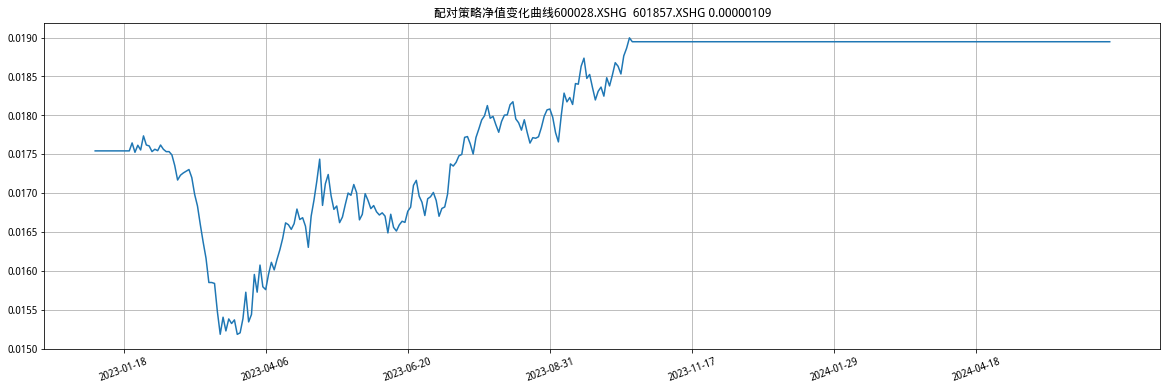

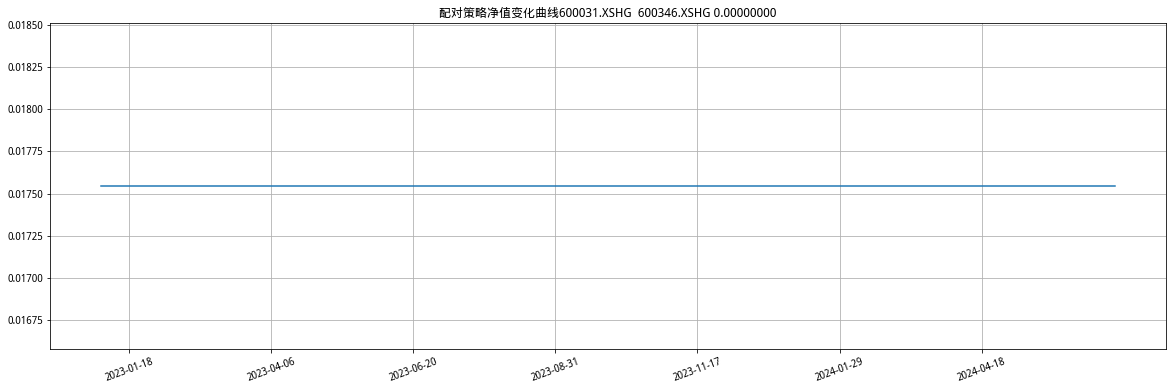

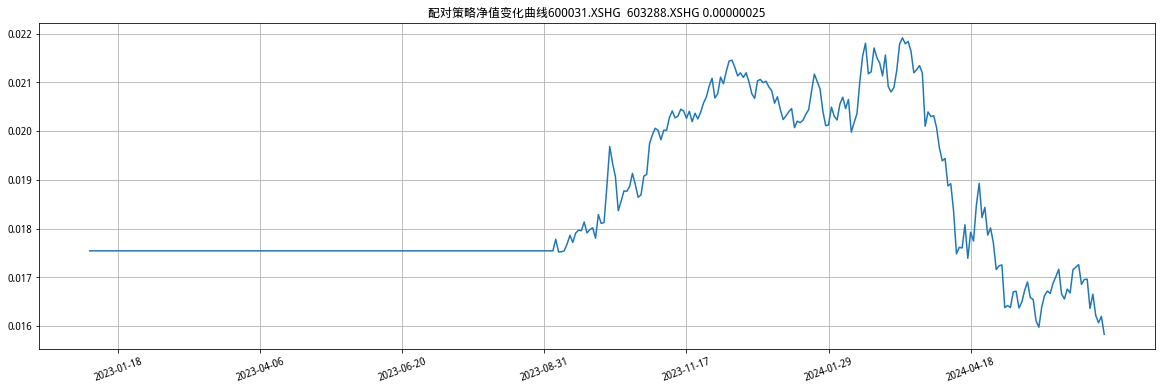

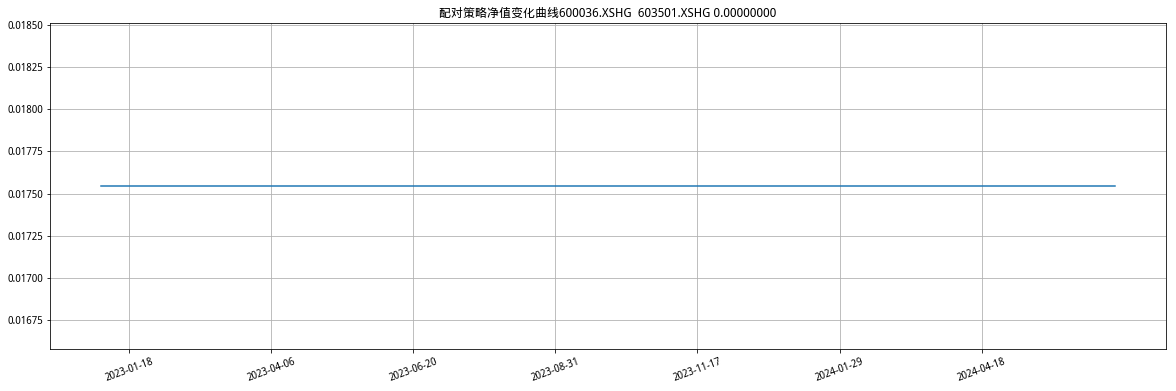

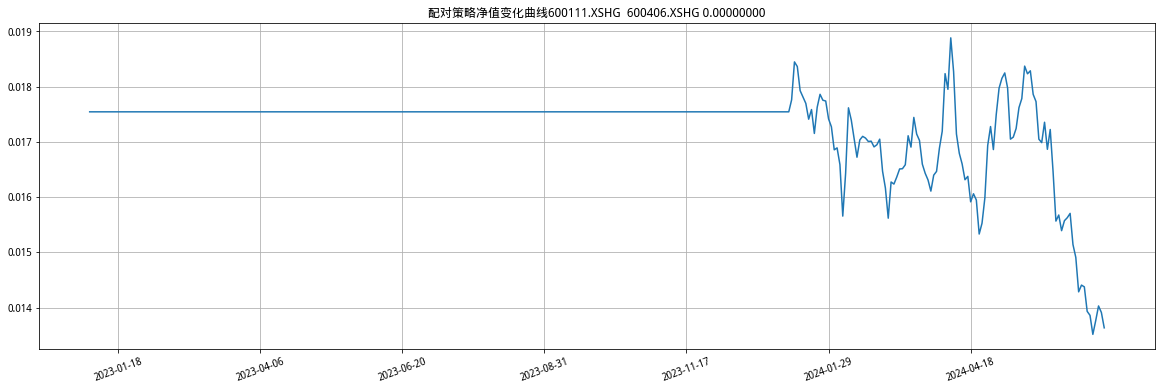

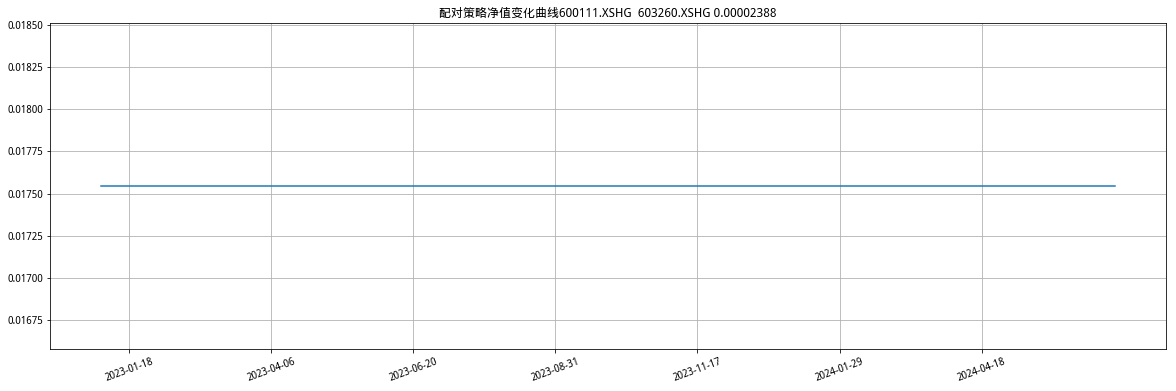

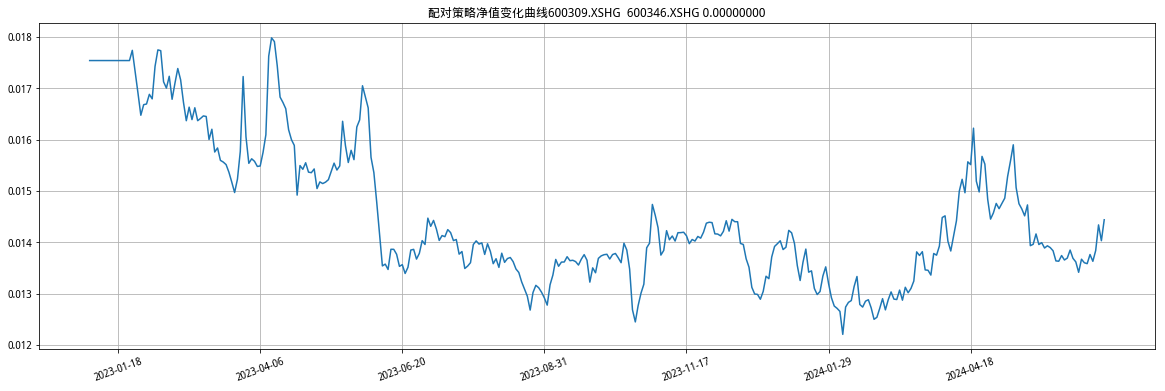

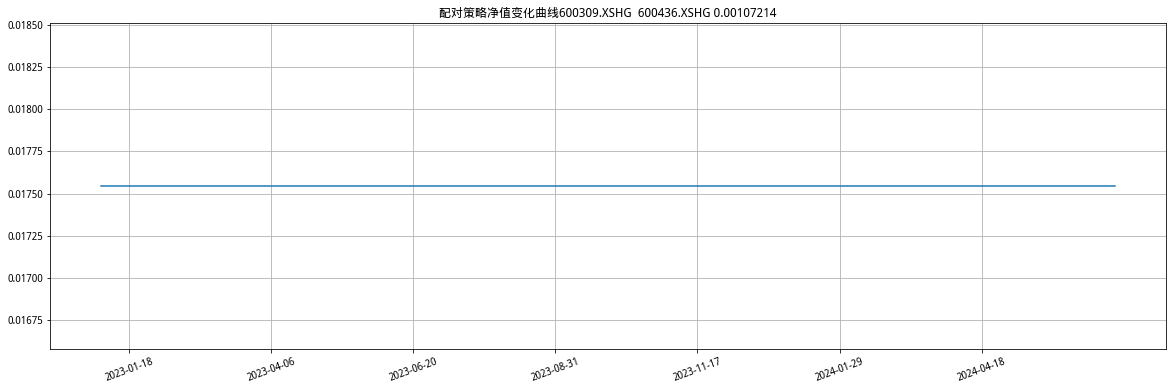

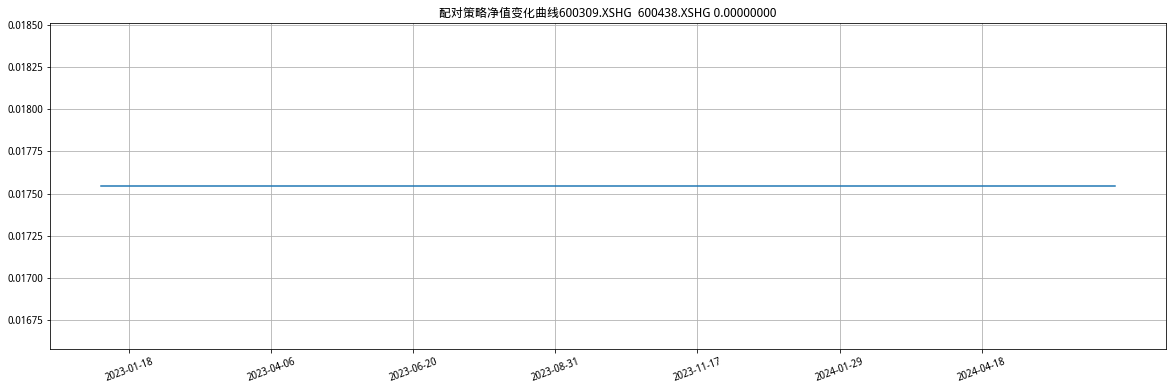

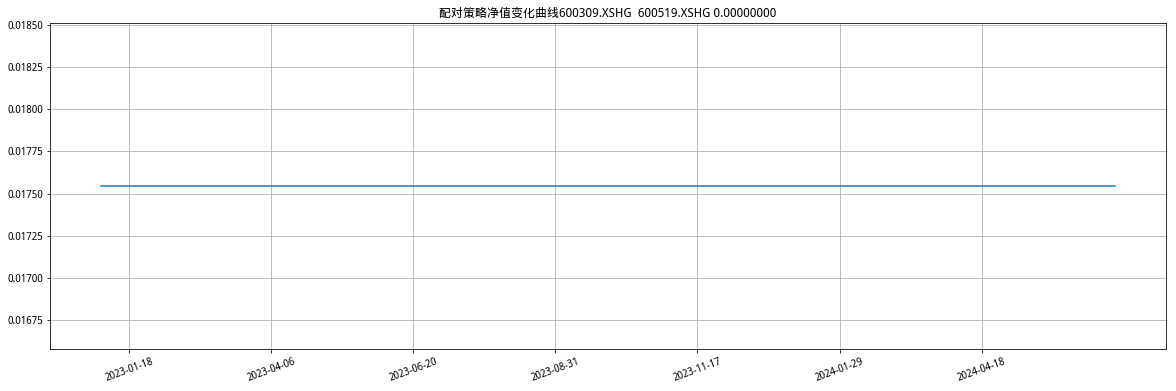

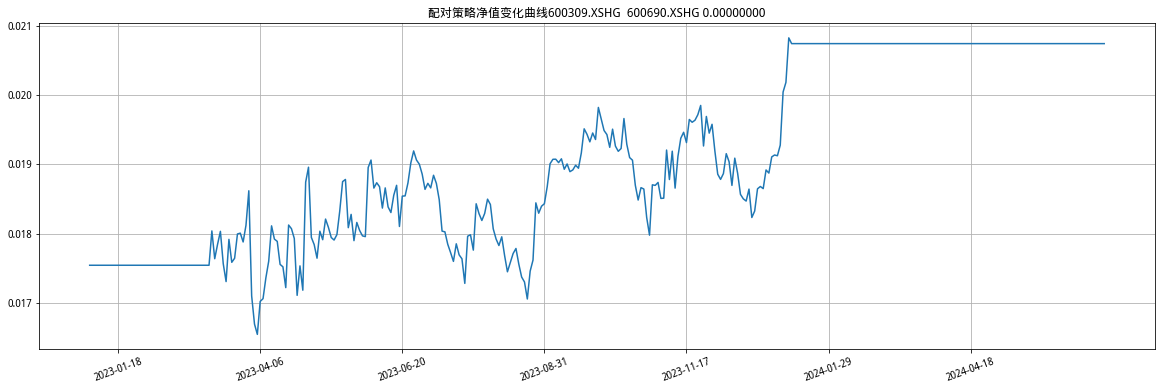

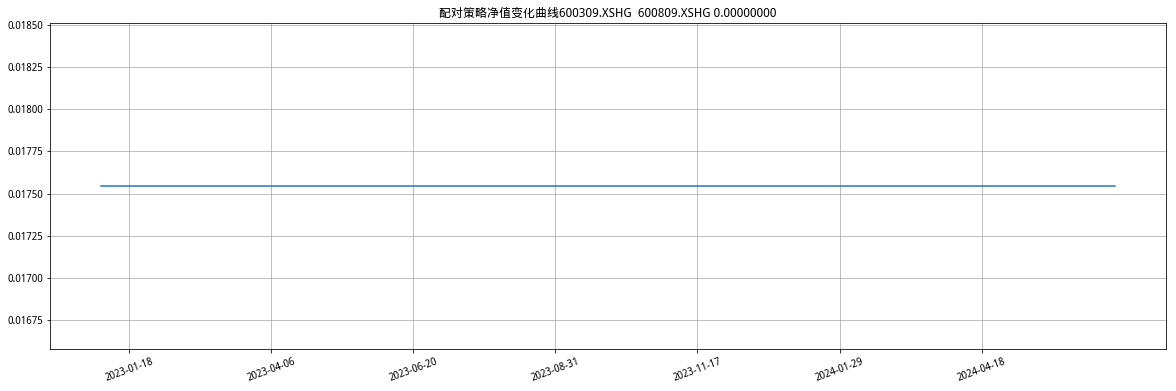

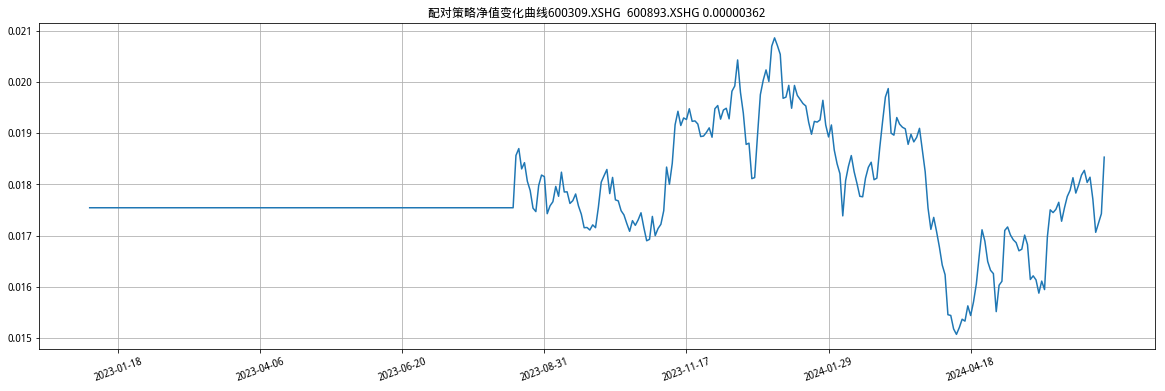

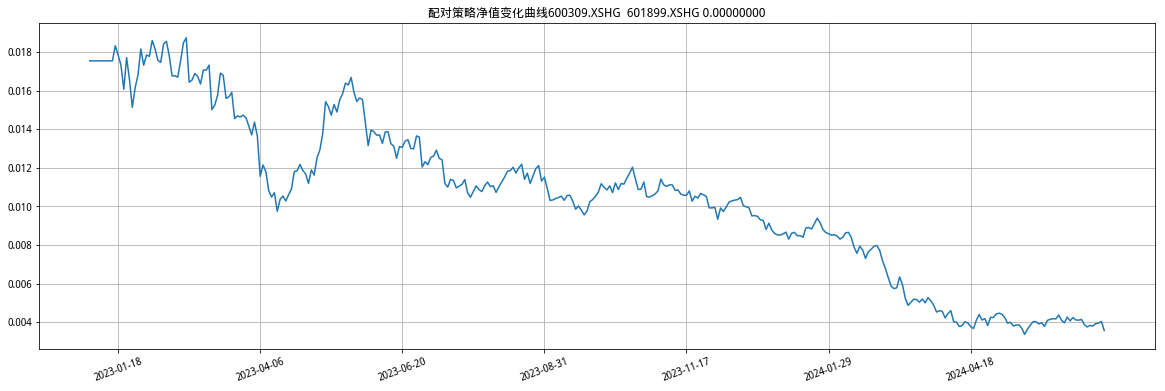

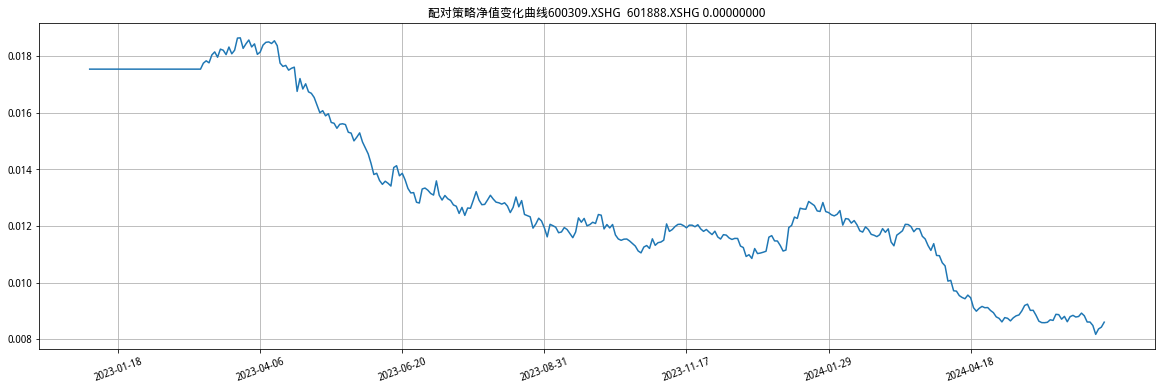

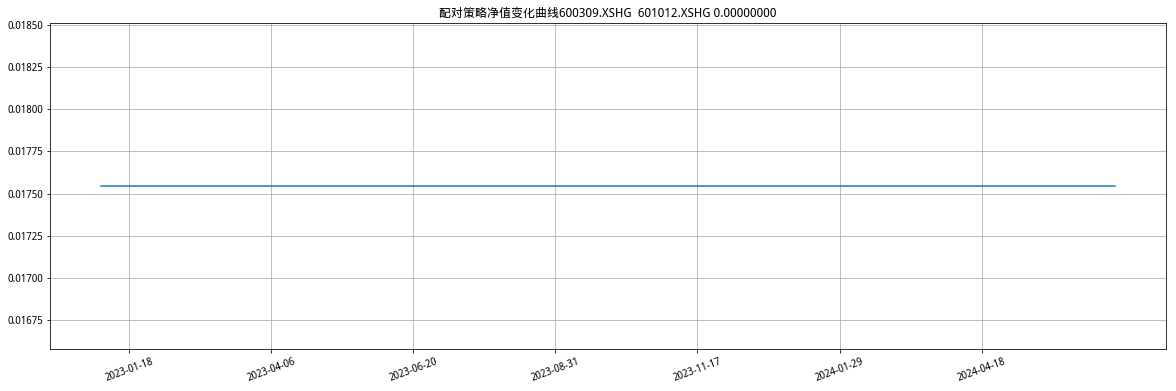

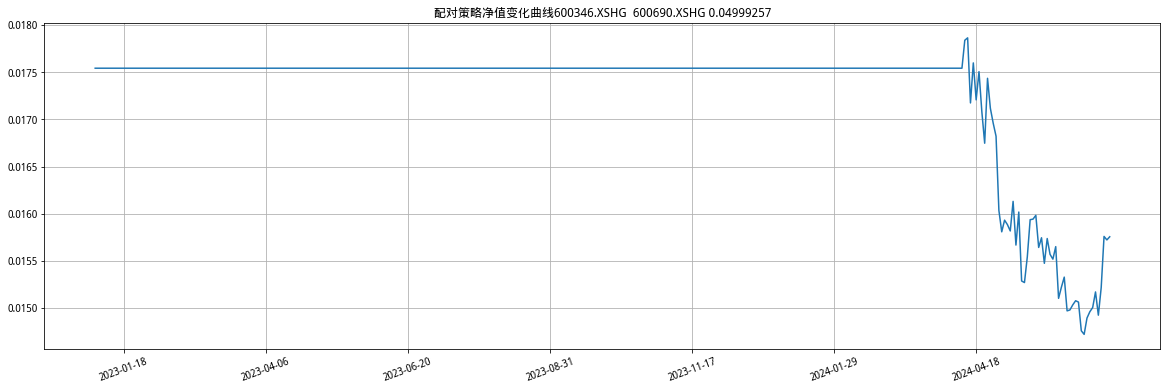

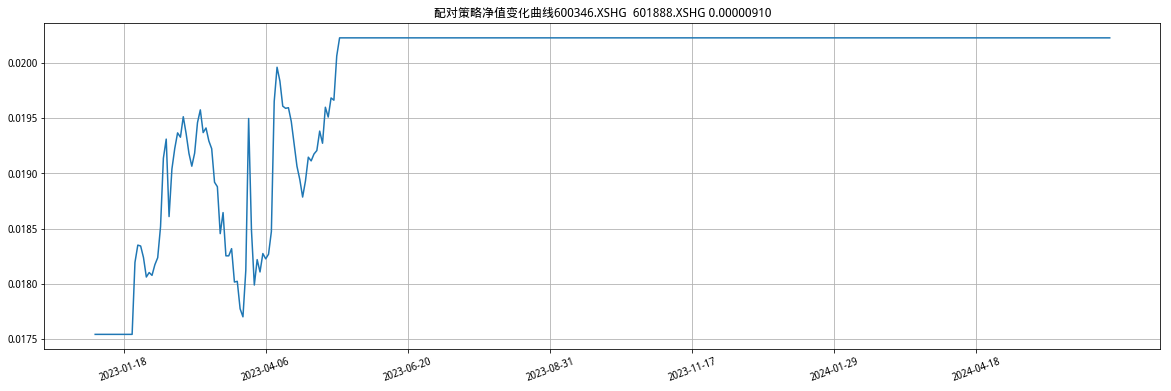

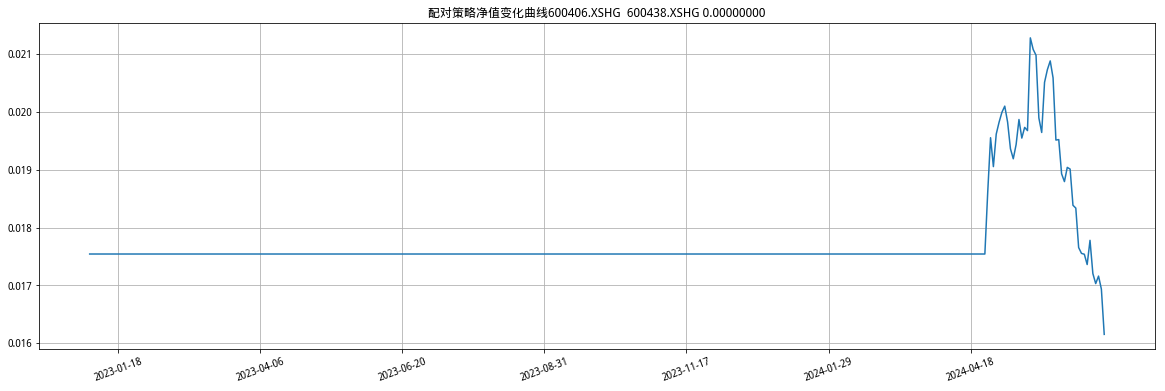

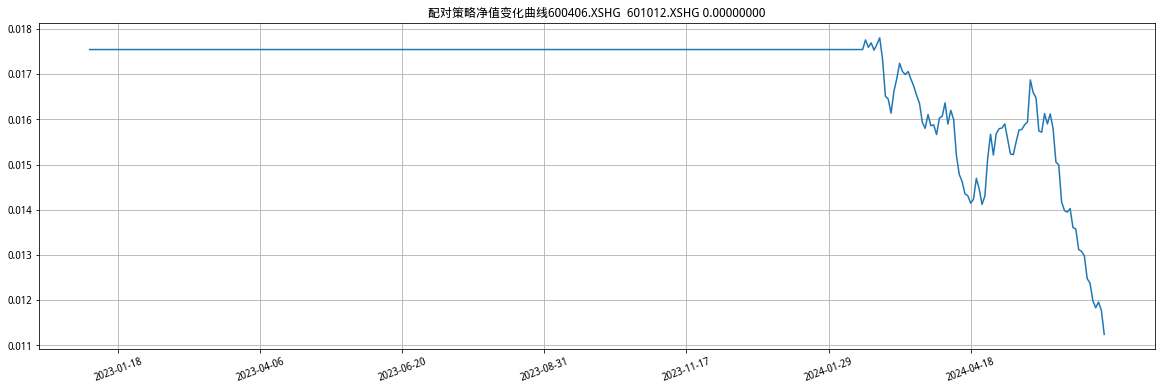

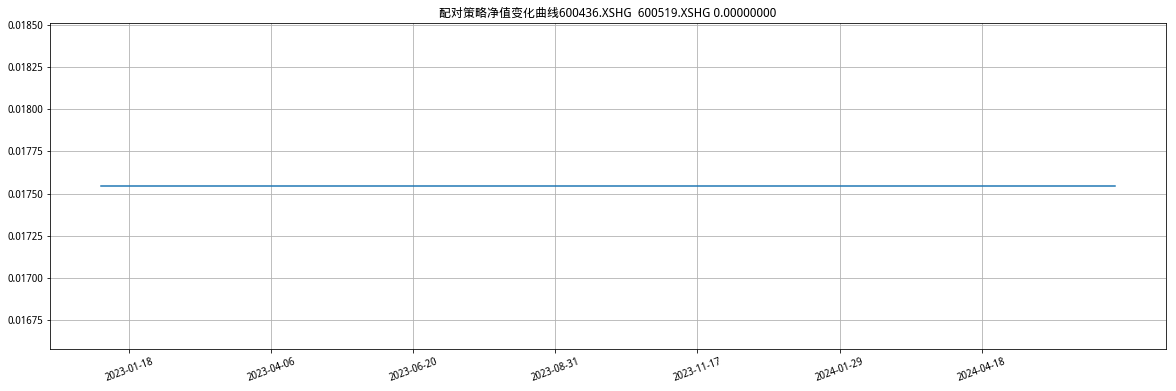

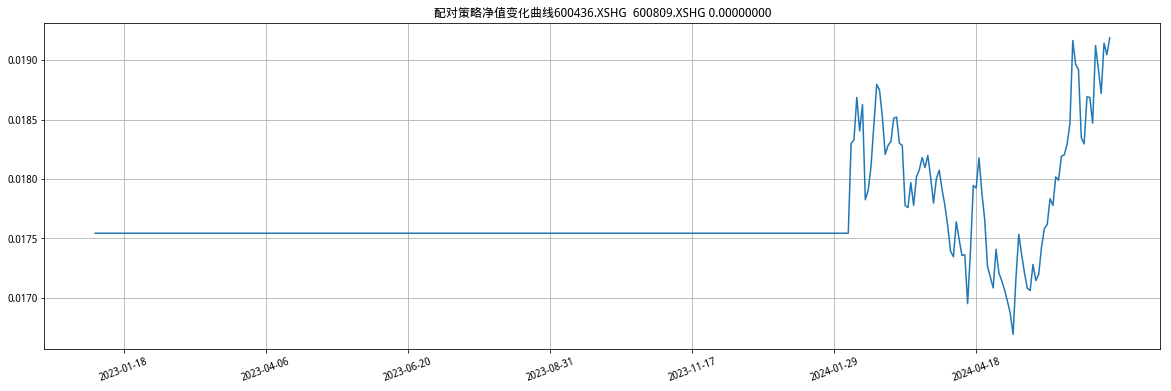

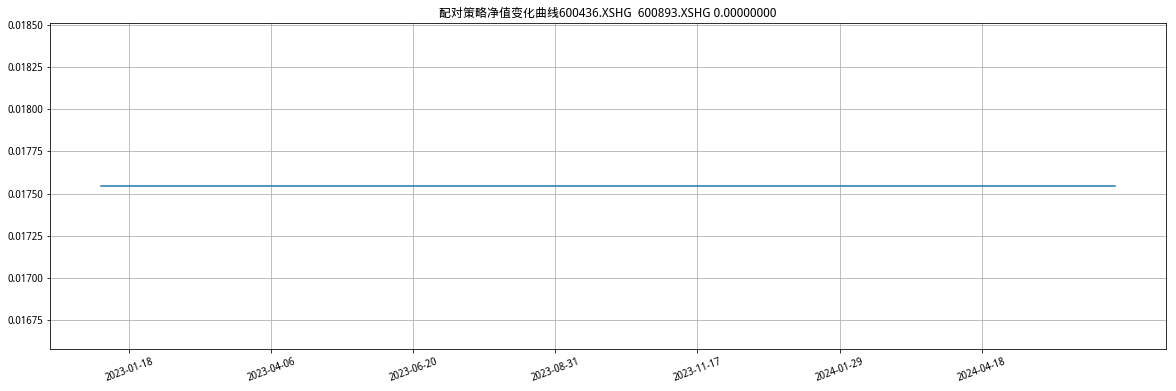

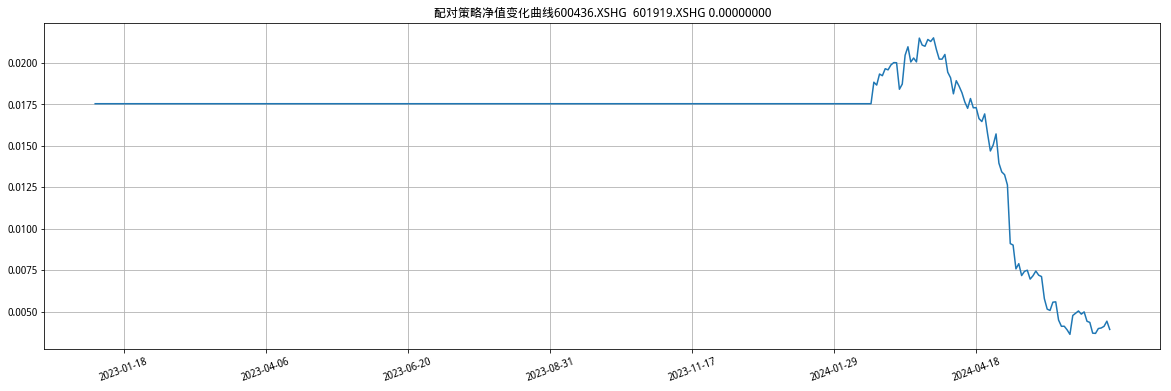

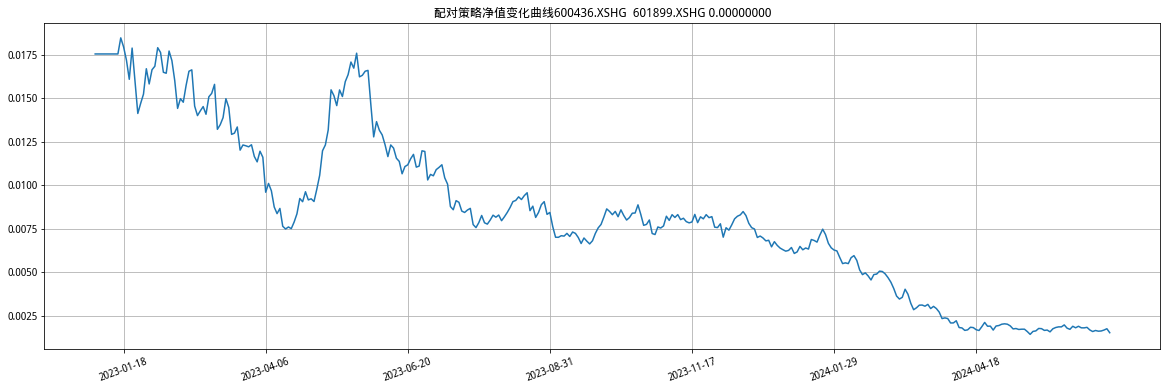

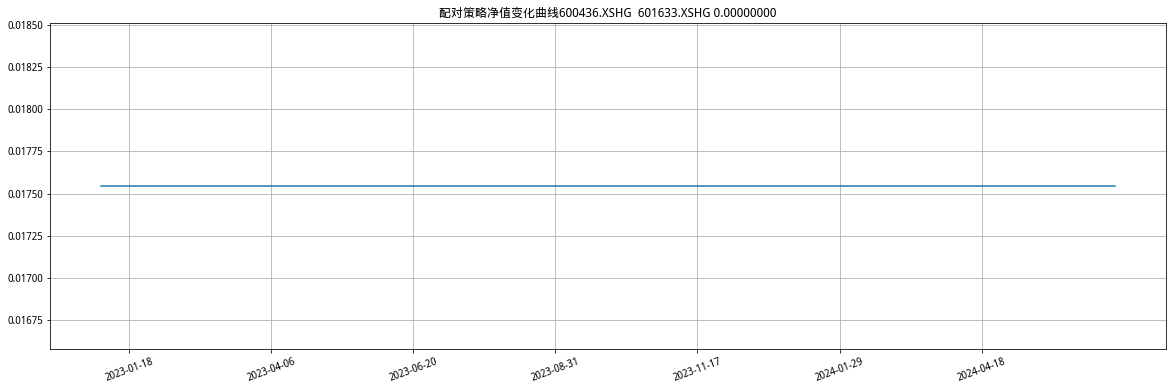

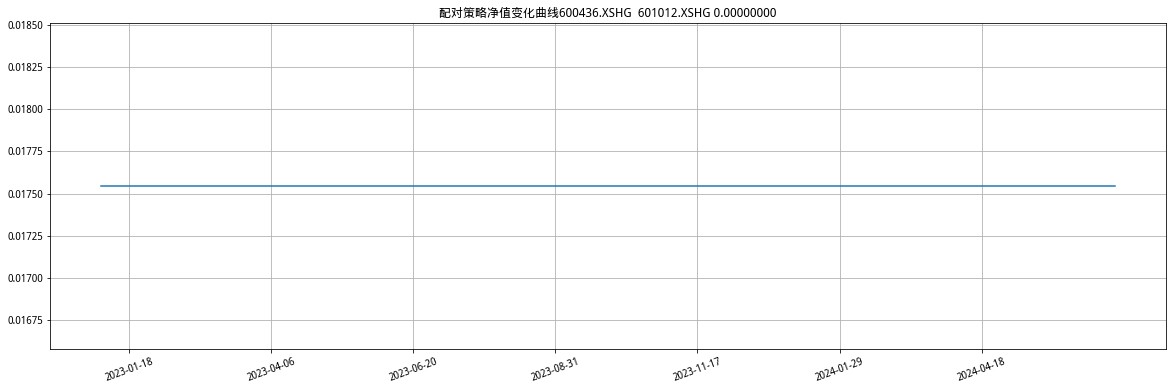

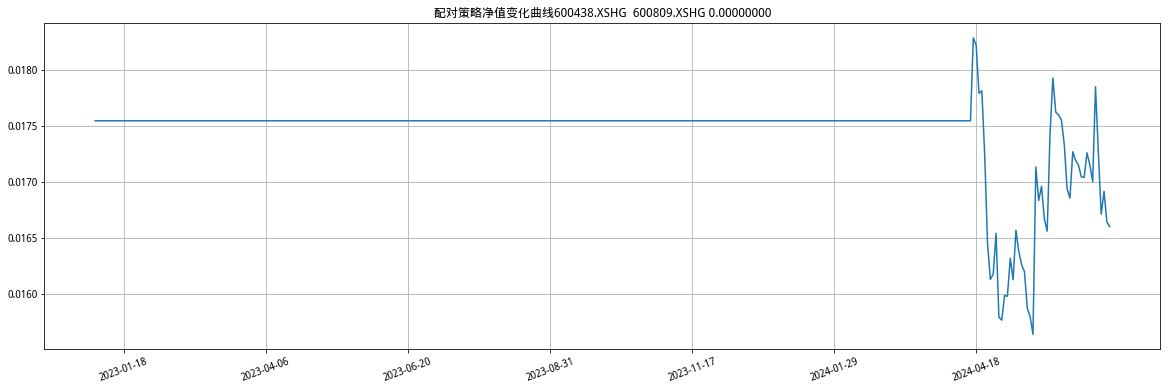

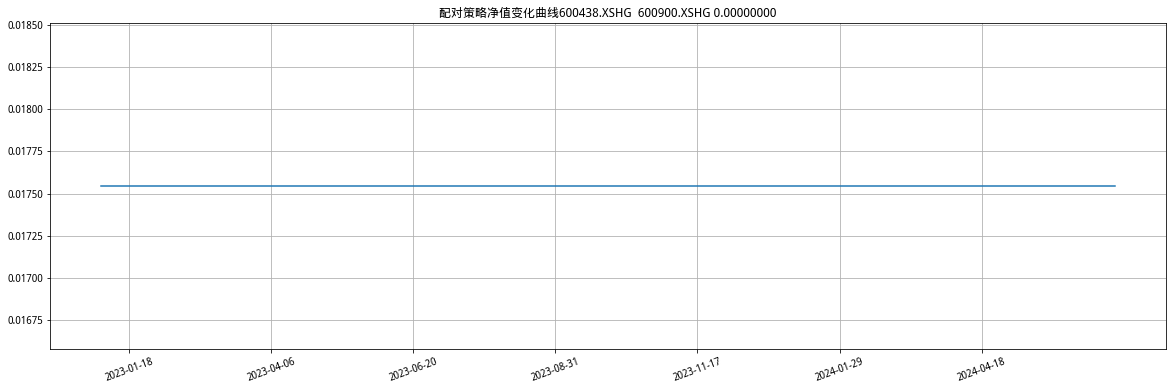

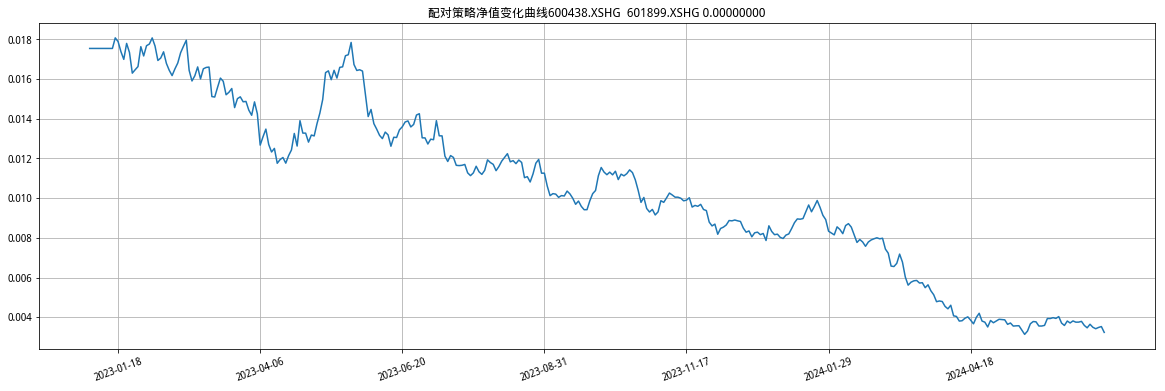

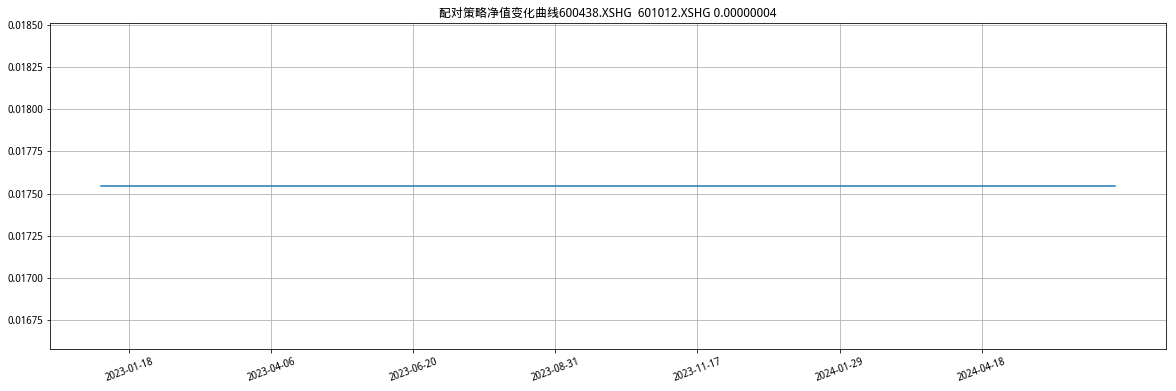

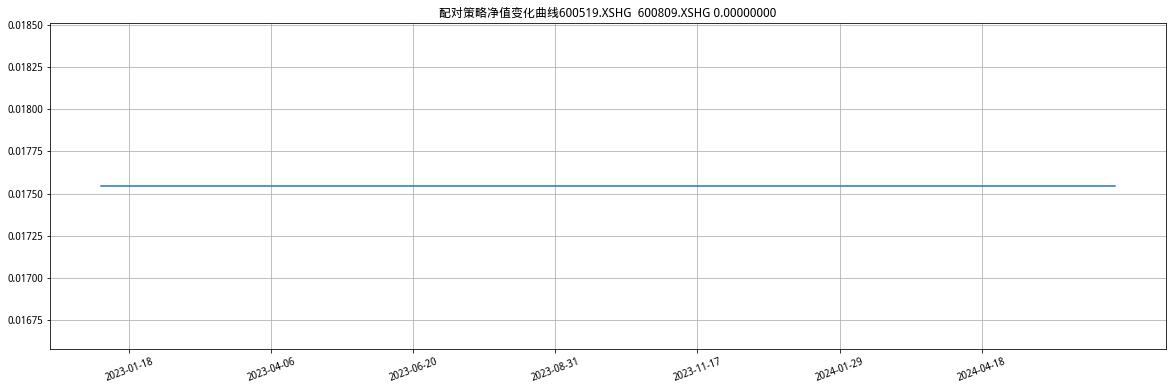

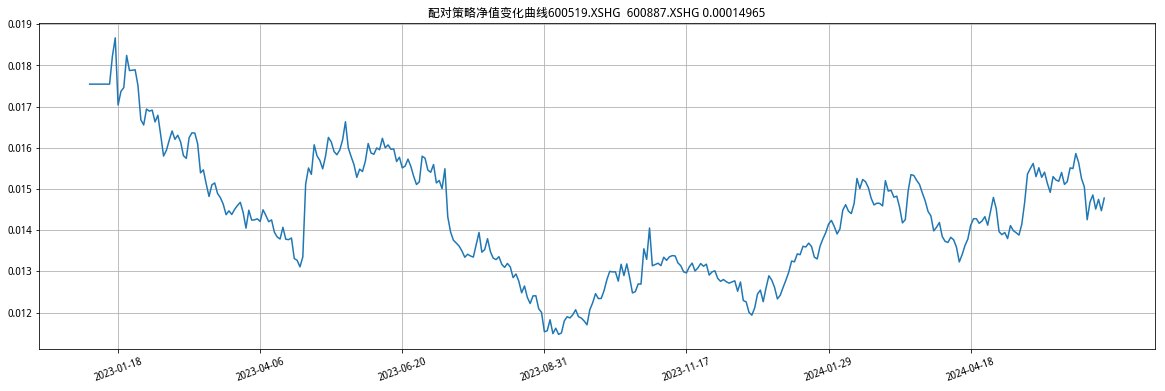

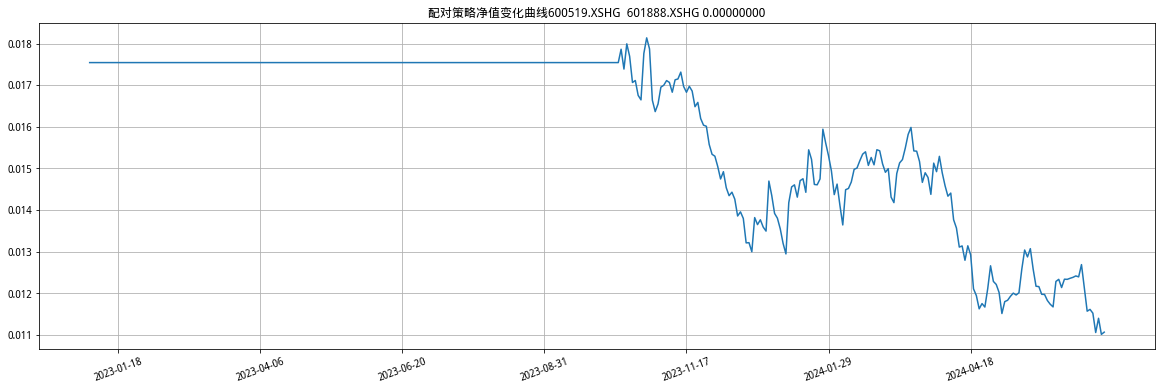

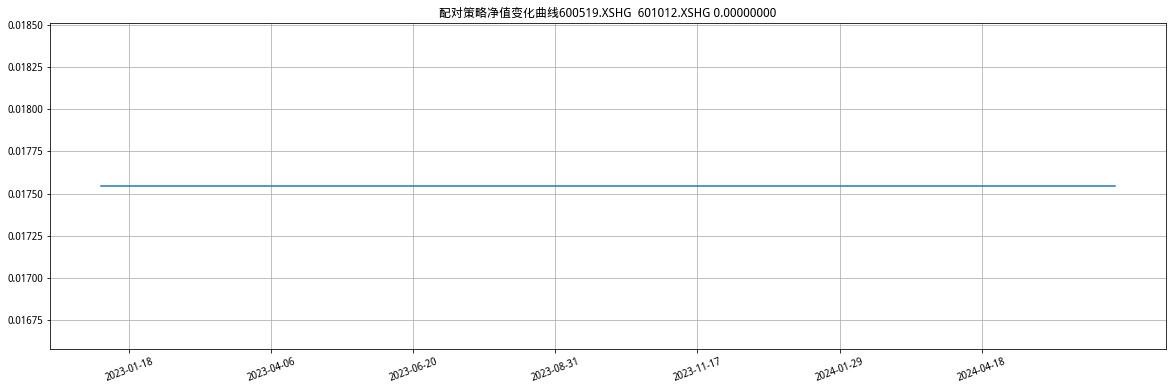

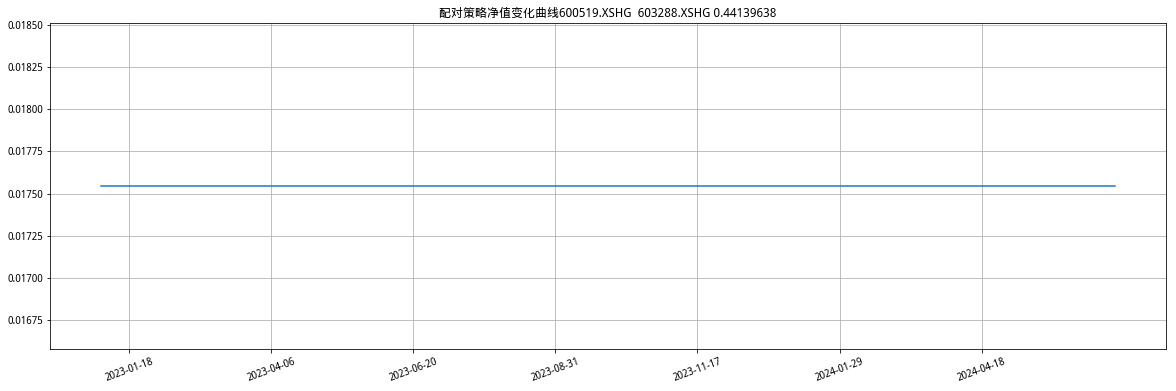

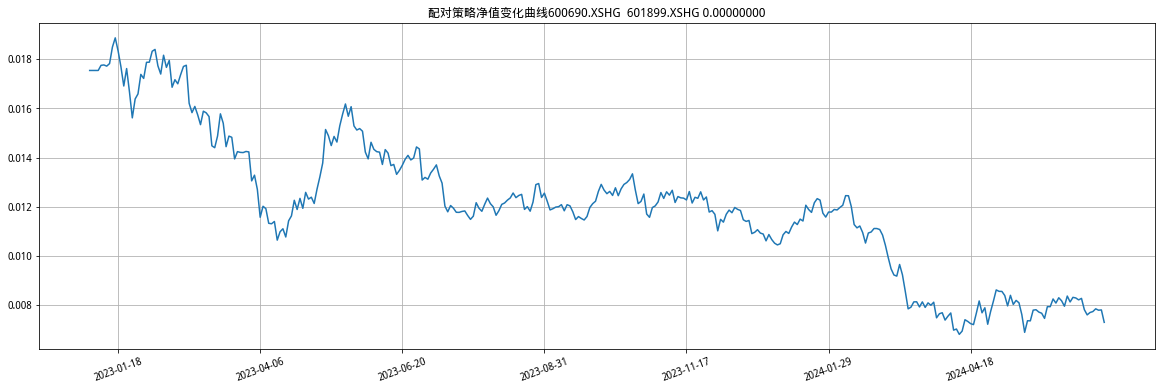

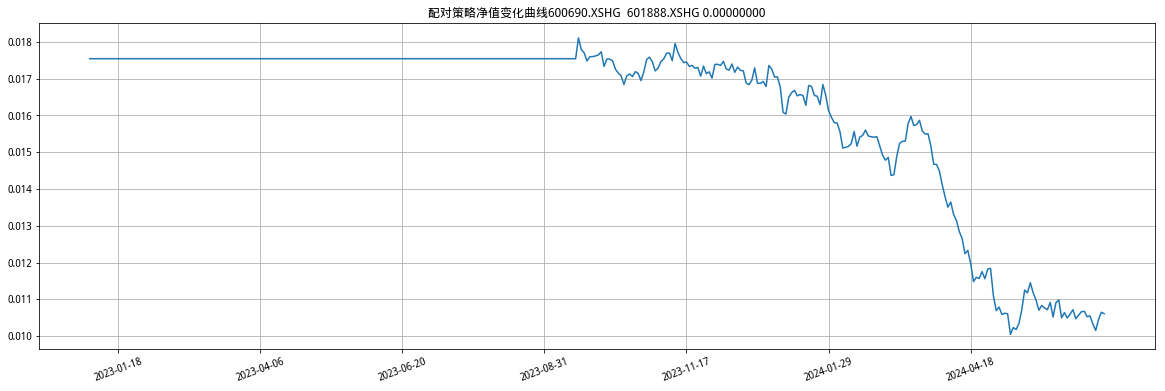

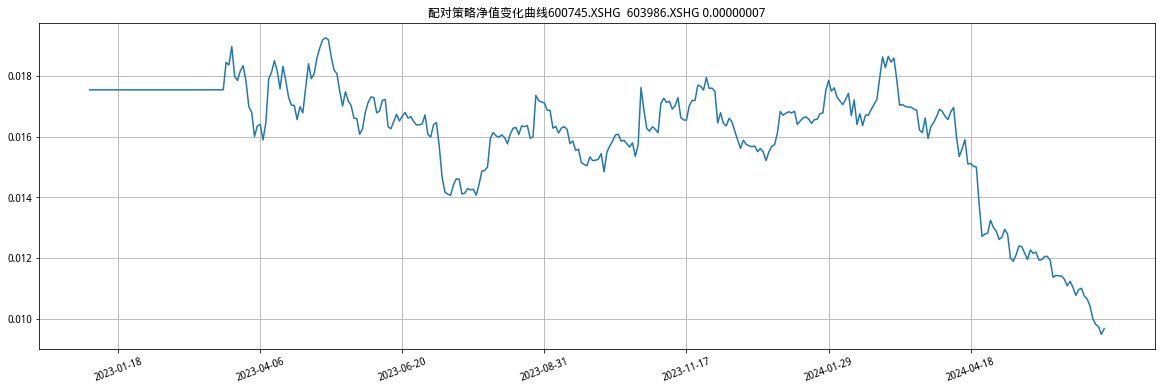

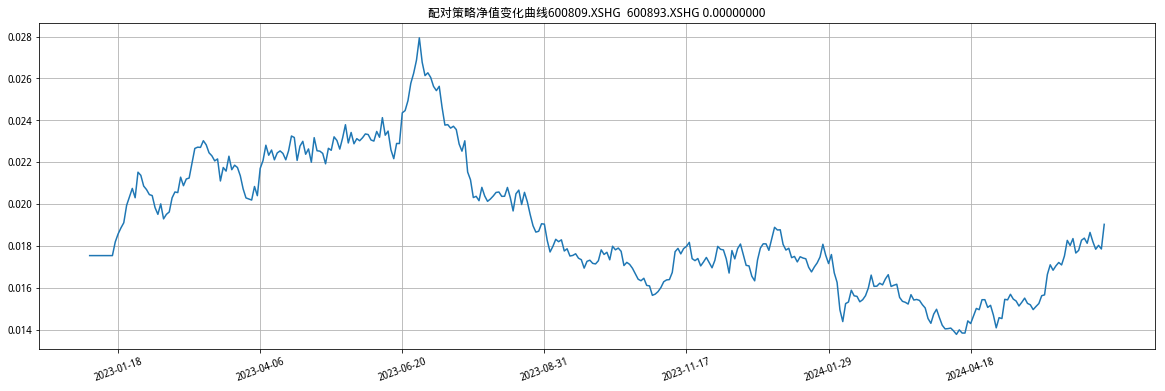

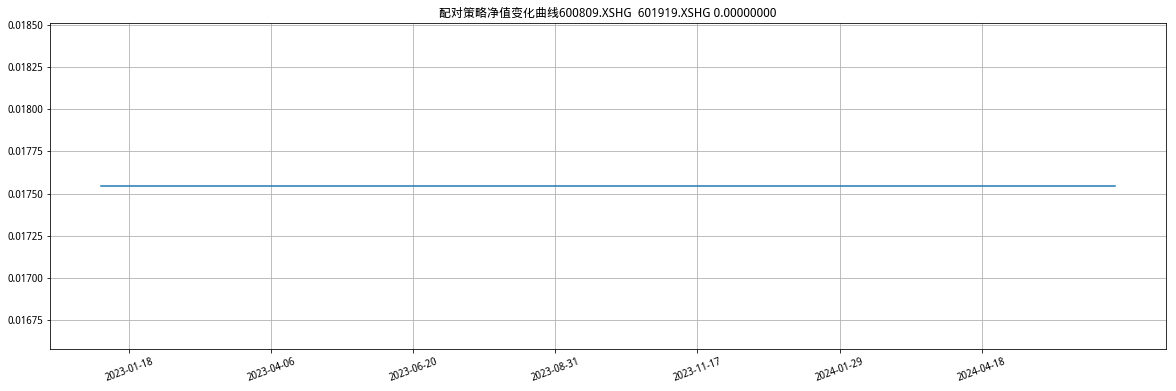

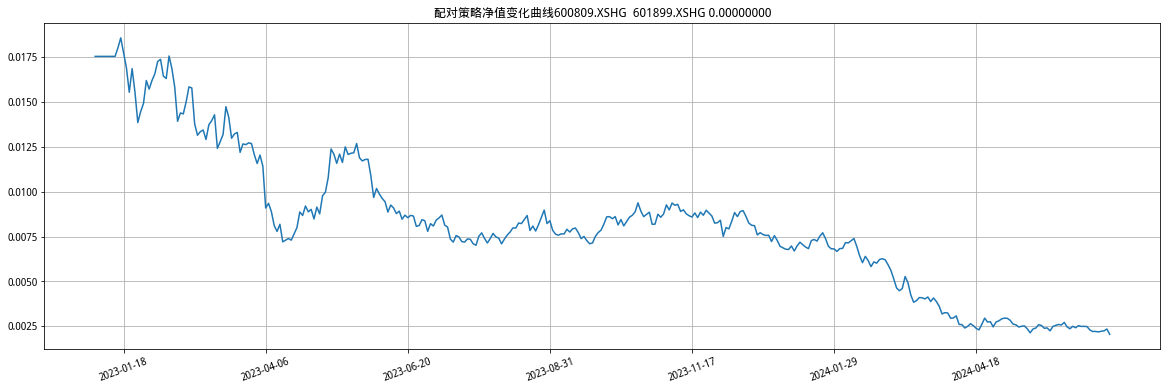

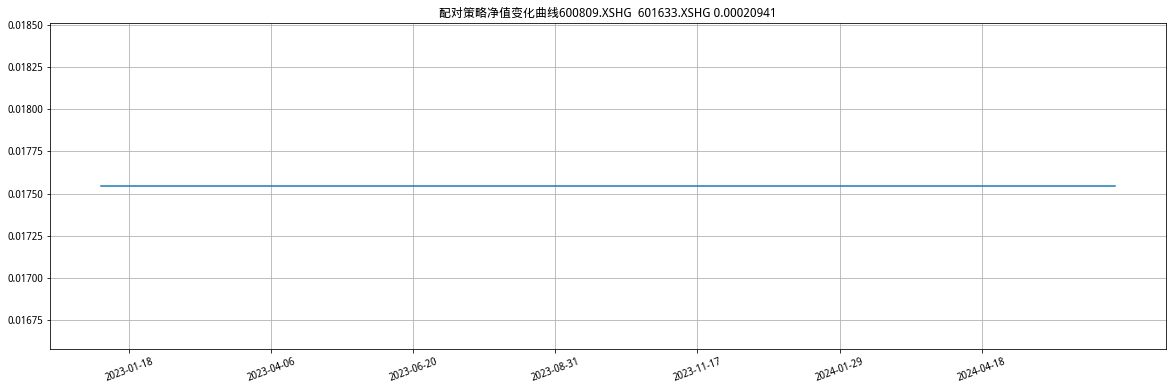

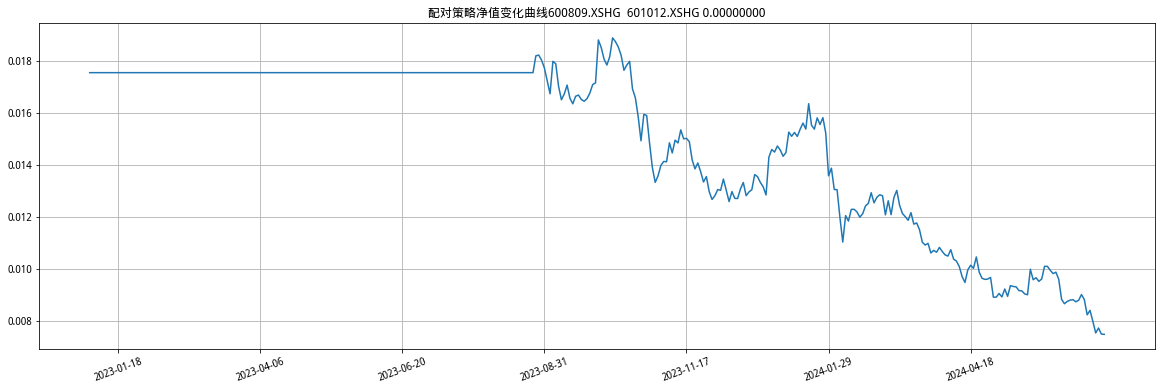

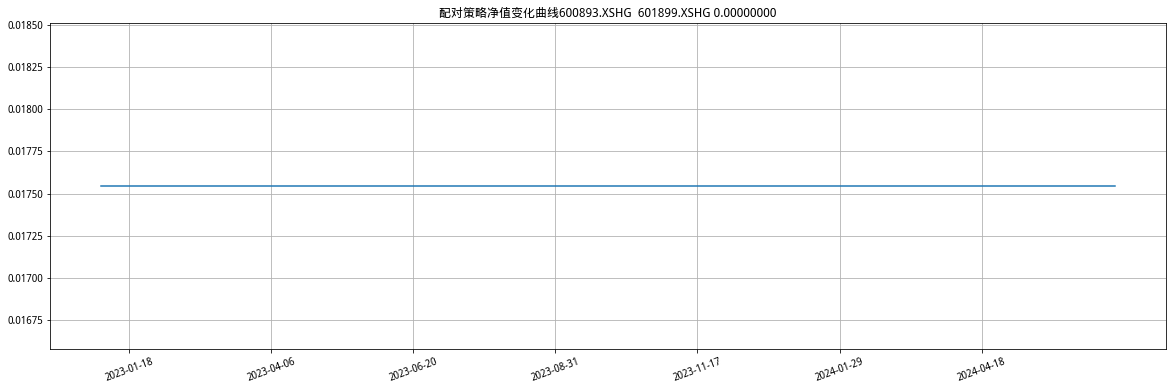

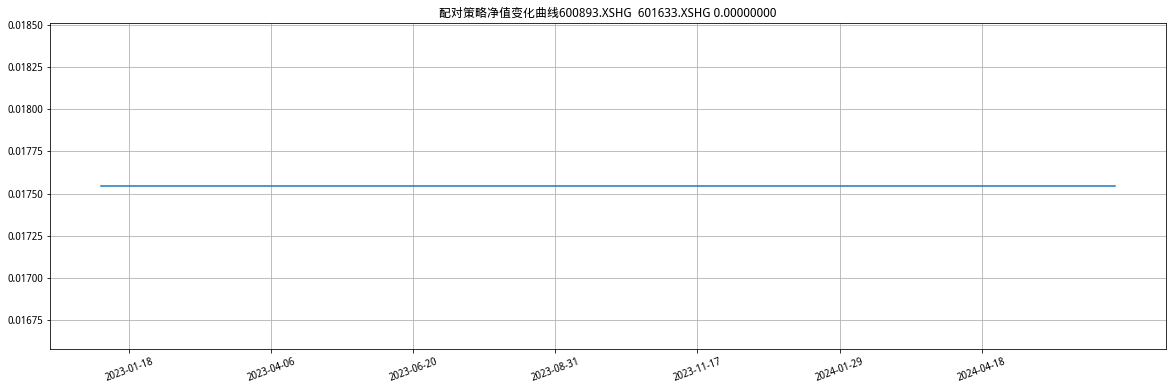

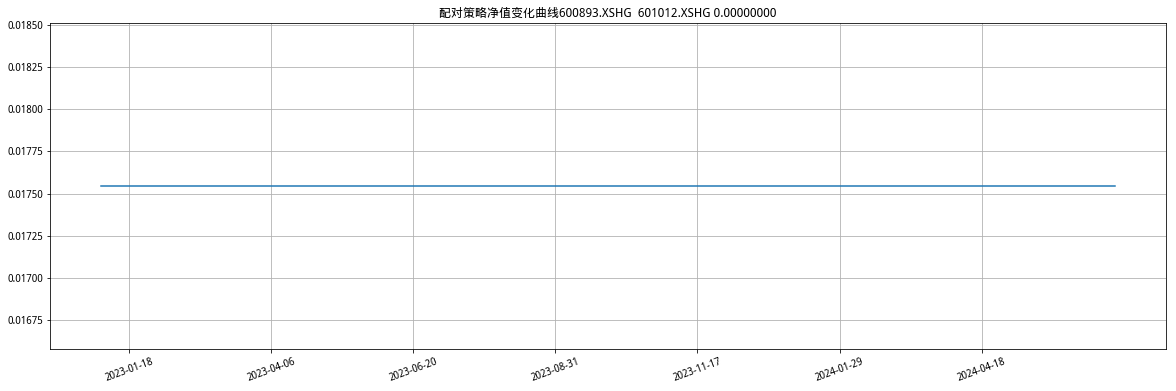

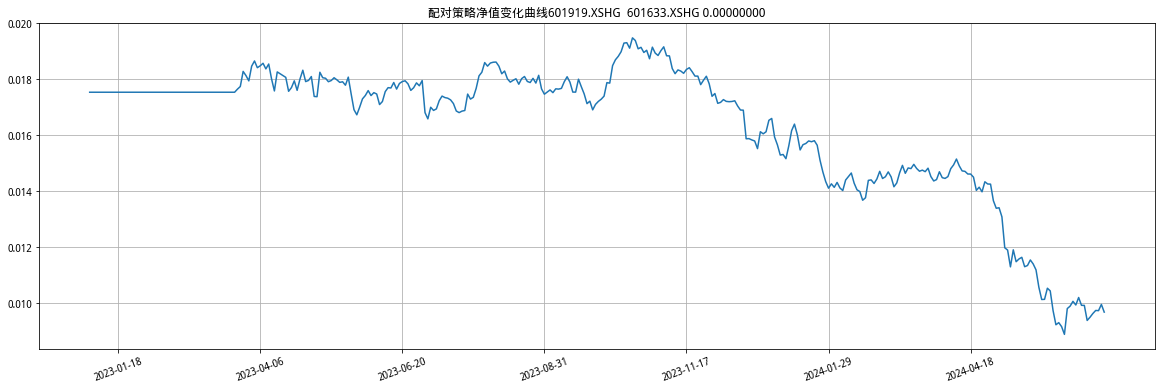

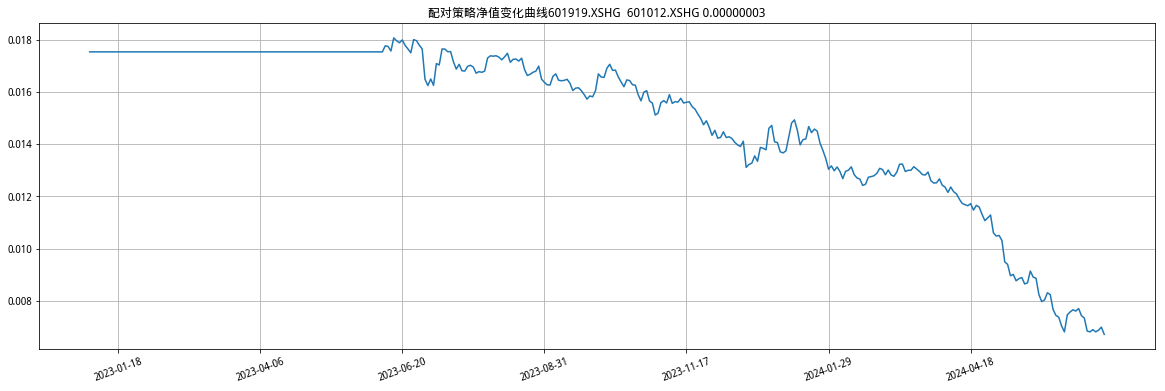

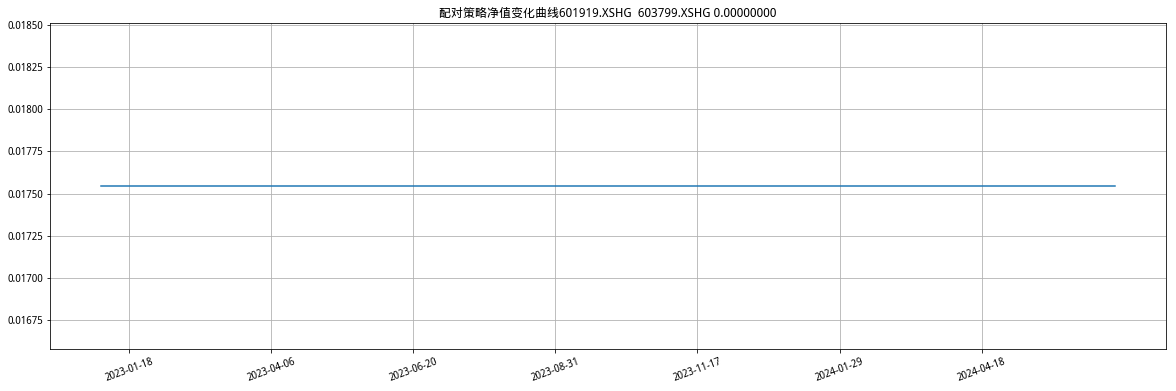

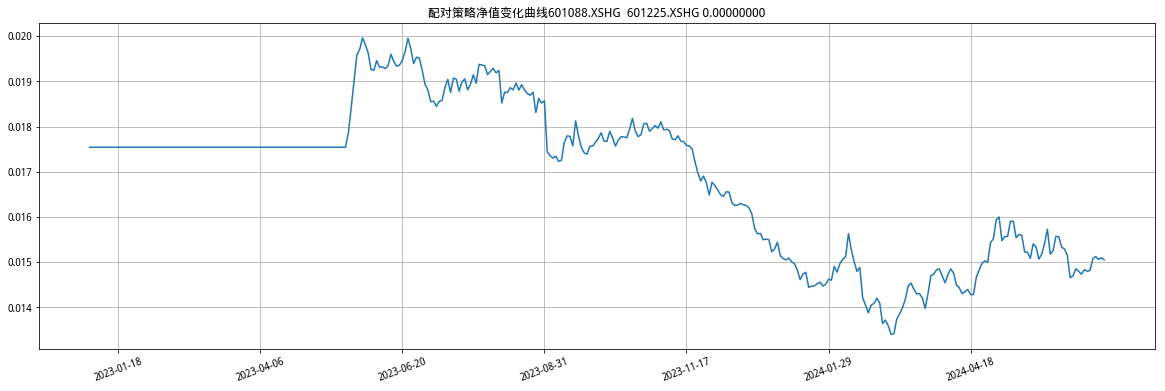

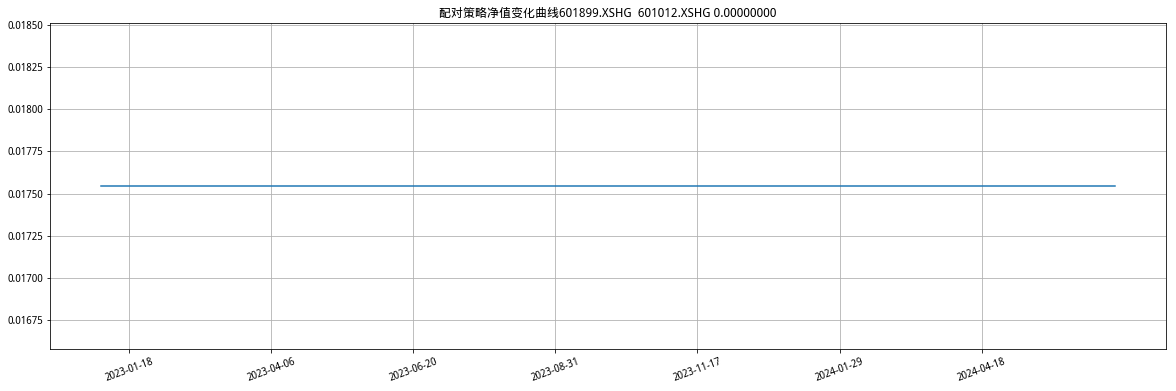

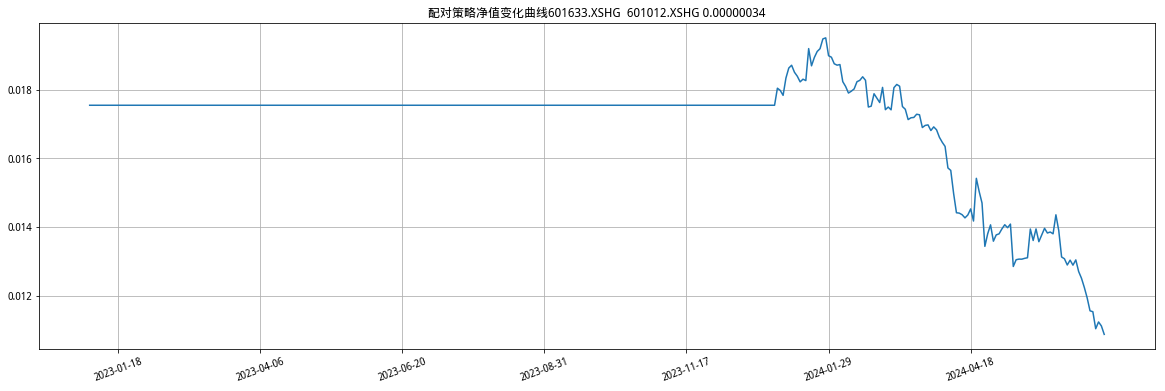

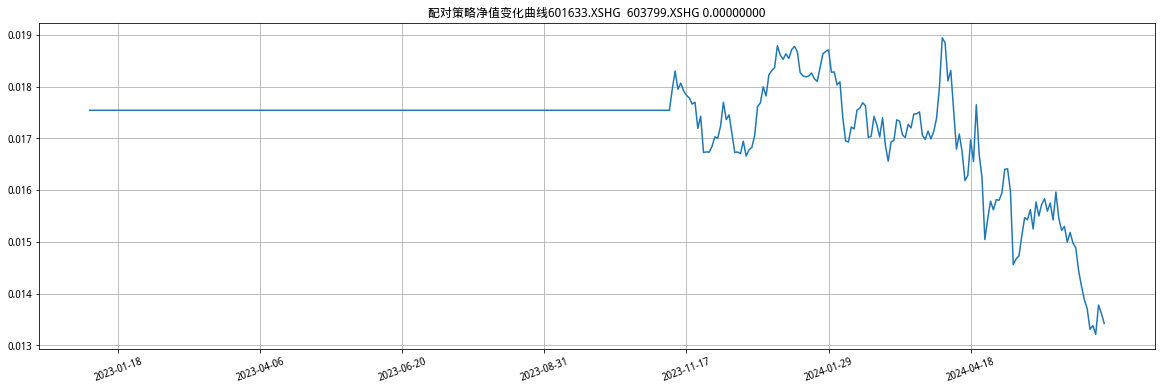

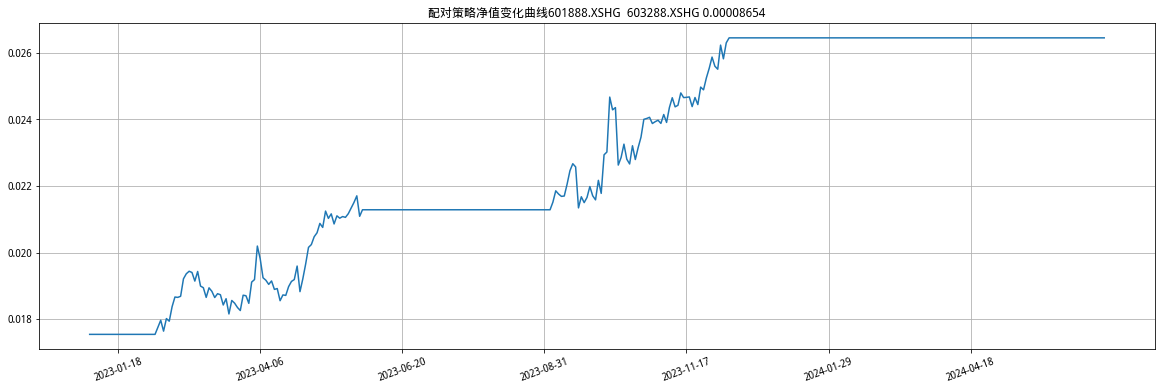

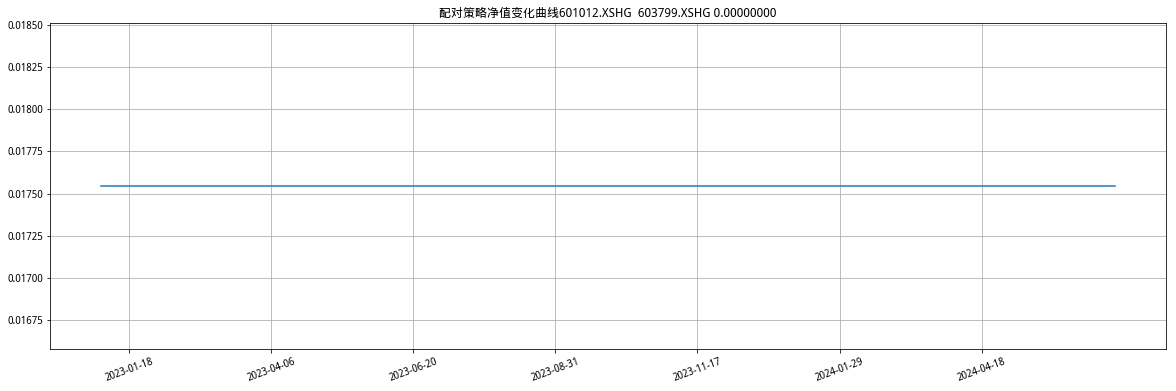

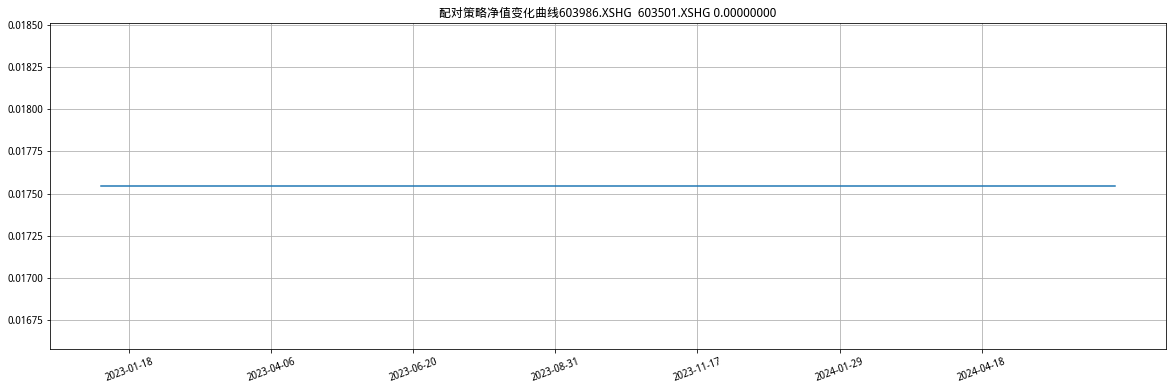

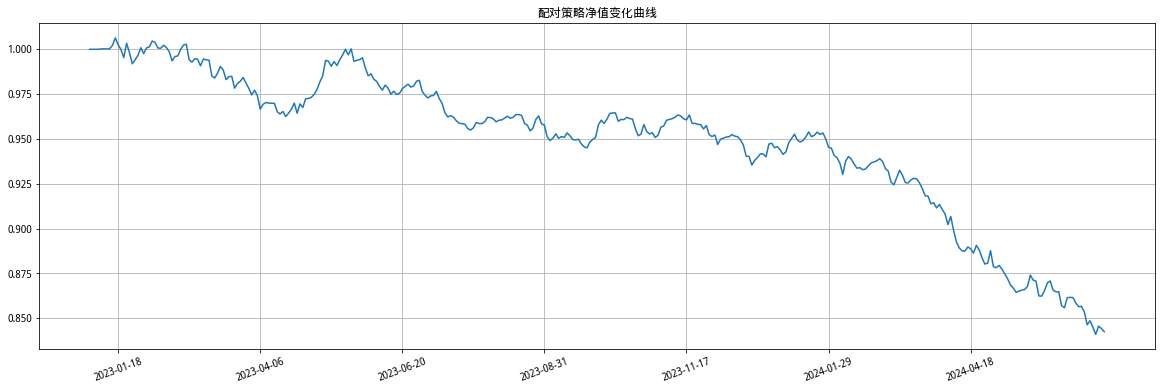

In [2]:
profit = np.zeros(len(get_price([selected[0][0]],start_date=test_start,end_date=test_end,fields='close')['close'])-1)

final_profits = []
p_values = [] #研究p值和股票收益率的关系

for pair in selected:#遍历每组选出的股票
    name1 = pair[0]
    name2 = pair[1]
    
    price_mean=get_price([name1,name2],start_date = start_date,end_date = end_date,fields='close')['close']
    model = sm.OLS(np.log(price_mean[name1]),np.log(price_mean[name2])).fit()#建立线性回归模型
    slope=model.params[0]#产品1 vs 产品2 价格比例
    st_mean=np.log(price_mean[name1])-slope*np.log(price_mean[name2])#从震荡开始时计算差价，作为平均值和线性回归的参考
    
    jb_statistic, p_value = jarque_bera(np.log(price_mean[name1])-slope*np.log(price_mean[name2])) #获取p值
    

    price_std=get_price([name1,name2],start_date = start_date,end_date = end_date, fields='close')['close']
    st_std=np.log(price_std[name1])-slope*np.log(price_std[name2])#计算过去两年的差价，作为标准差的参考

    price_test=get_price([name1,name2],start_date = test_start ,end_date = test_end, fields='close')['close']
    st=np.log(price_test[name1])-slope*np.log(price_test[name2])#获取新一年的数据
    st=(st-np.mean(st_mean))/np.std(st_std)#使用过去数据的均值和标准差对新数据进行标准化
    
    '''
    plt.figure(figsize=(20,6))
    plt.plot(st)
    plt.axhline(y=1.5, color='r', linestyle='--')
    plt.axhline(y=-1.5, color='r', linestyle='--')
    plt.axhline(y=0, color='g', linestyle='--')
    '''
    
    ratio = p_value/total_p #根据p值进行分配，p值越大的配对更有机会有高收益
    ave = 1/len(selected) #可选择根据p值进行交易额分配，也可以平均分配
    
    u=0
    quantity1=[]
    quantity2=[]
    num1=0
    num2=0
    for i in arange(1,len(st)):
        if u==0 and st[i-1]>1.5 and st[i] < 1.5:#产品1 价格高于 产品2
            num1=-1         #做空
            num2=-num1*slope #做多，期待差价回归平均值
            u=i
        elif u!=0 and st[i]<0.5 and st[i]>-0.5 : ##此时价差变为0，平仓
            num1=0
            num2=0
            u=0
        elif u==0 and st[i-1]<-1.5 and st[i] > -1.5:
            num1=1
            num2=-num1*slope
            u=i
        quantity1.append(num1)
        quantity2.append(num2)

    rate1=price_test[name1].diff(1)[1:]/list(price_test[name1][:-1])#价格涨跌幅
    rate2=price_test[name2].diff(1)[1:]/list(price_test[name2][:-1])
    
    sumrate=rate1*quantity1+rate2*quantity2#求每一组股票经过策略交易过后，每天的收益
    tempt=ave #ave or ratio
    cumrate = [] #各组股票的涨跌幅
    for i in arange(len(sumrate)):
        tempt=tempt*(1+sumrate[i])
        cumrate.append(tempt)
    final_profits.append(cumrate[-1]/cumrate[0])
    p_values.append(p_value)
    plt.figure(figsize=(20,6))
    plt.plot(cumrate)
    plt.title('配对策略净值变化曲线' + name1 +'  '+ name2 + ' '+ format(p_value, '.8f'))
    plt.grid(True)
    plt.xticks(np.arange(10,len(rate1.index),50),[str(rate1.index[i])[:10] for i in np.arange(10,len(rate1.index),50)],rotation=20)
    profit = profit + cumrate  #添加至总涨跌幅



# 绘制表格，展示每天的收益率

profit /= profit[0]
plt.figure(figsize=(20,6))
plt.plot(profit)
plt.xticks(np.arange(10,len(rate1.index),50),[str(rate1.index[i])[:10] for i in np.arange(10,len(rate1.index),50)],rotation=20)

plt.title('配对策略净值变化曲线')
plt.grid(True)
                  
#plt.figure(figsize=(20,6))
#plt.plot(p_values,final_profits,'o', linestyle='none')
#plt.title('各对股票 P值 vs 收益率散点图')
#plt.xlabel('P值')
#plt.ylabel('收益率')

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:168: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"
/opt/conda/lib/python3.6/site-packages/jqdat

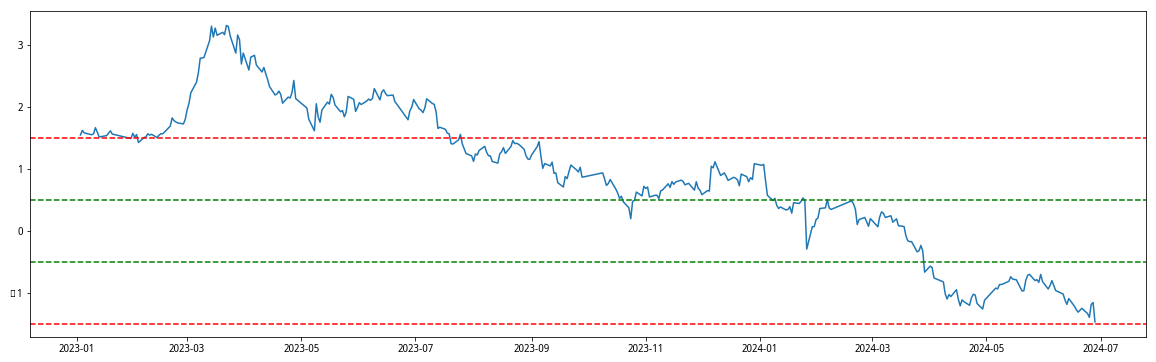

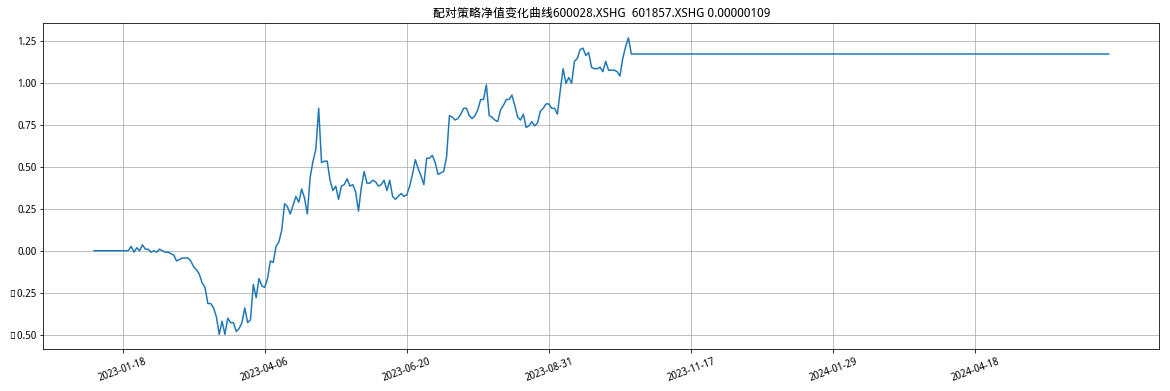

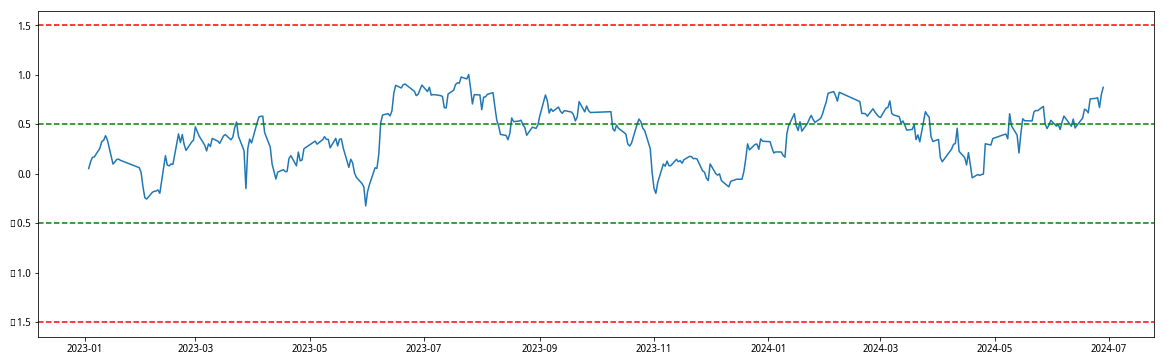

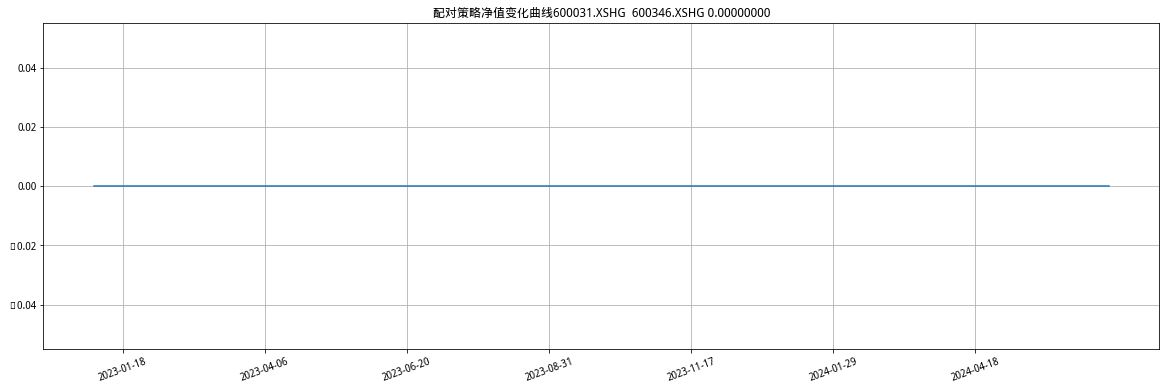

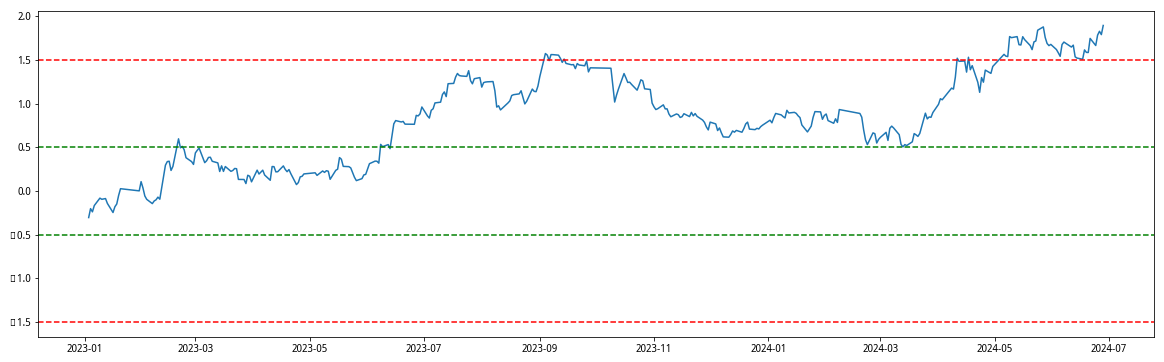

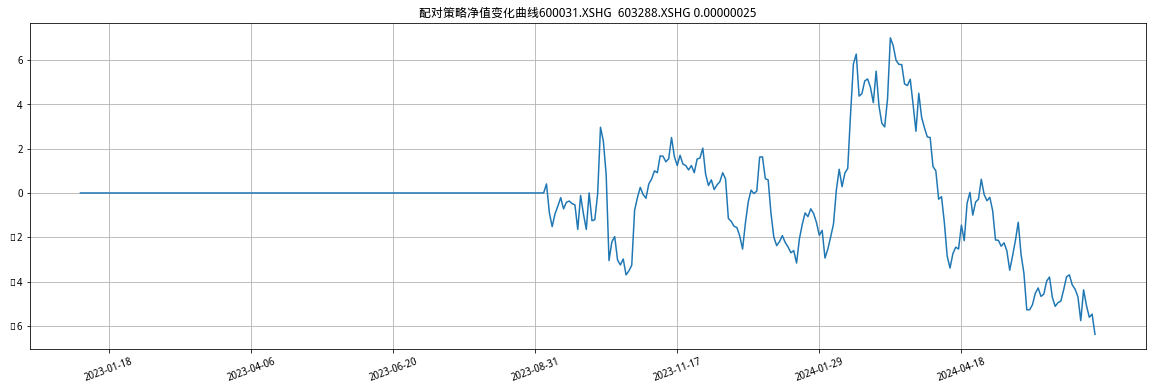

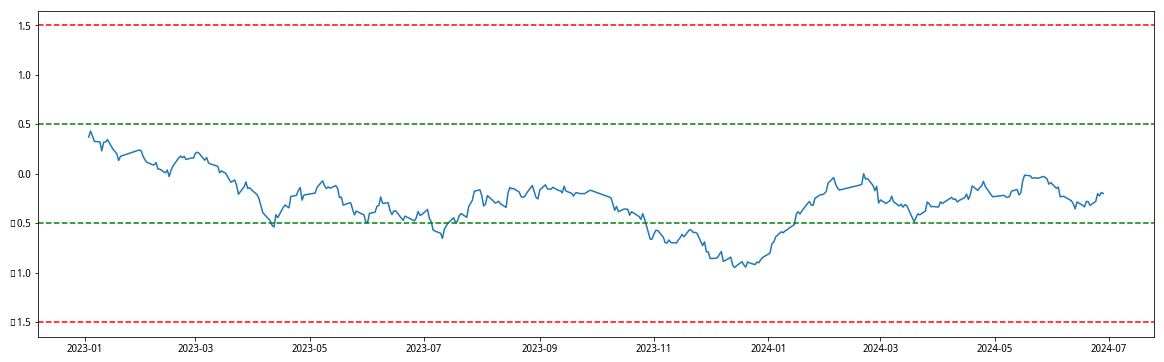

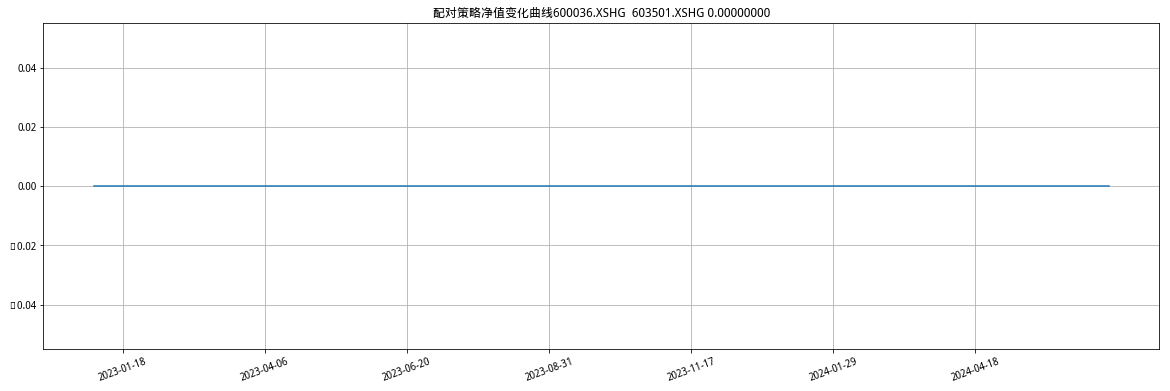

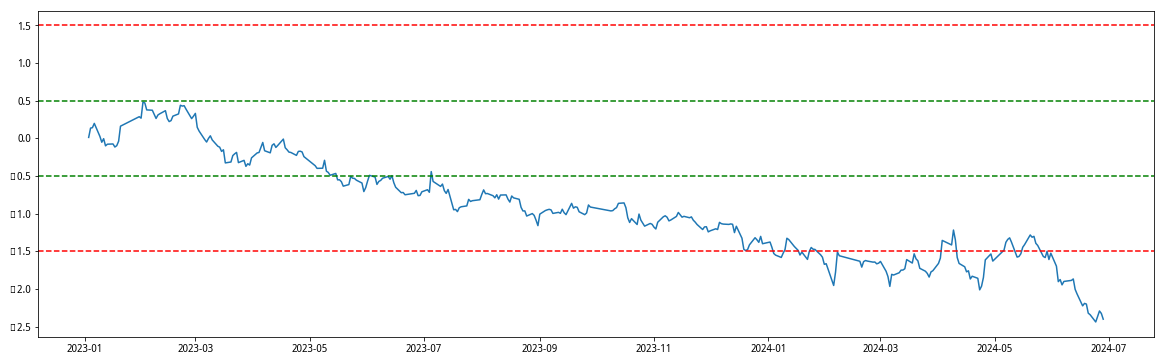

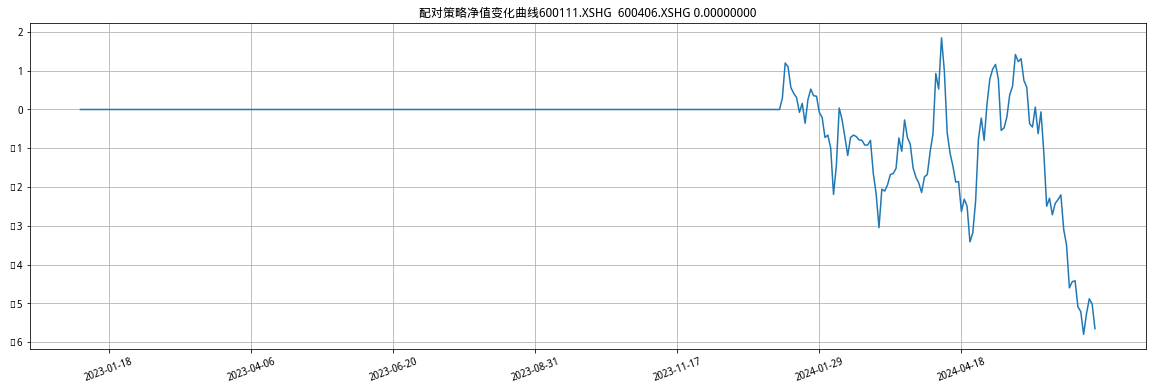

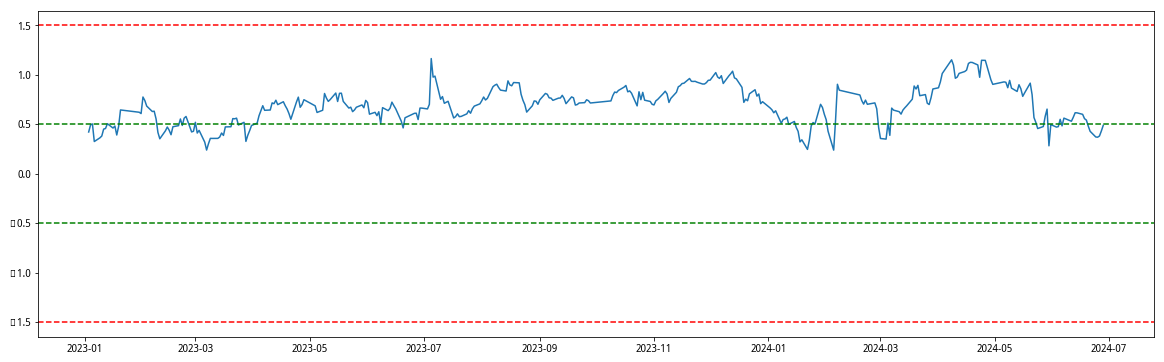

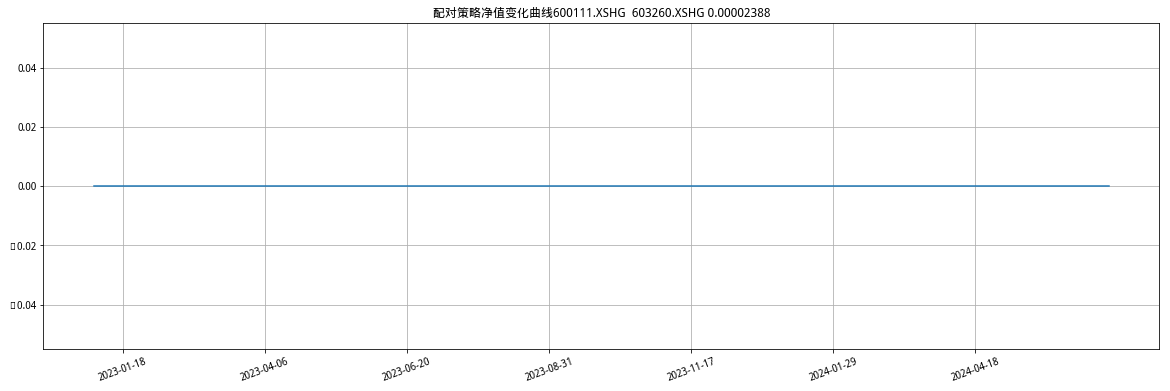

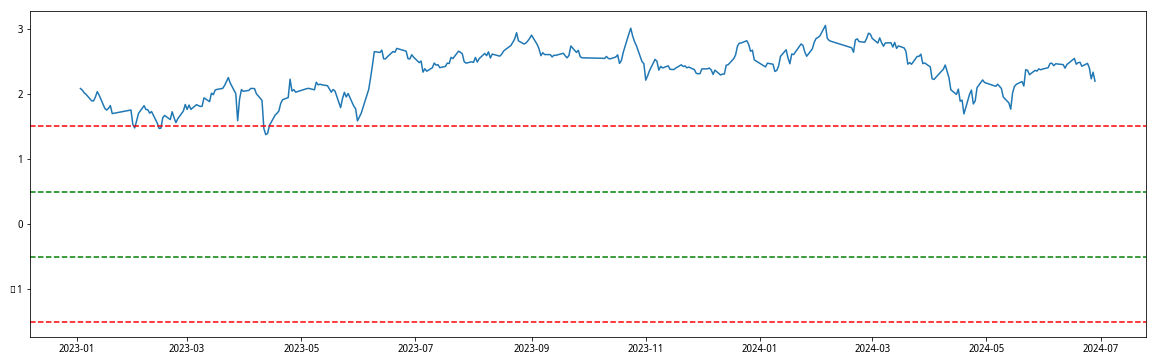

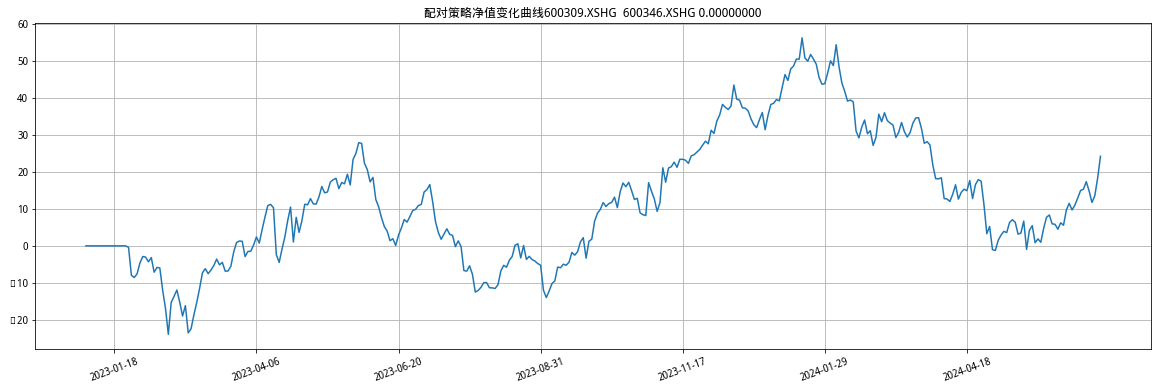

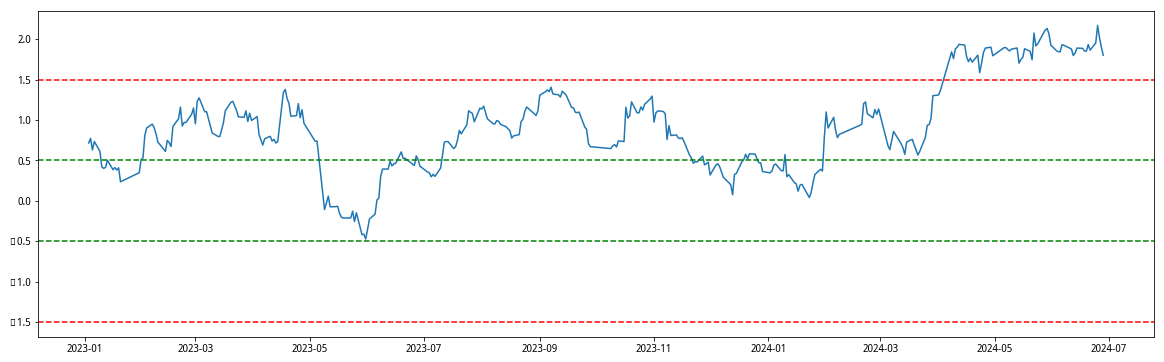

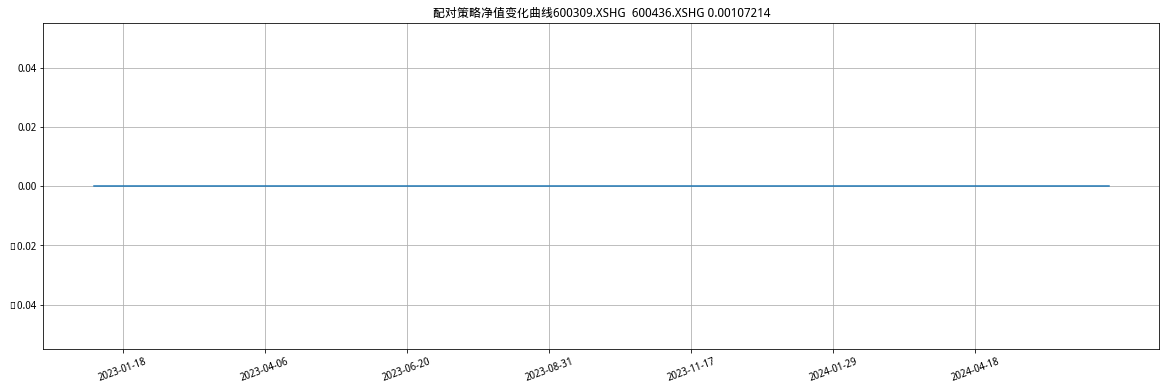

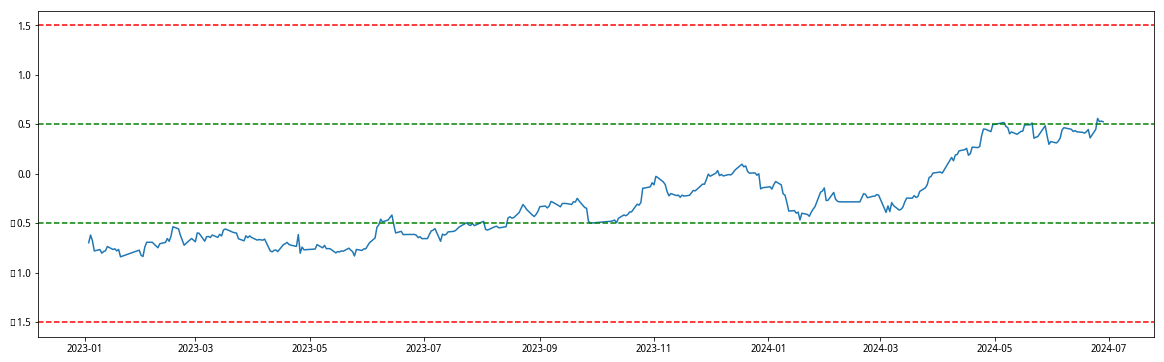

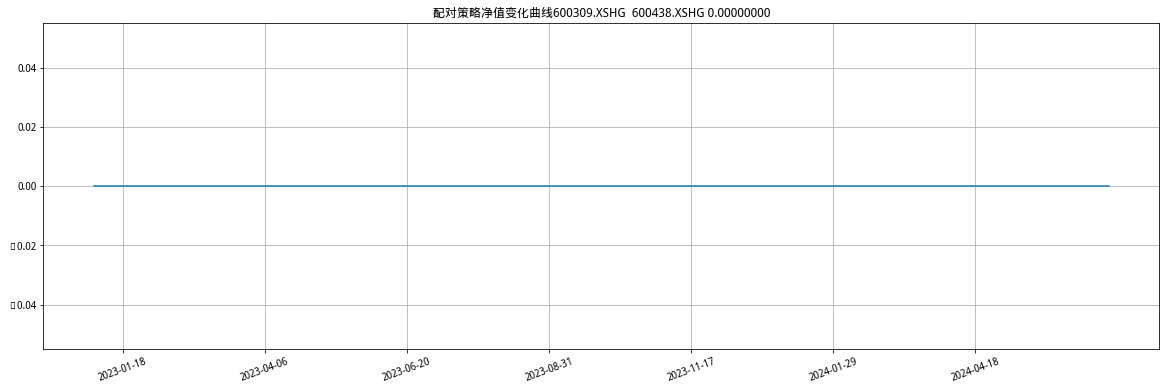

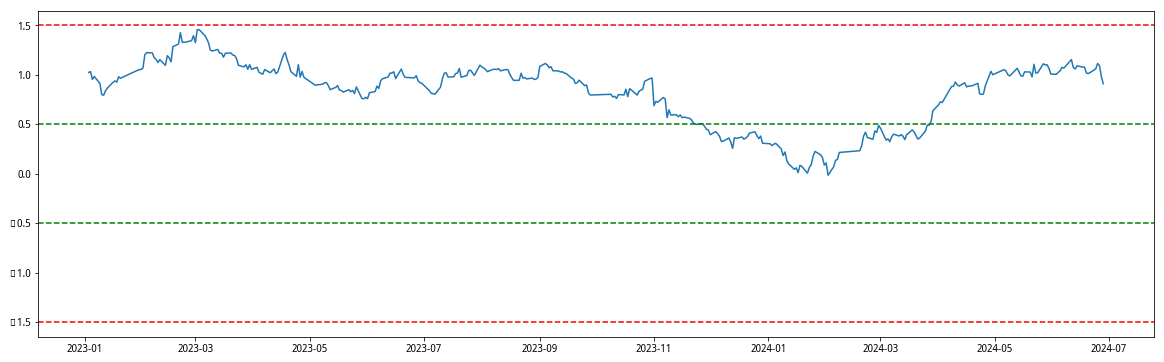

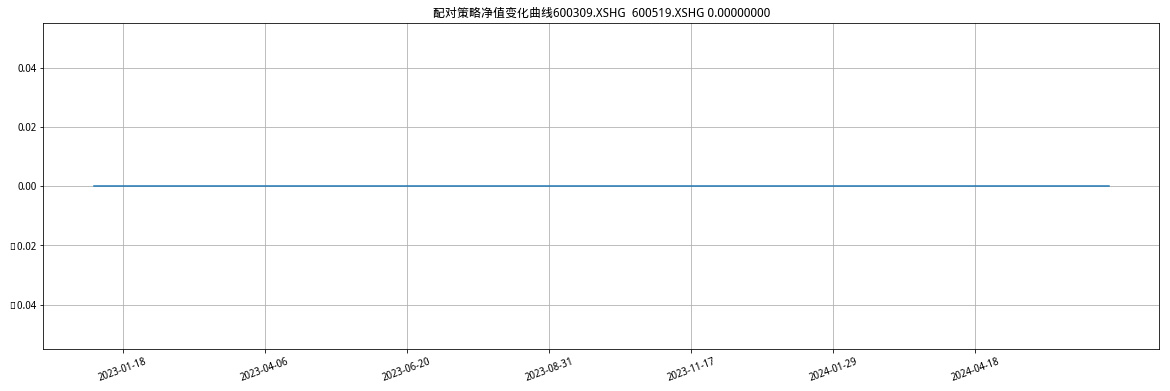

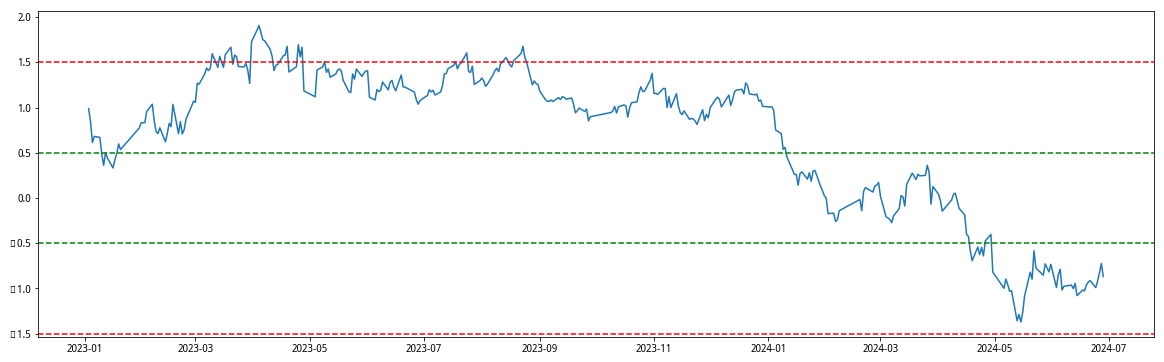

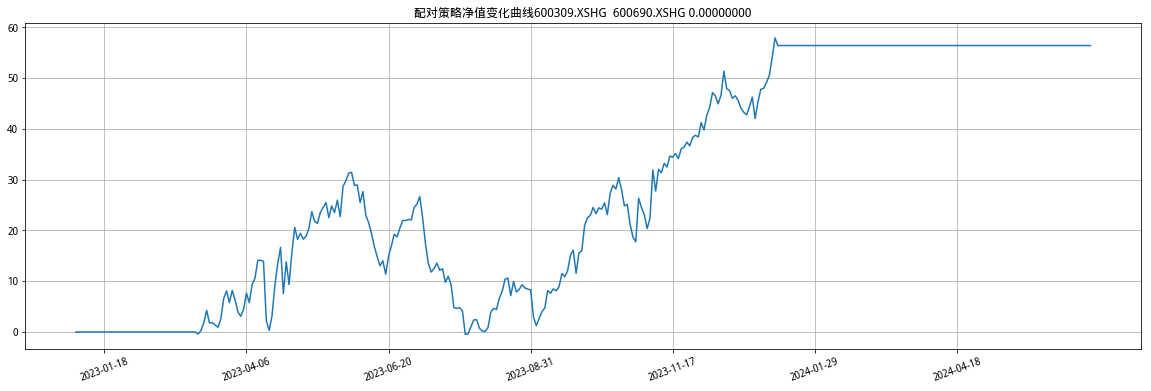

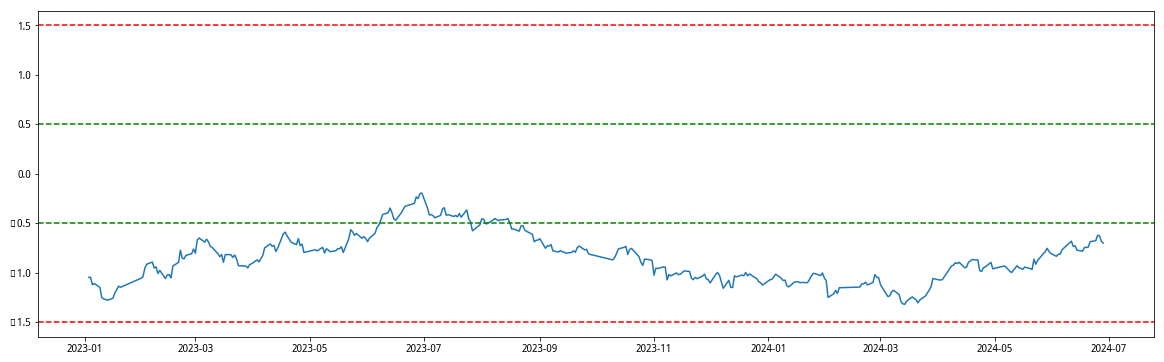

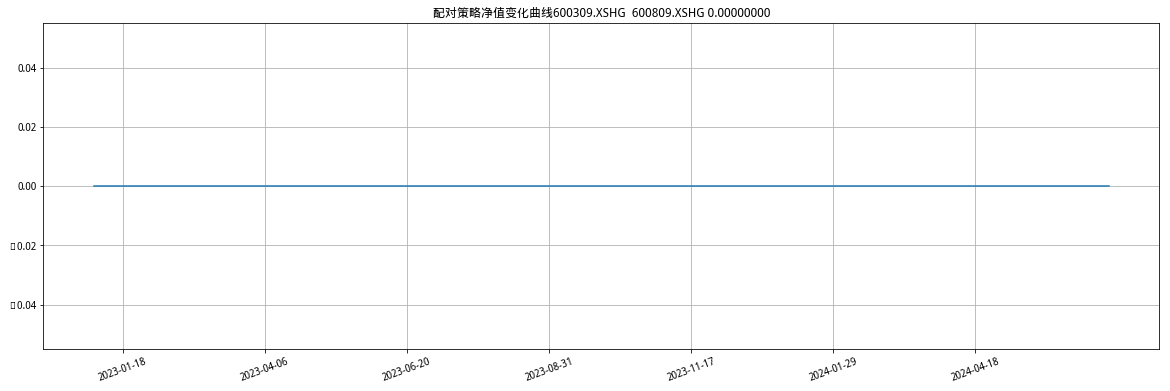

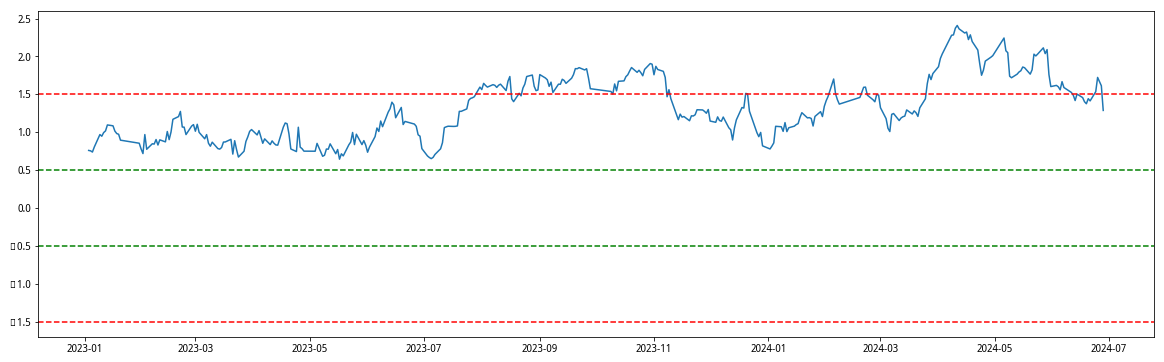

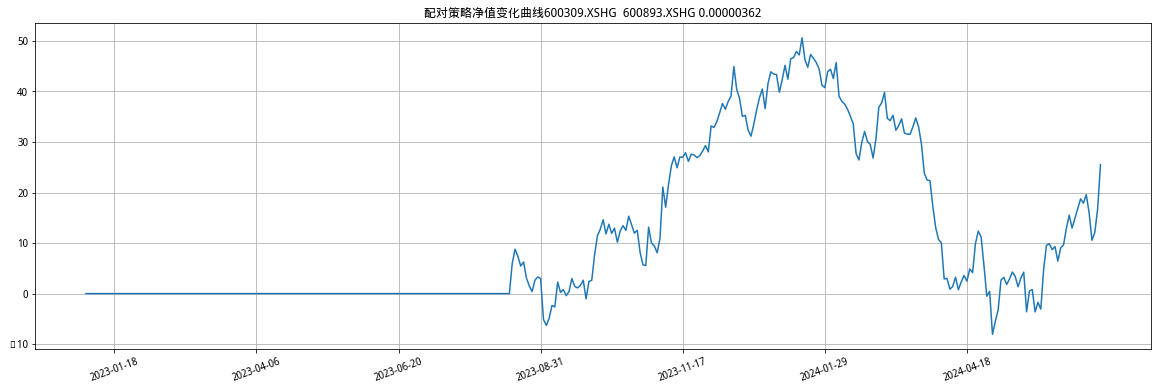

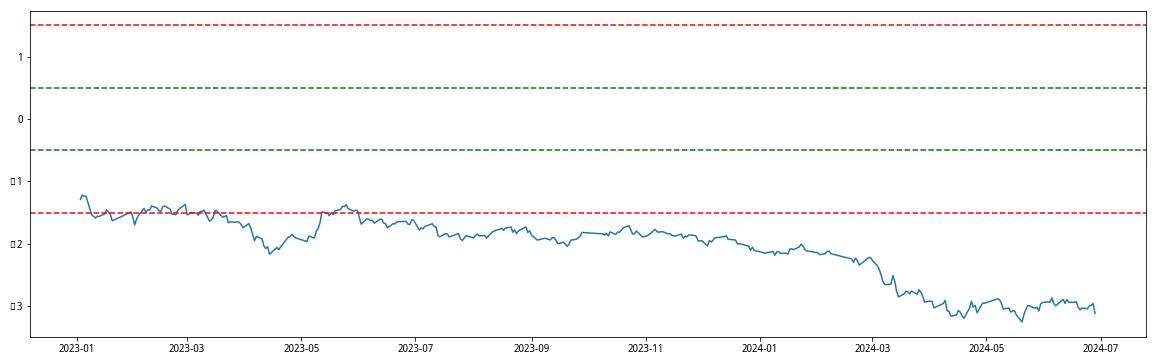

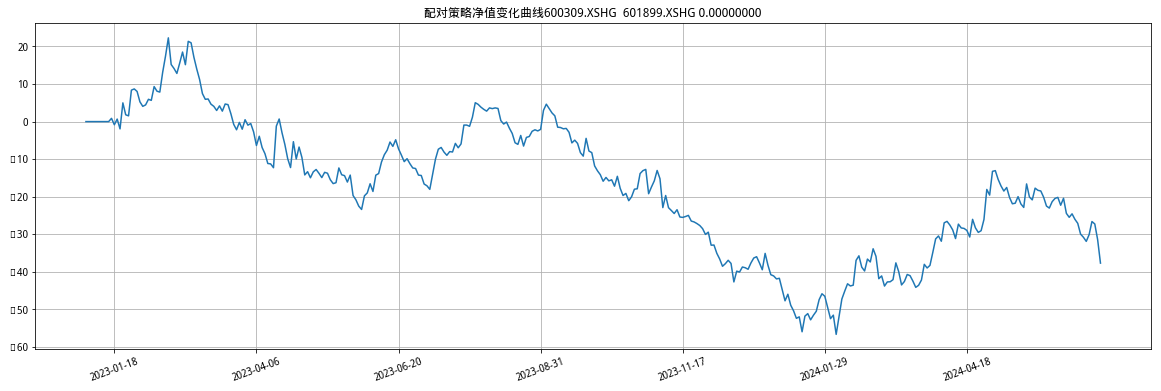

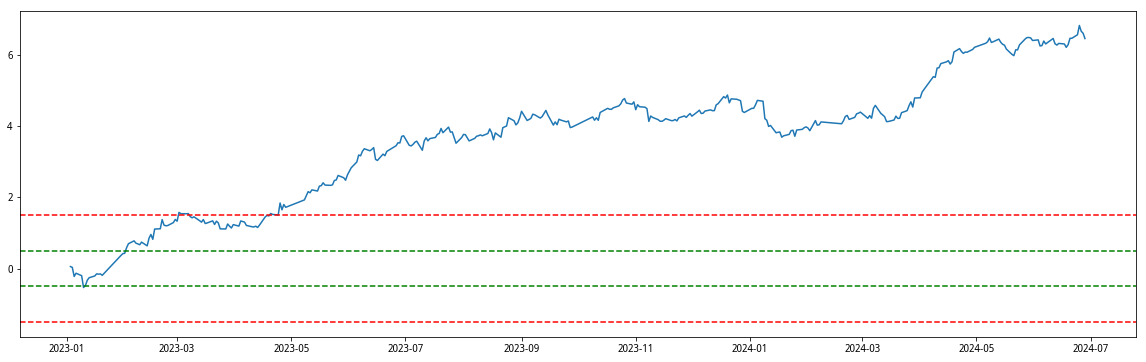

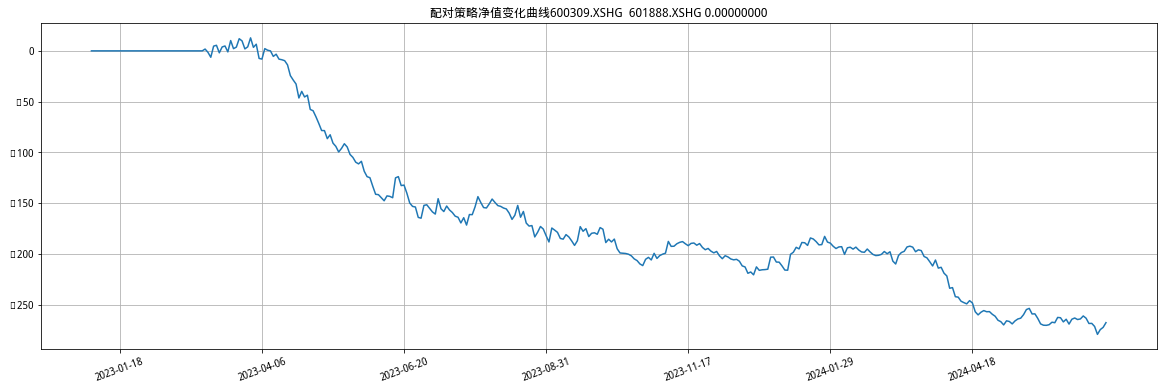

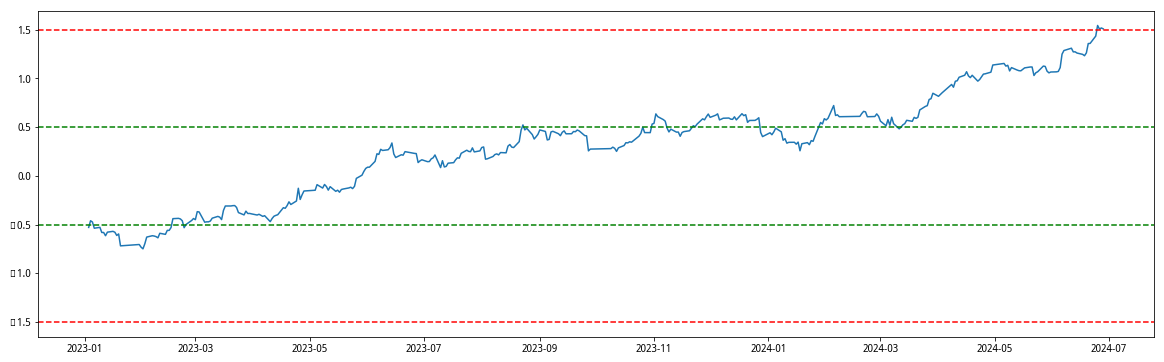

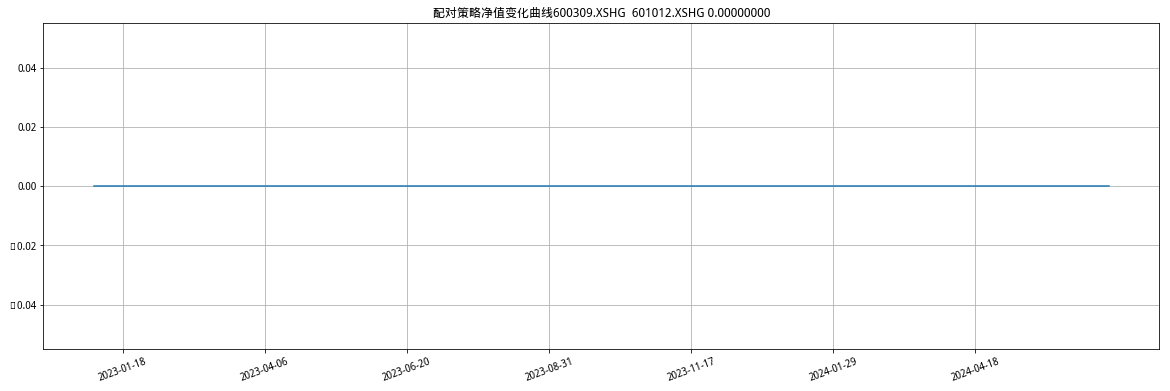

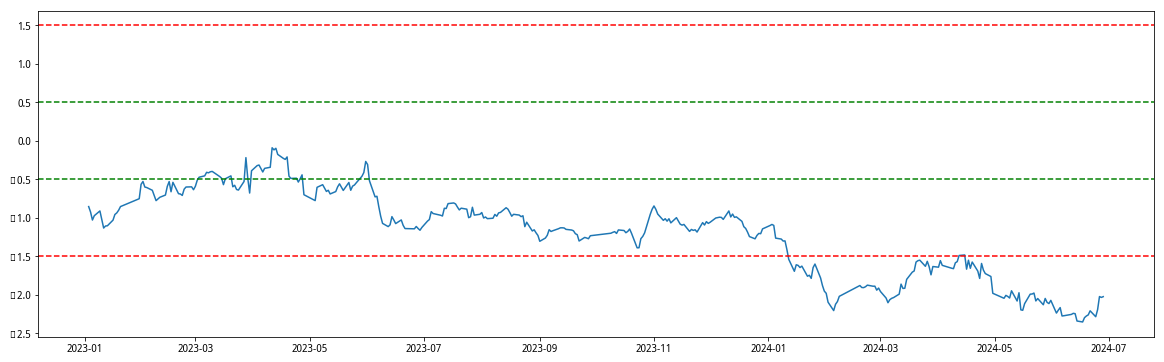

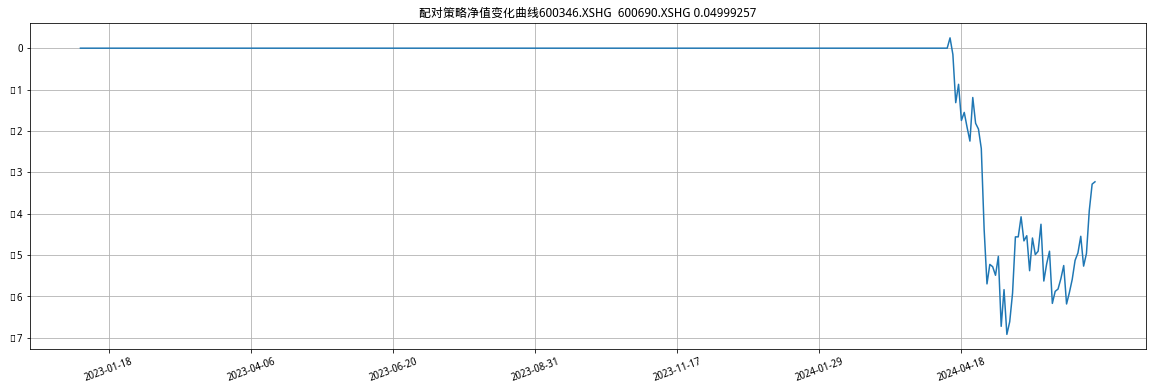

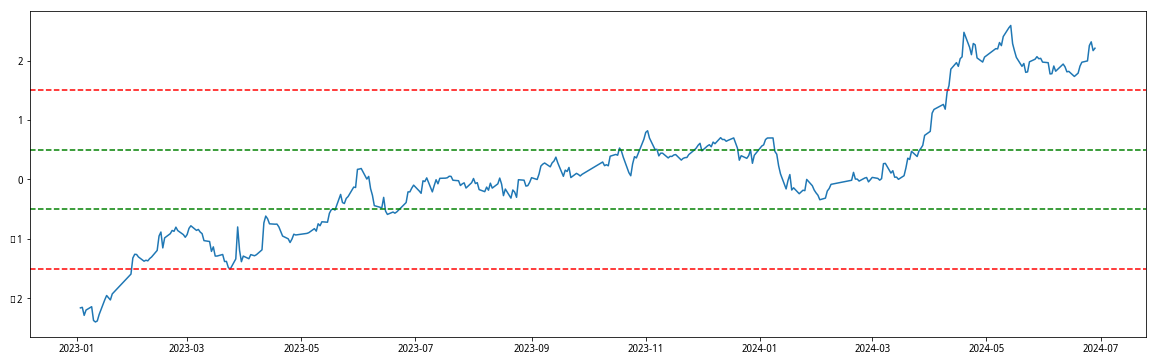

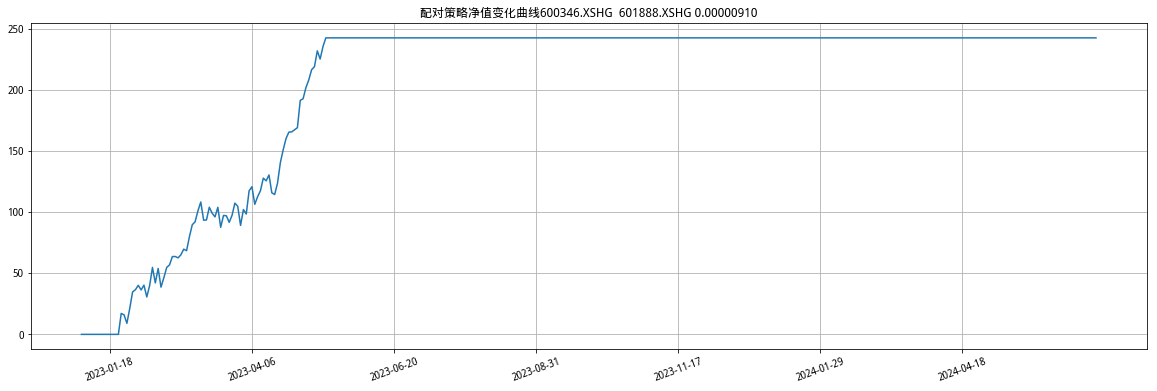

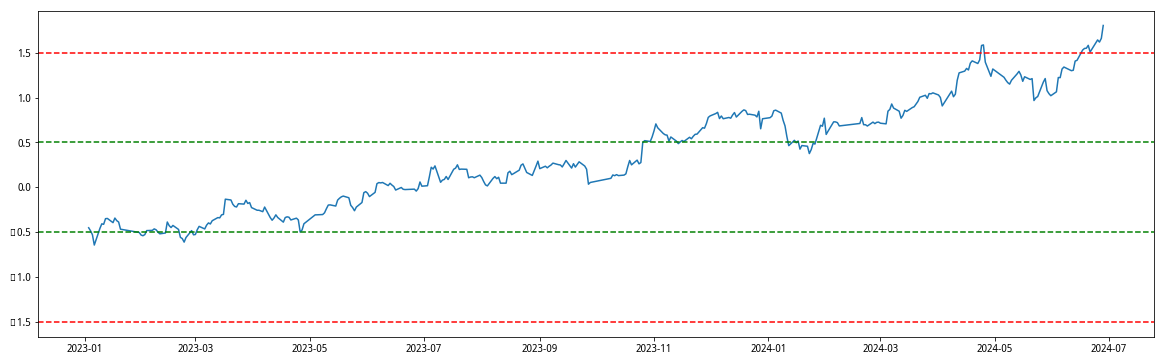

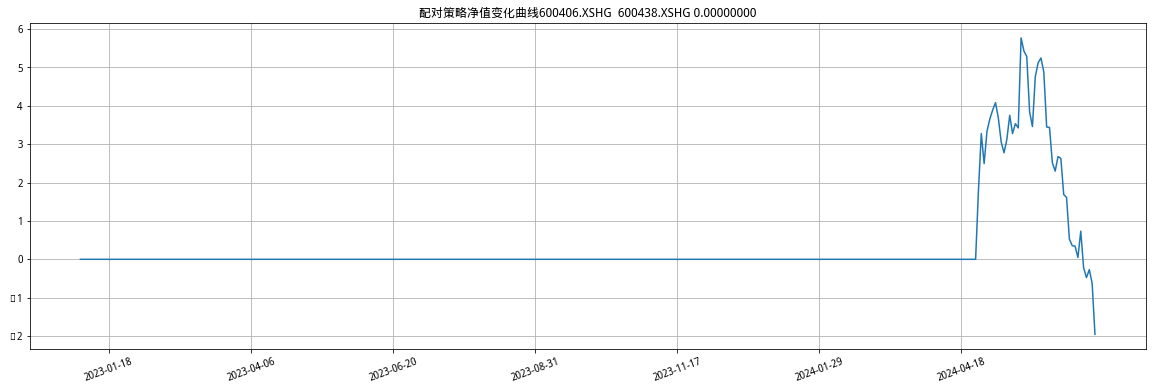

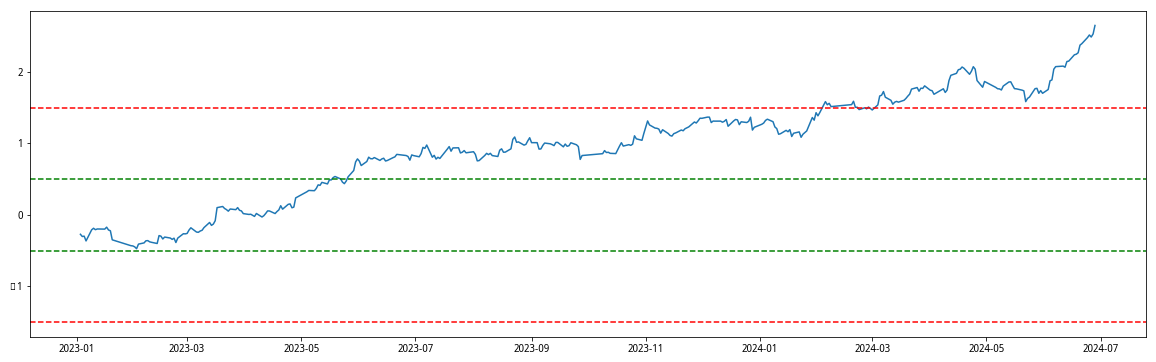

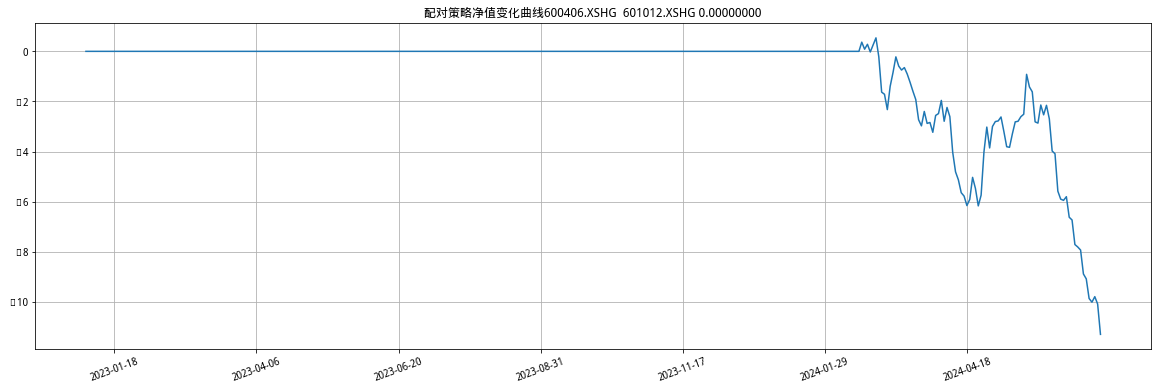

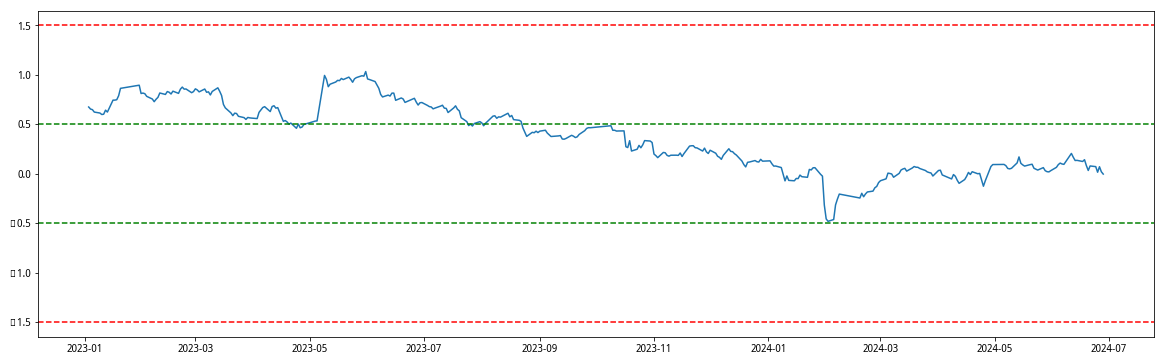

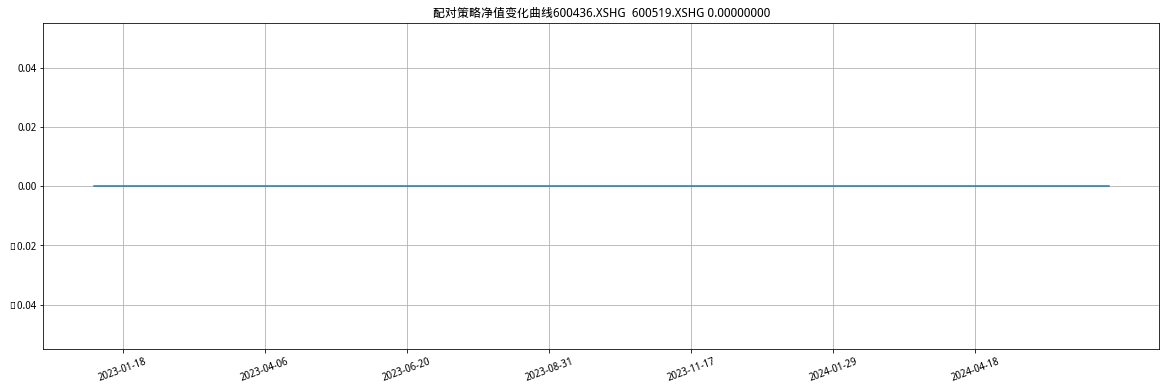

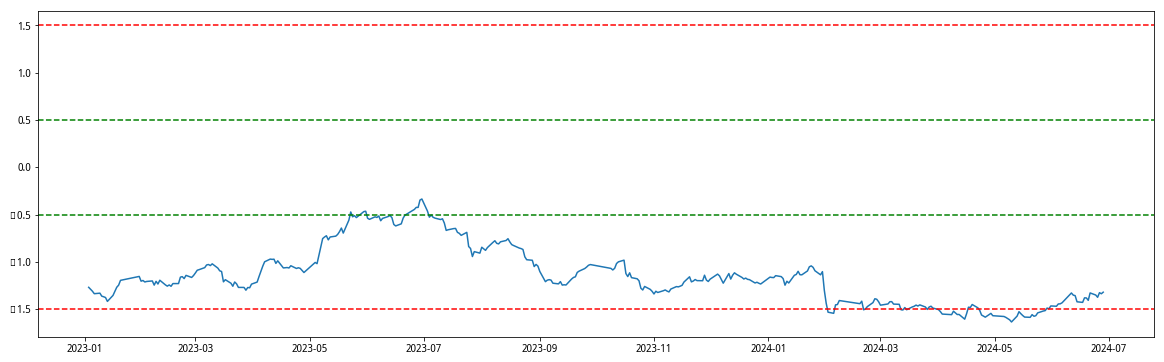

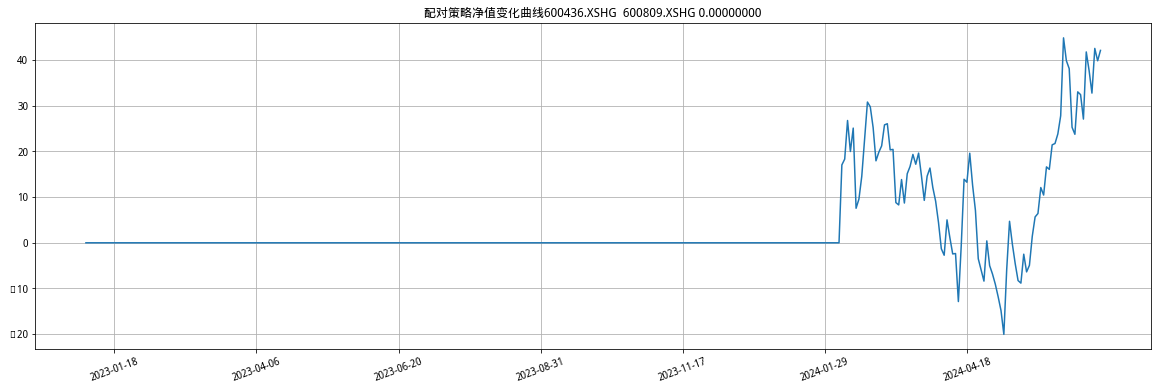

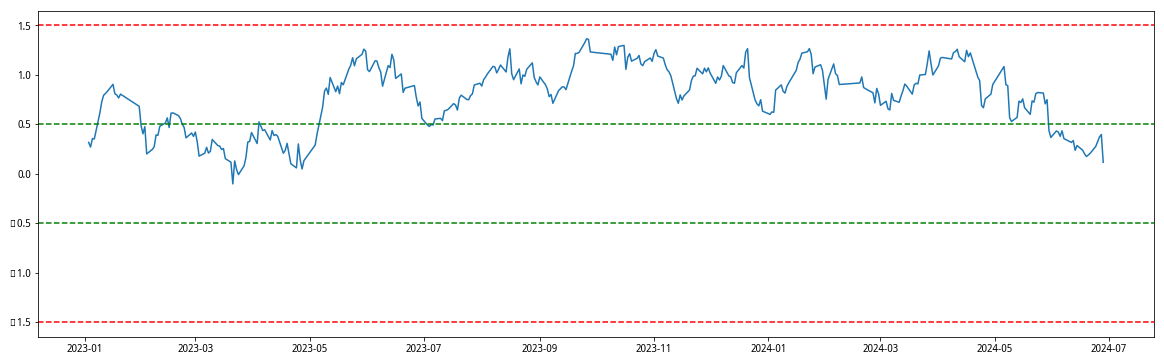

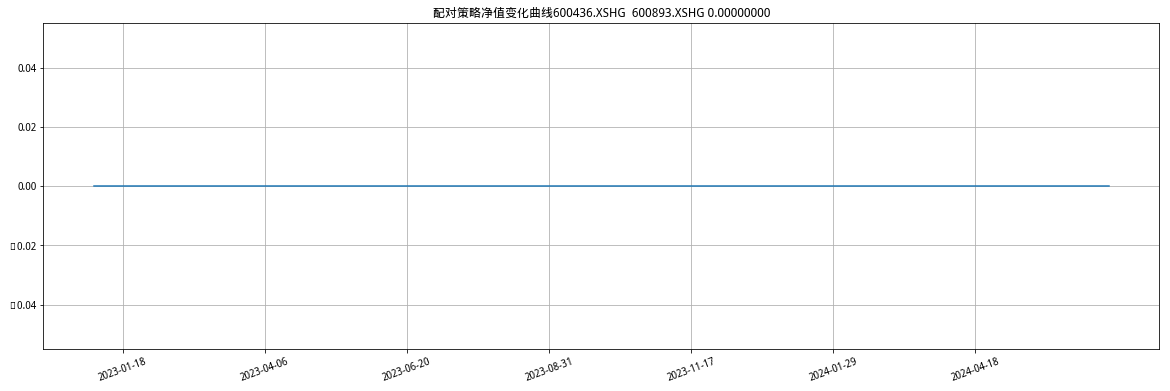

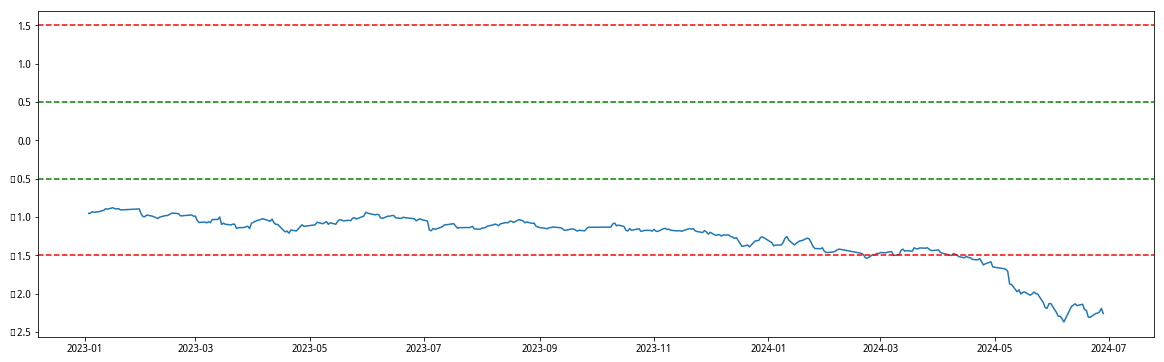

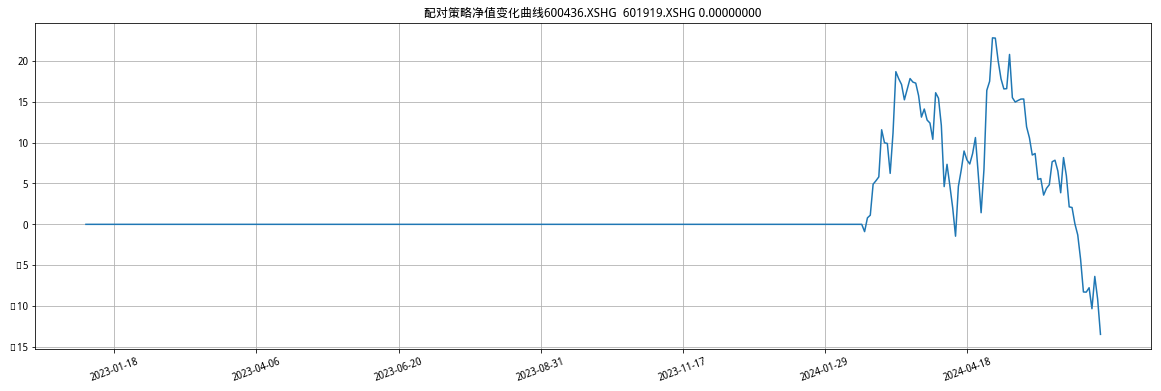

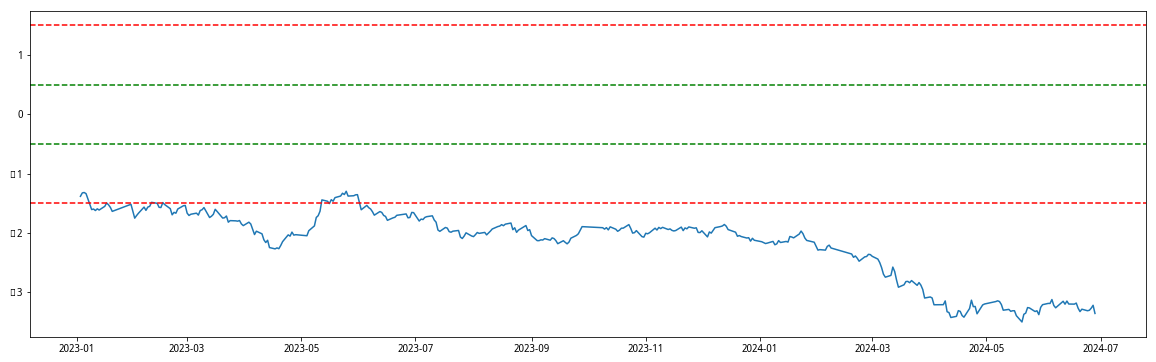

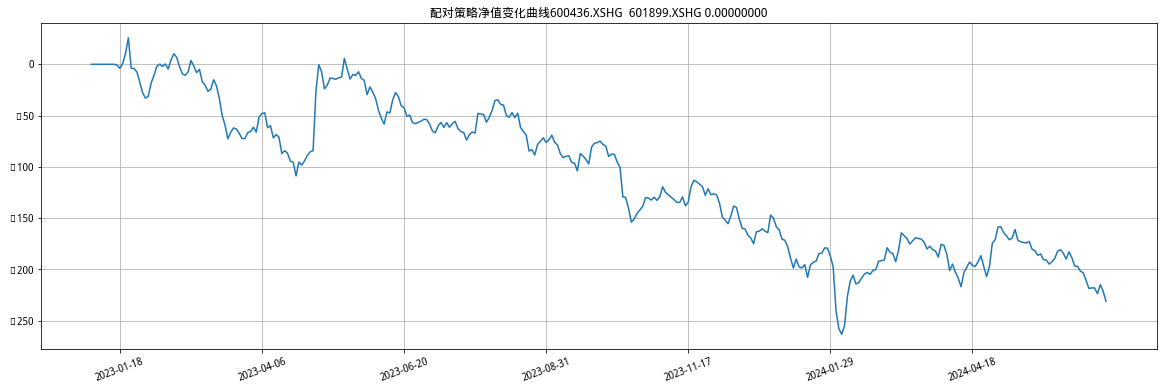

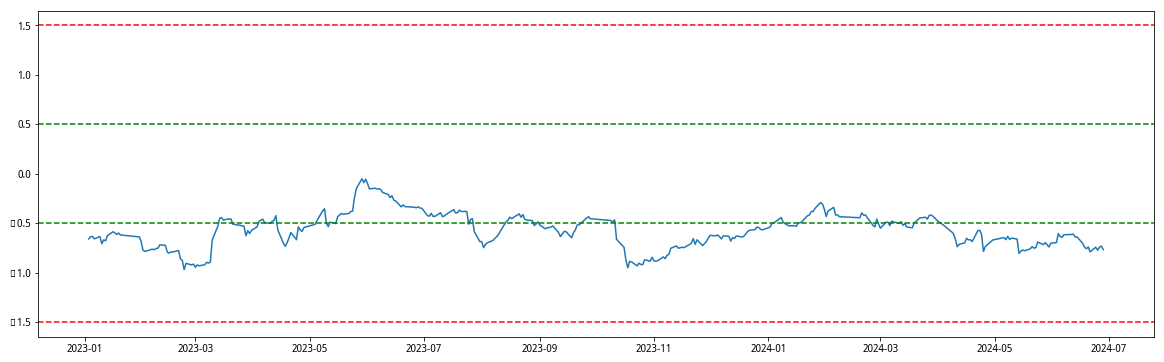

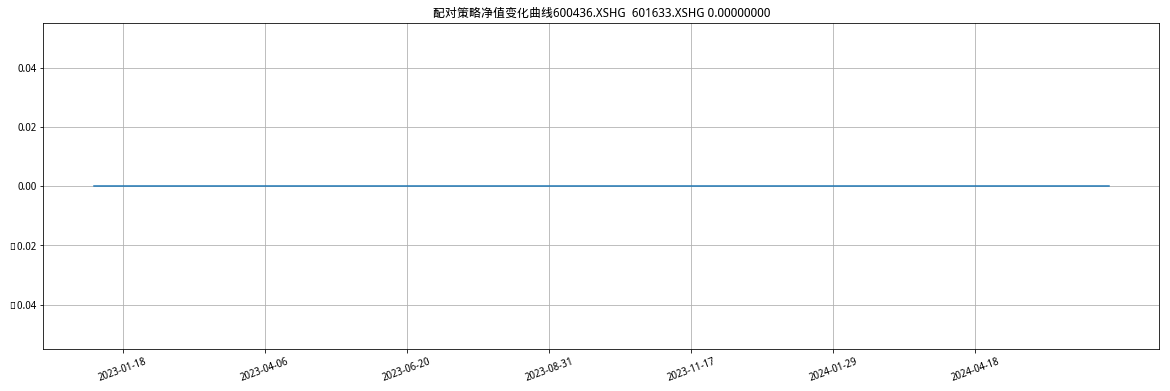

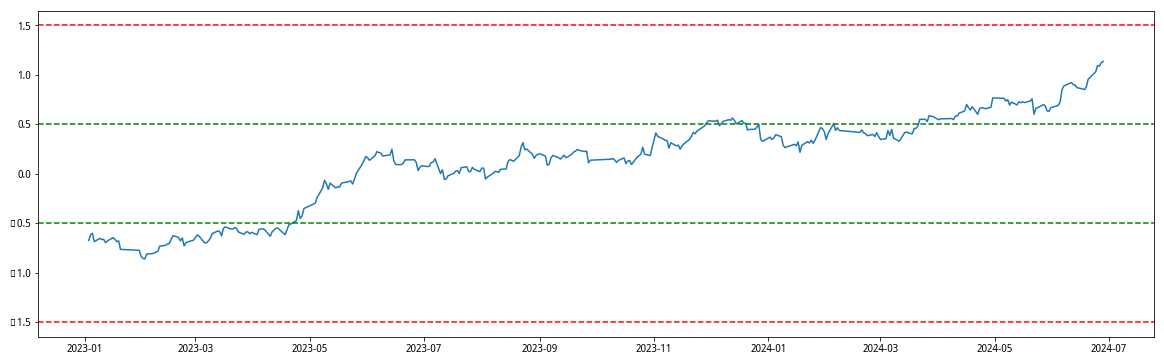

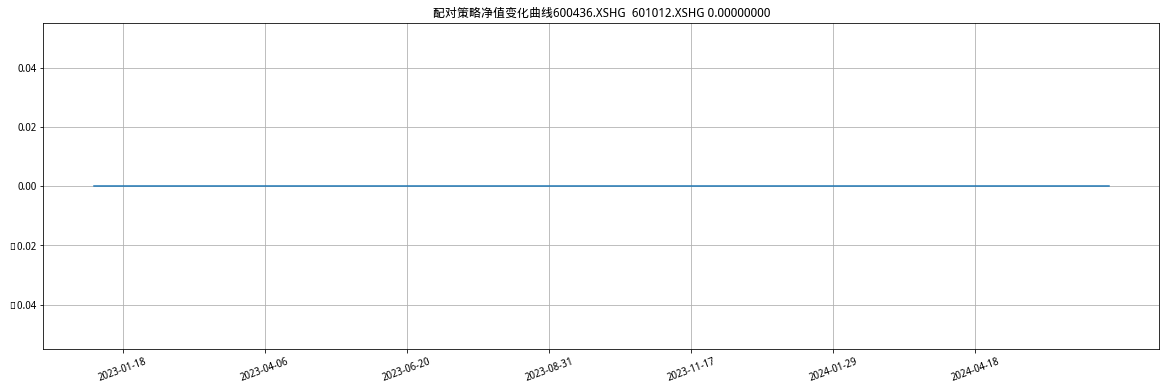

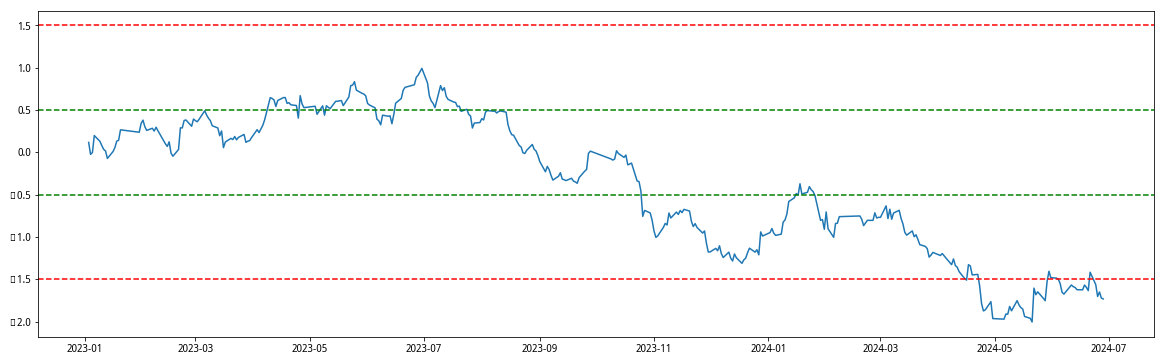

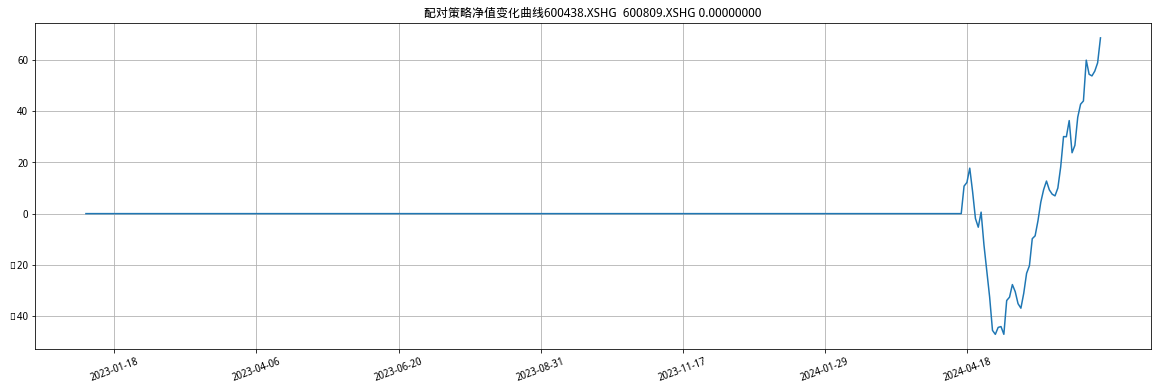

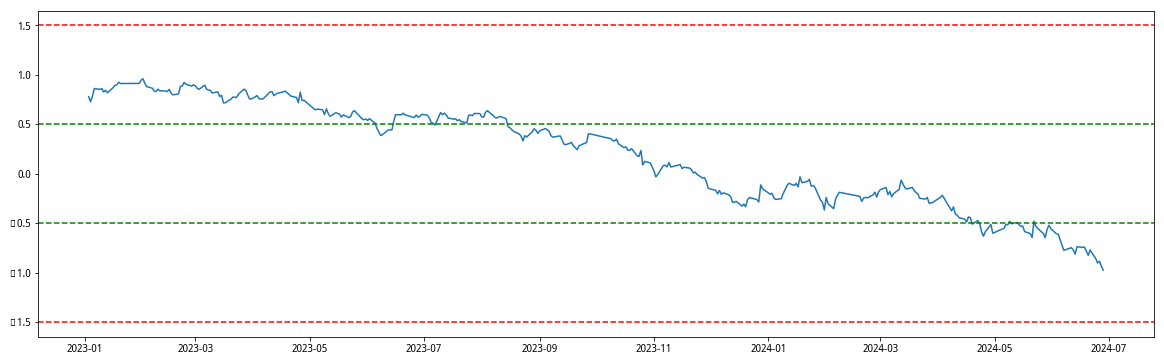

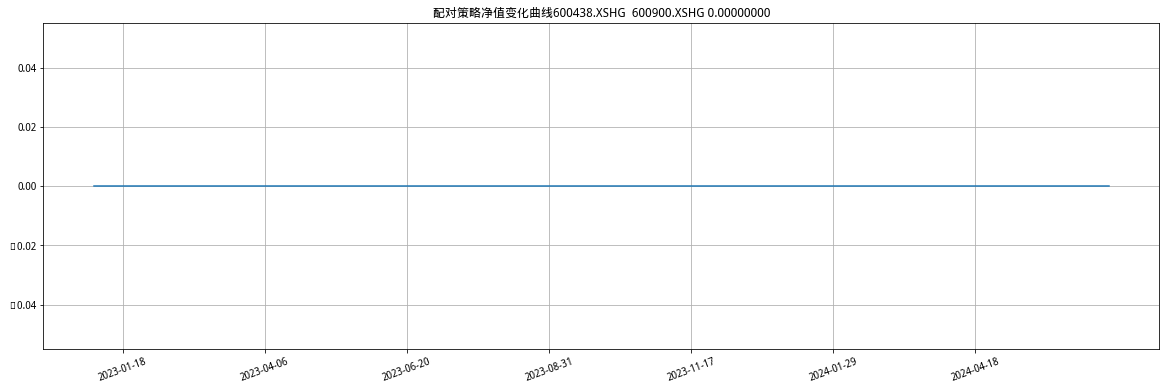

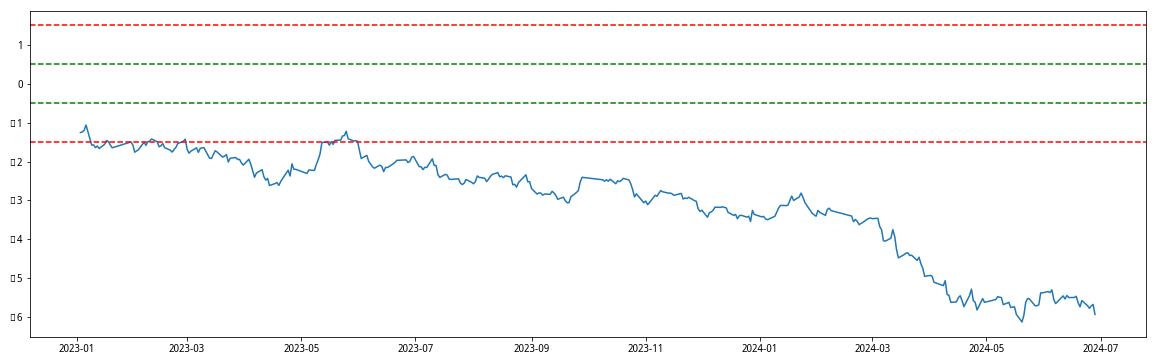

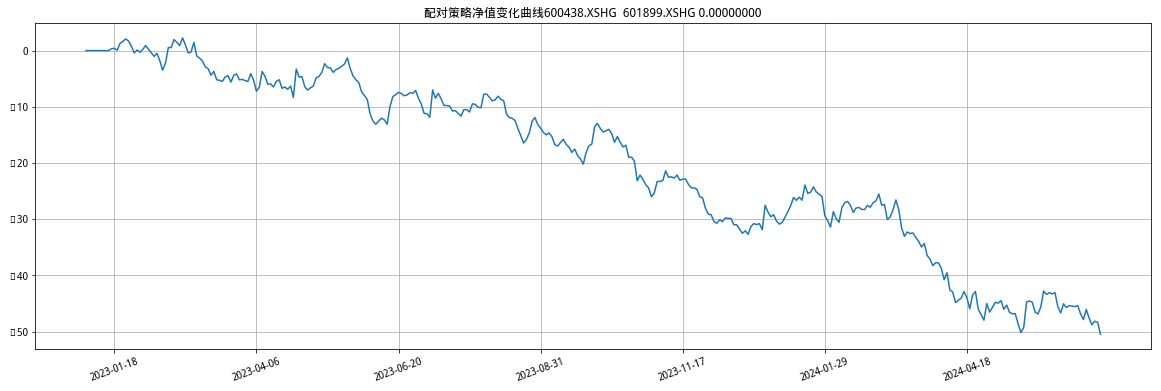

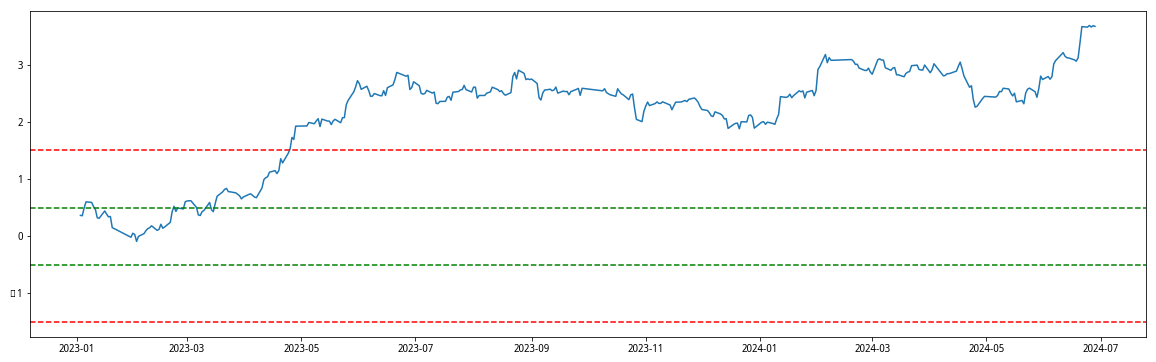

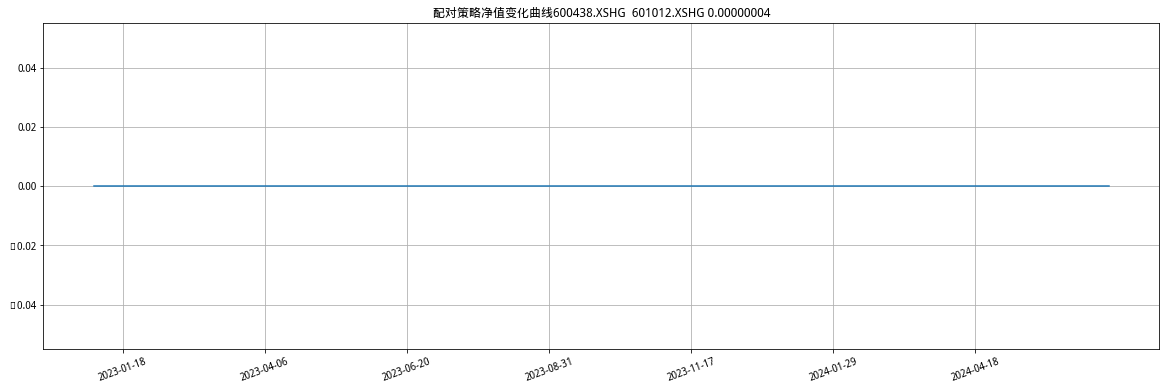

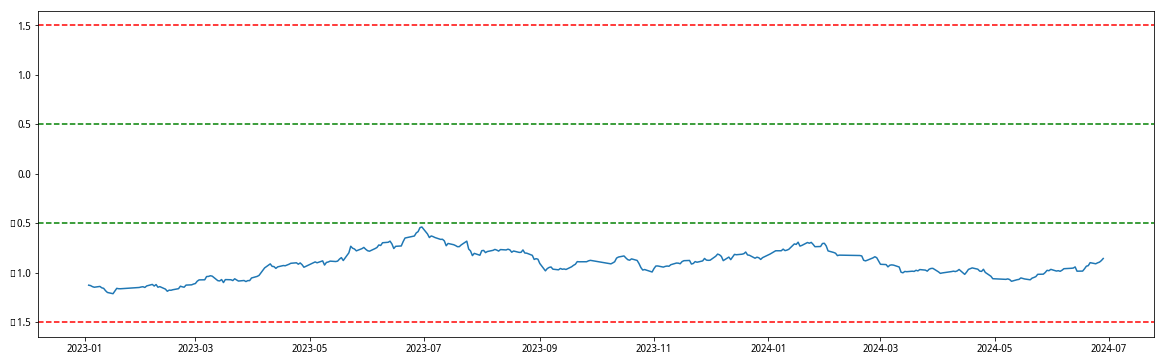

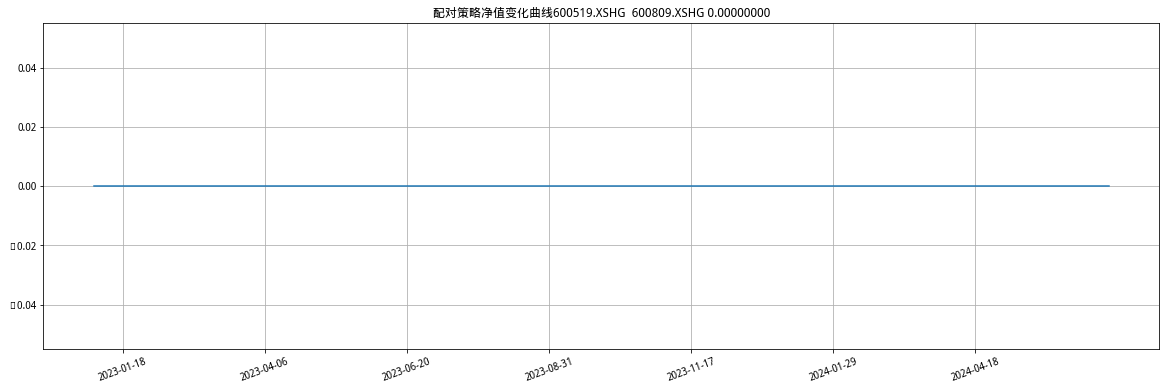

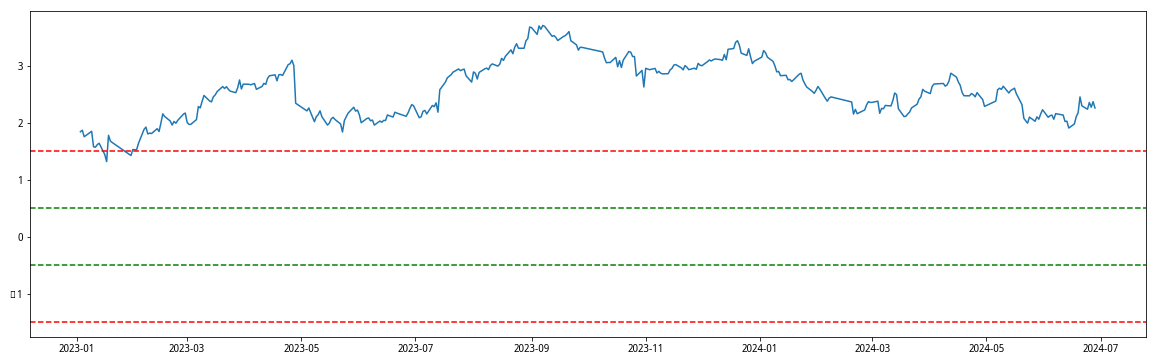

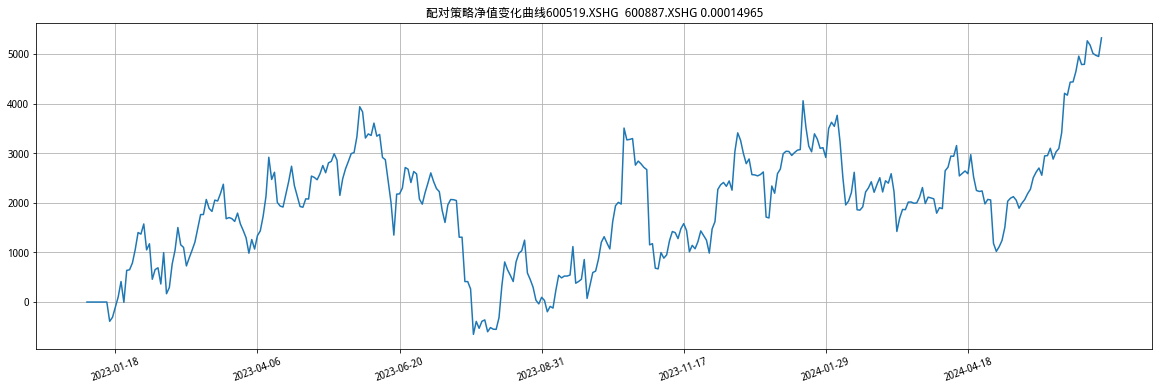

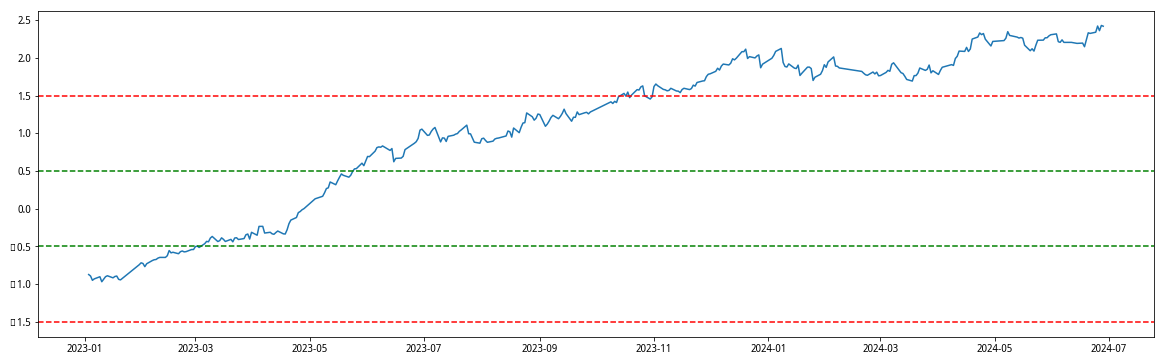

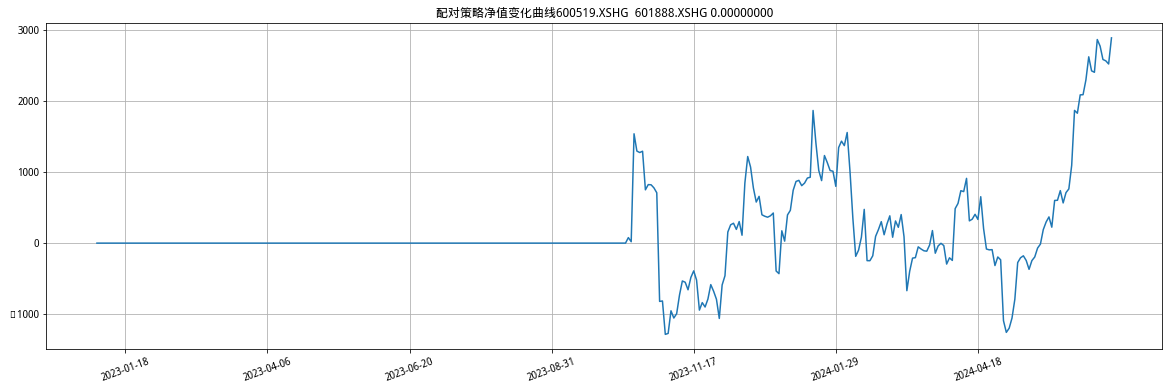

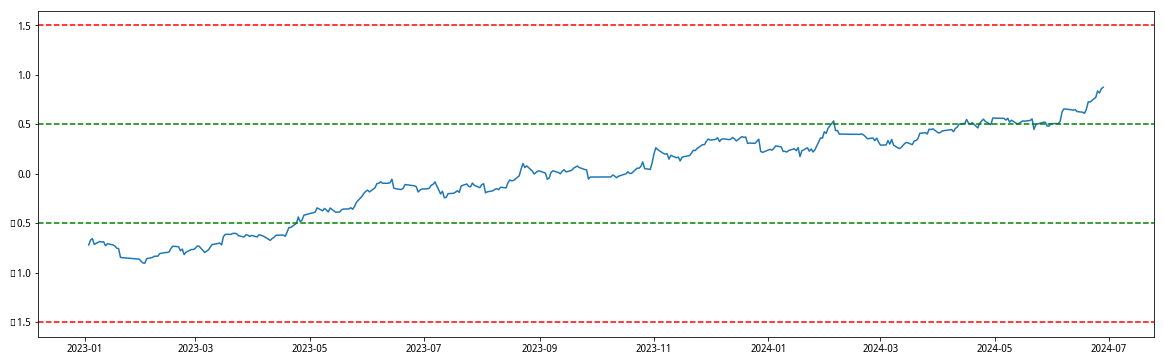

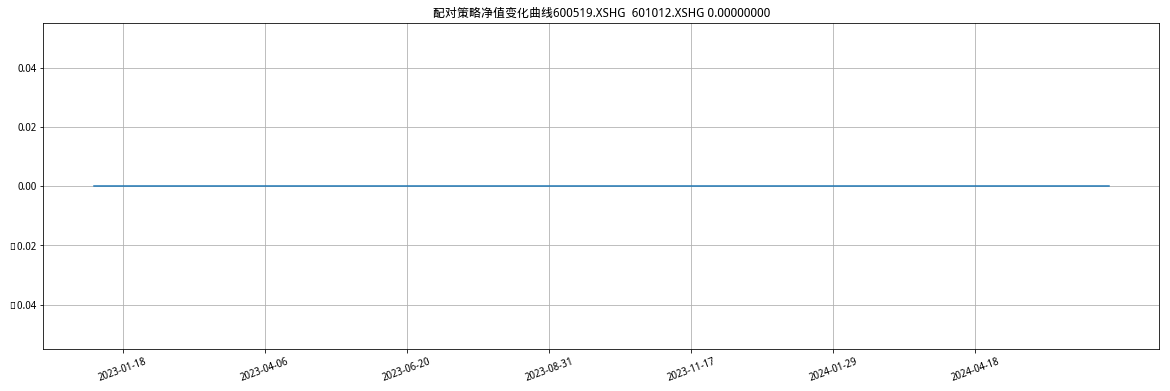

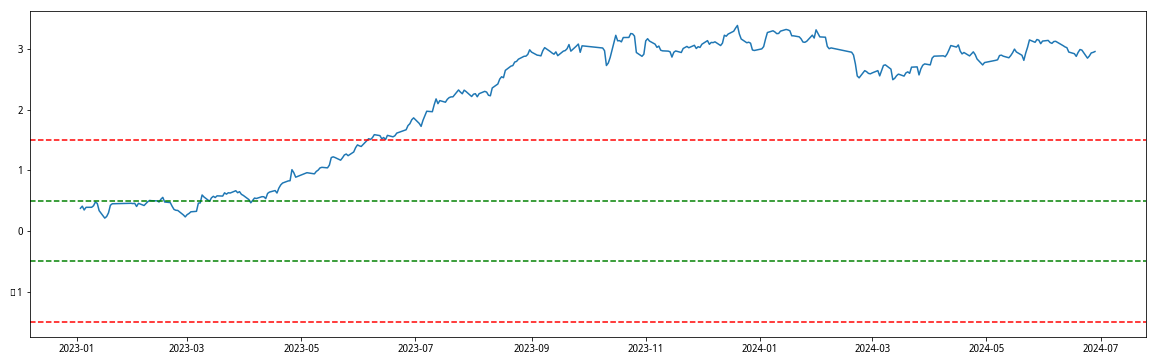

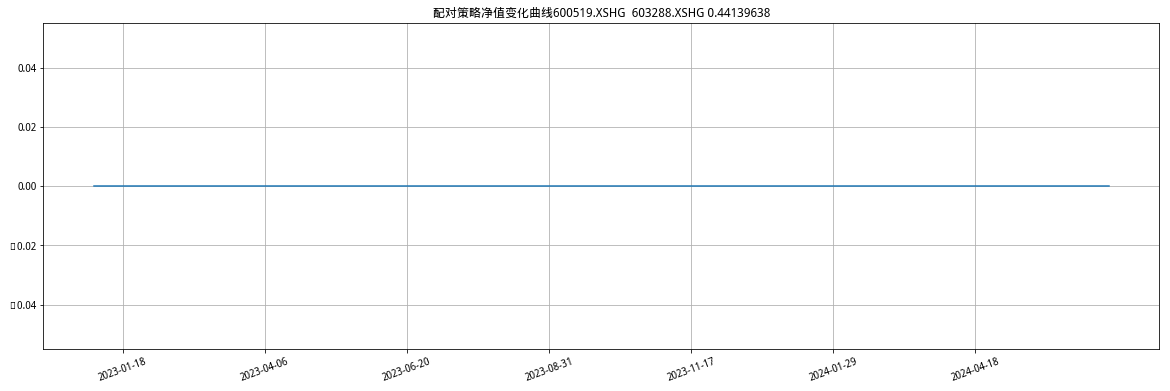

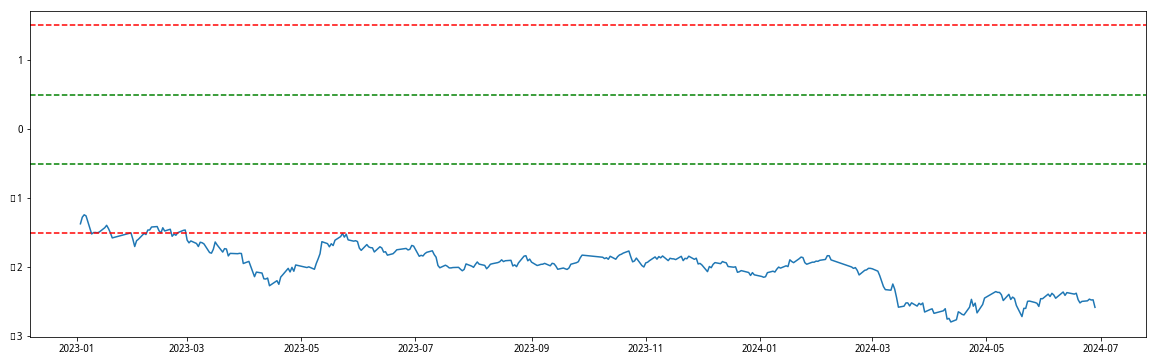

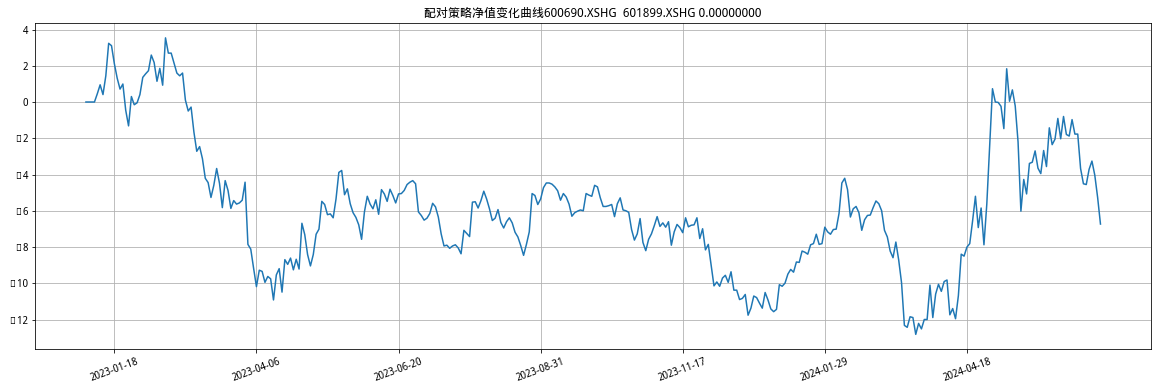

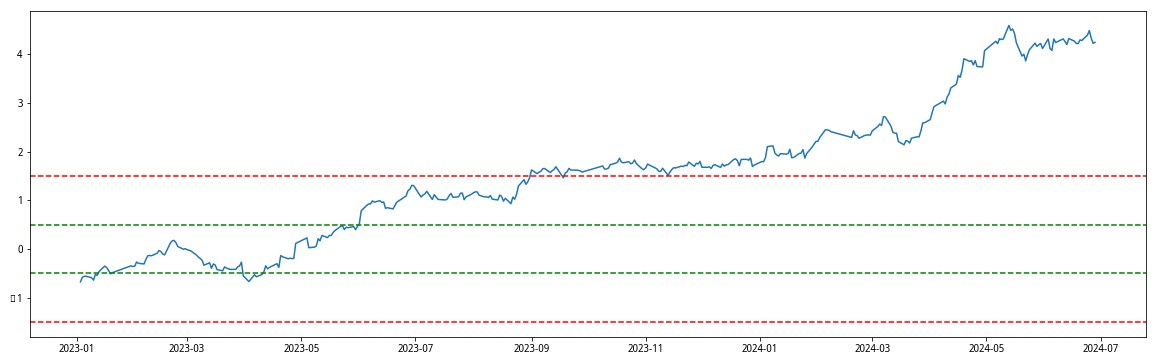

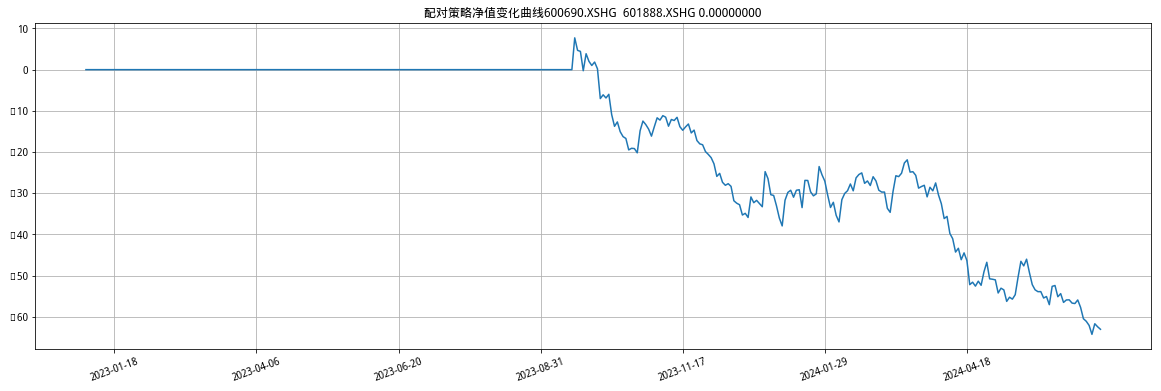

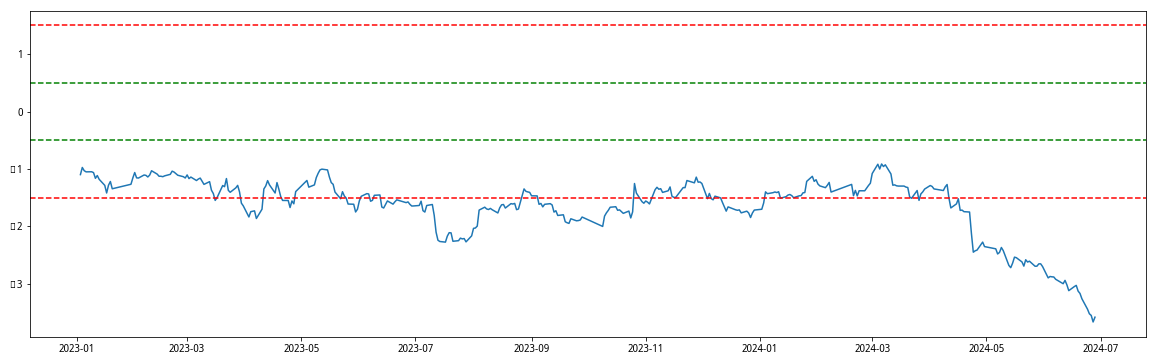

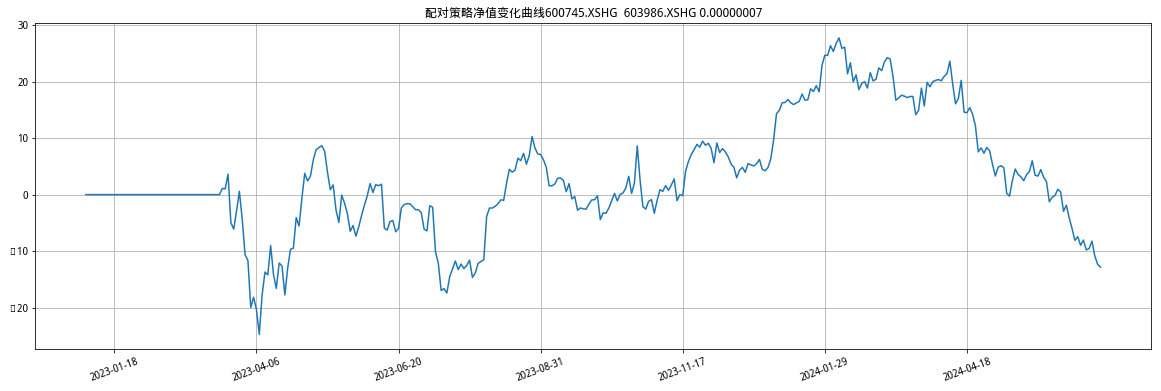

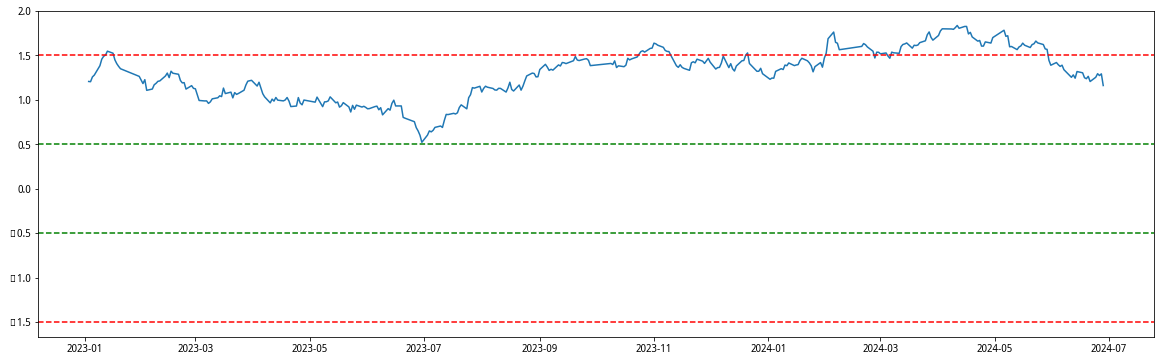

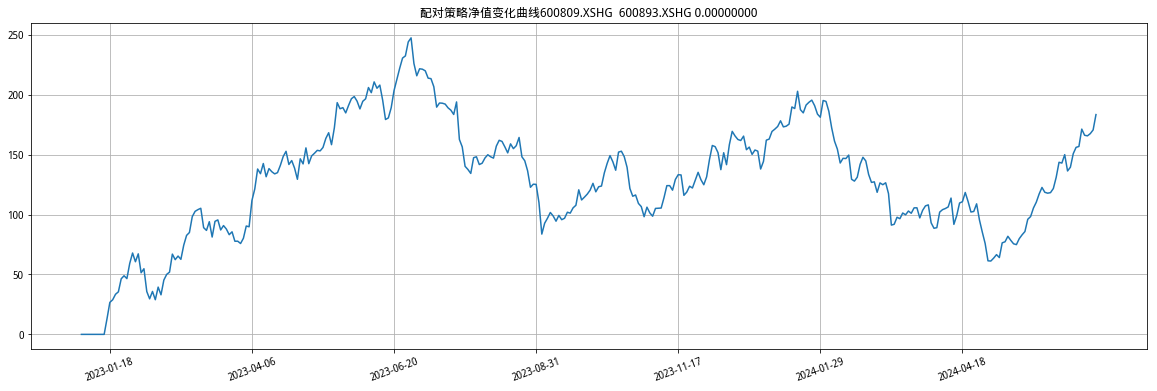

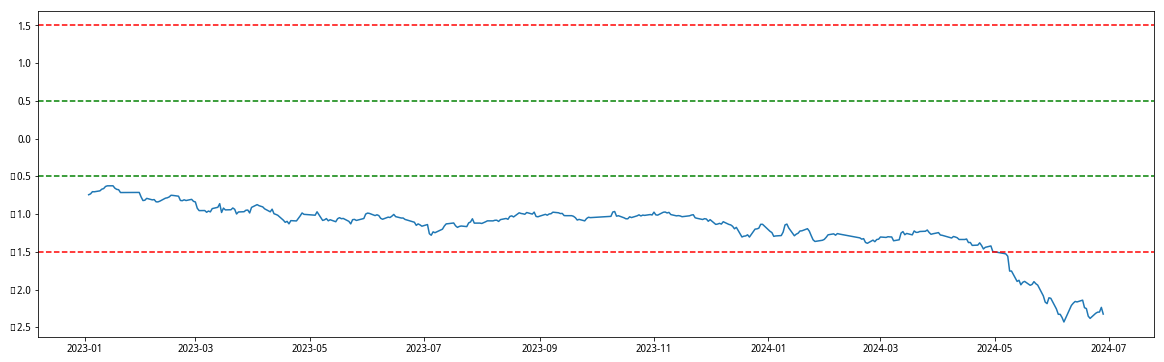

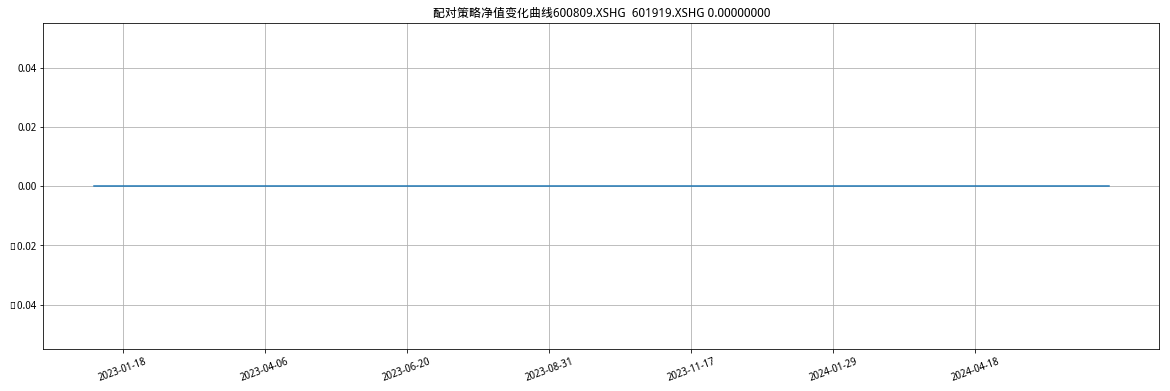

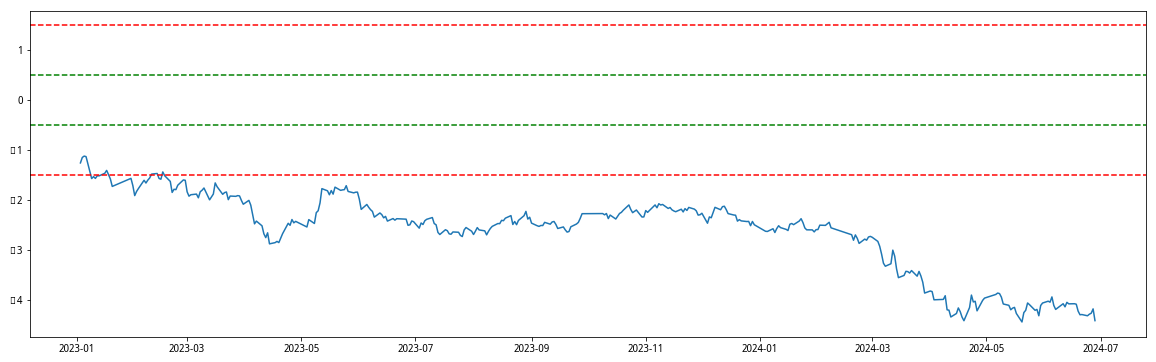

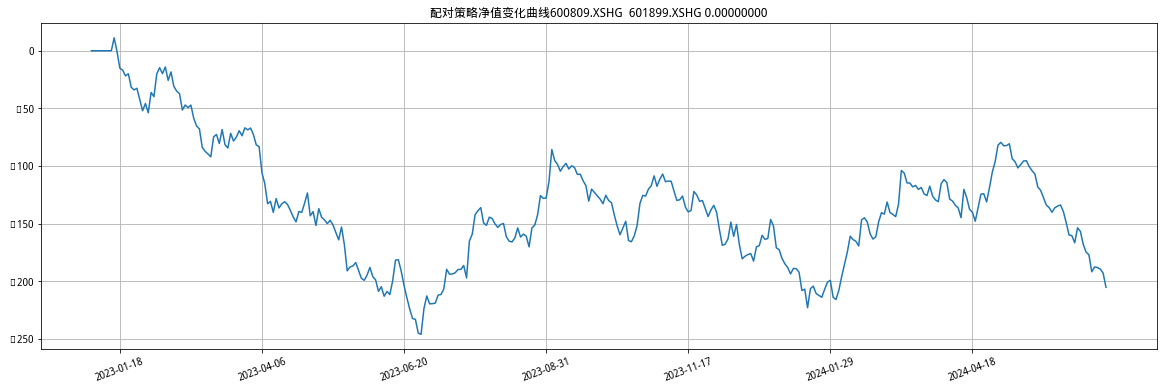

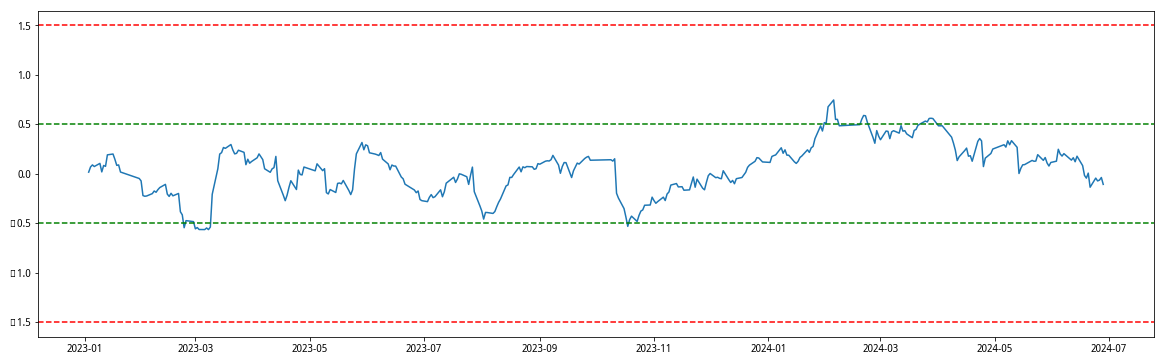

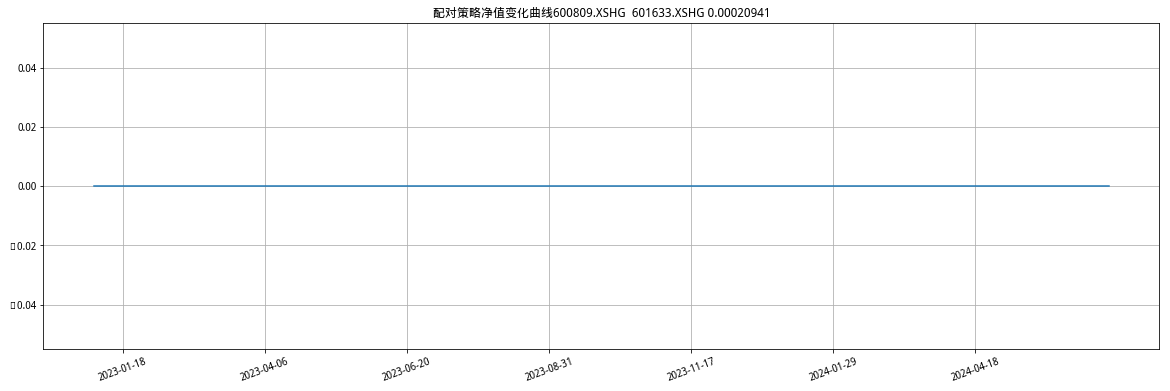

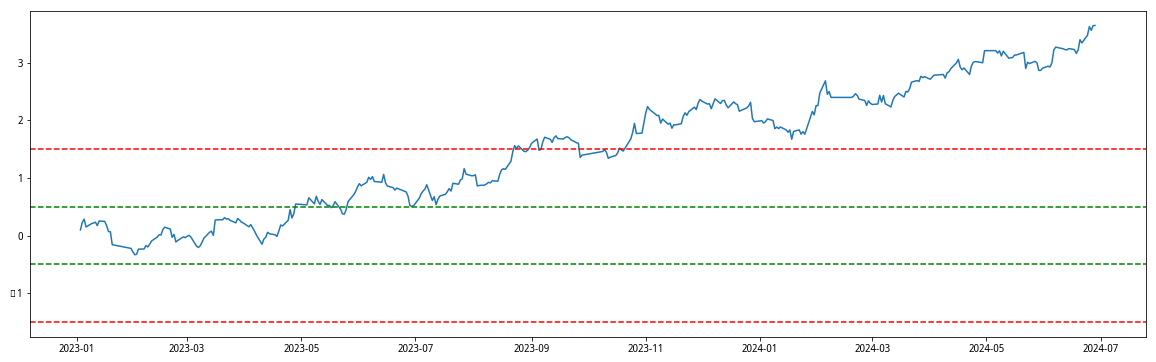

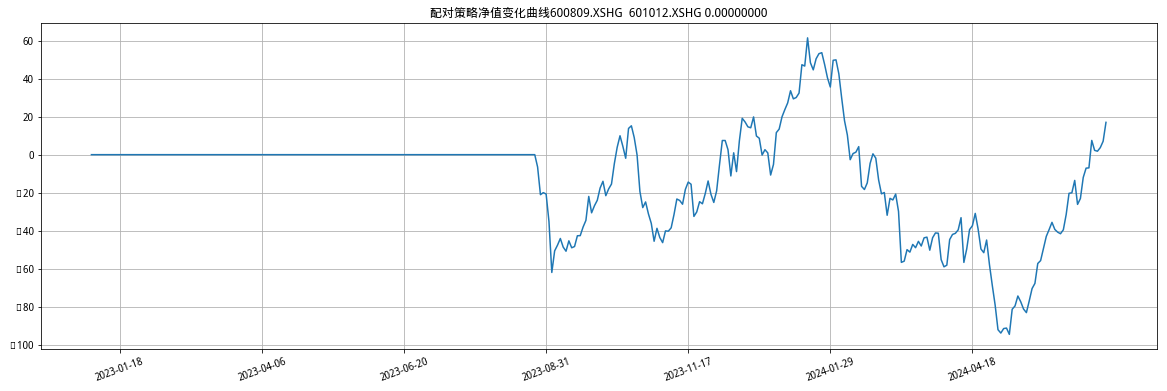

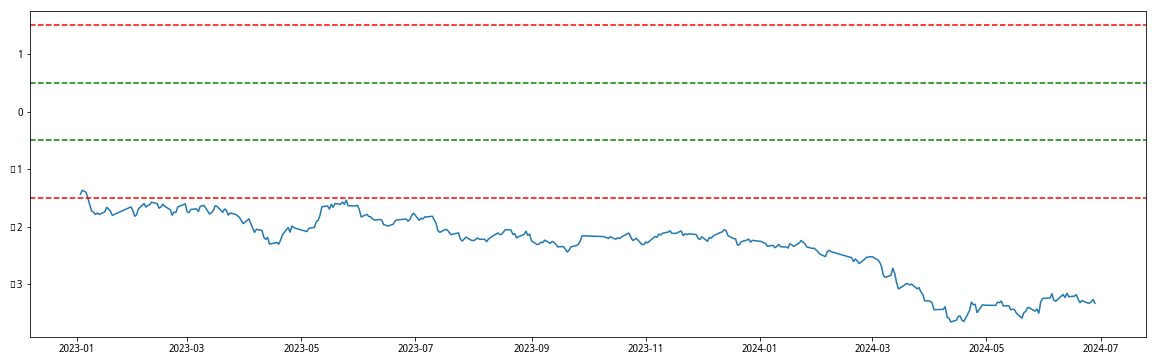

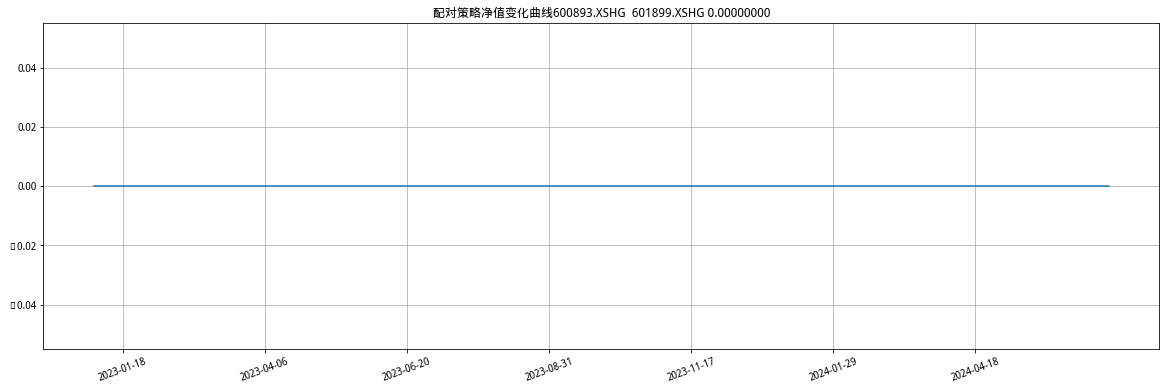

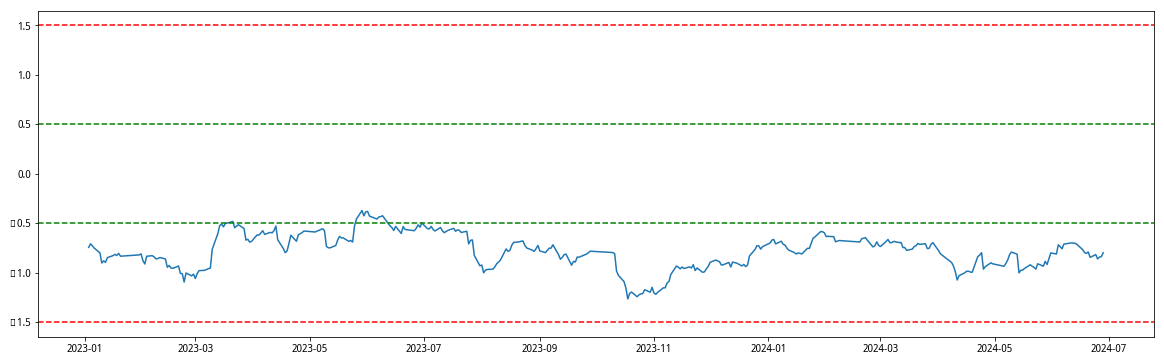

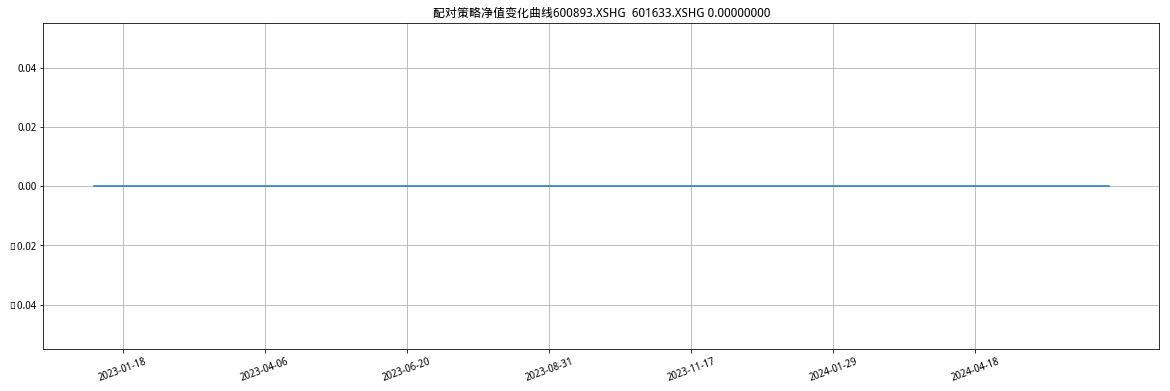

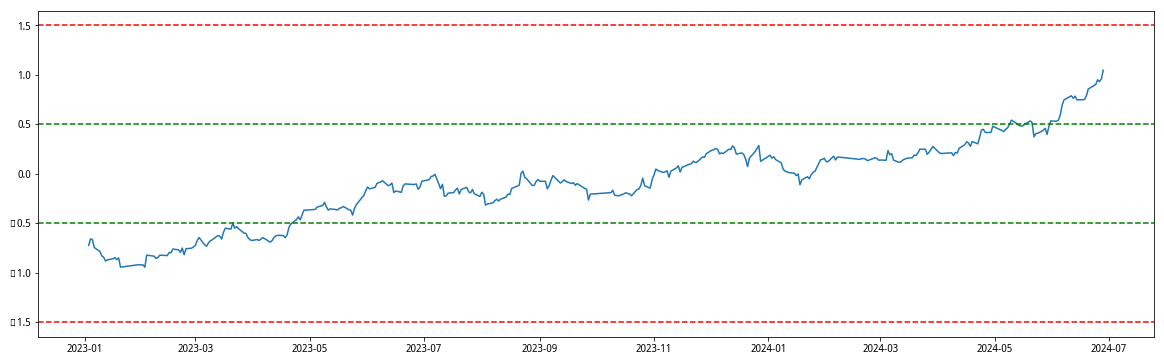

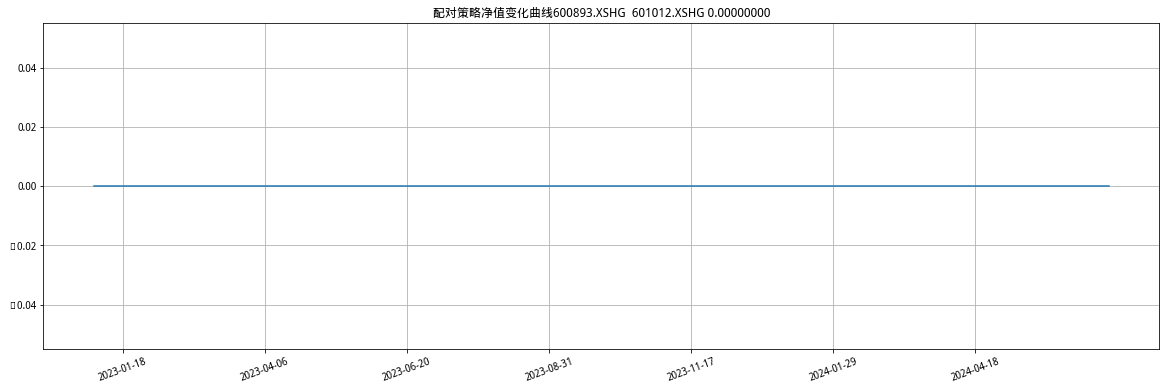

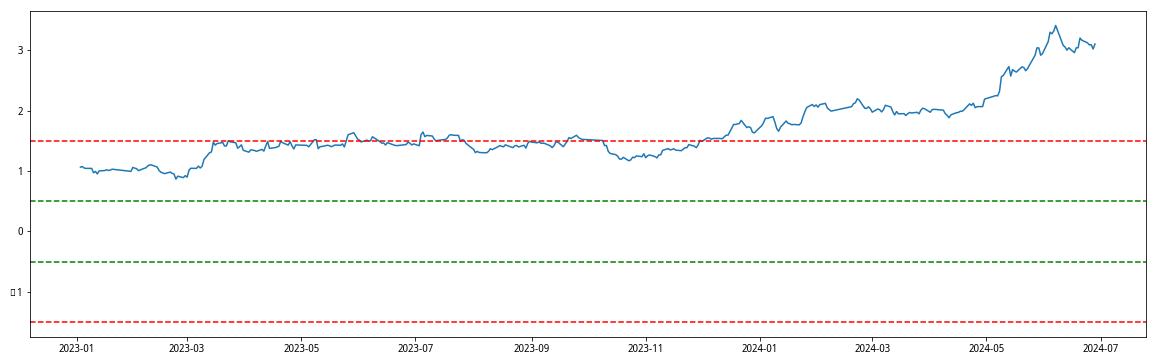

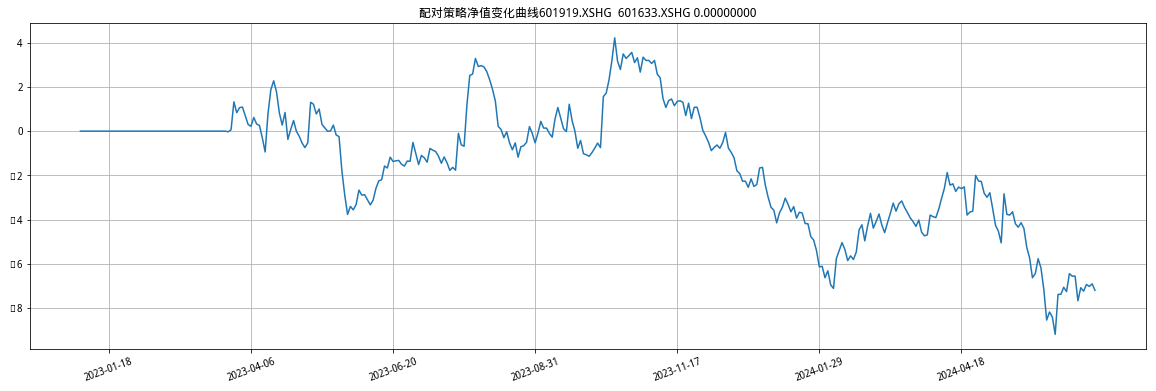

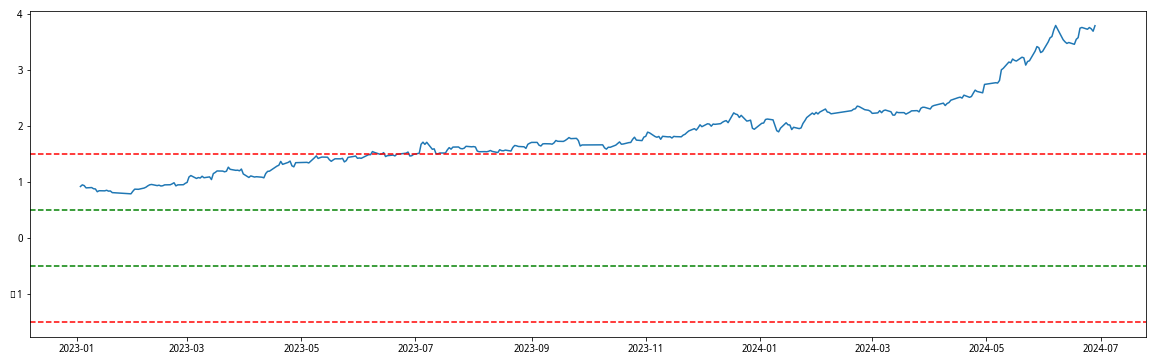

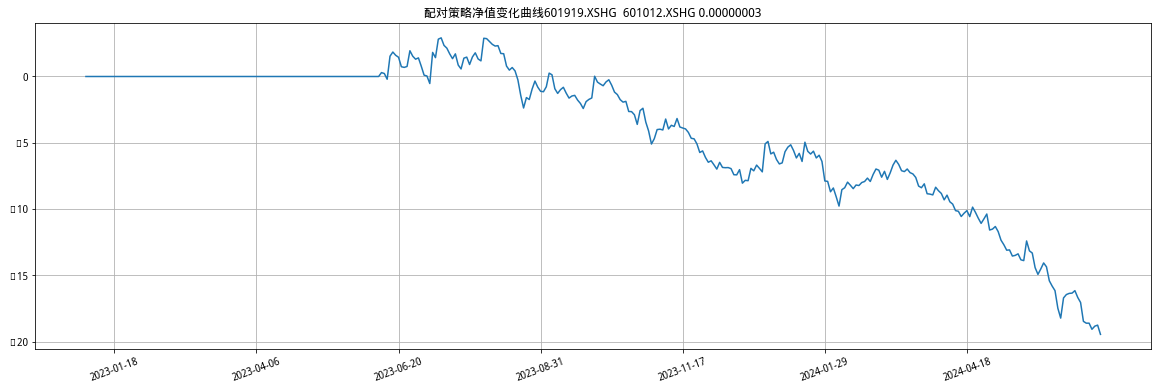

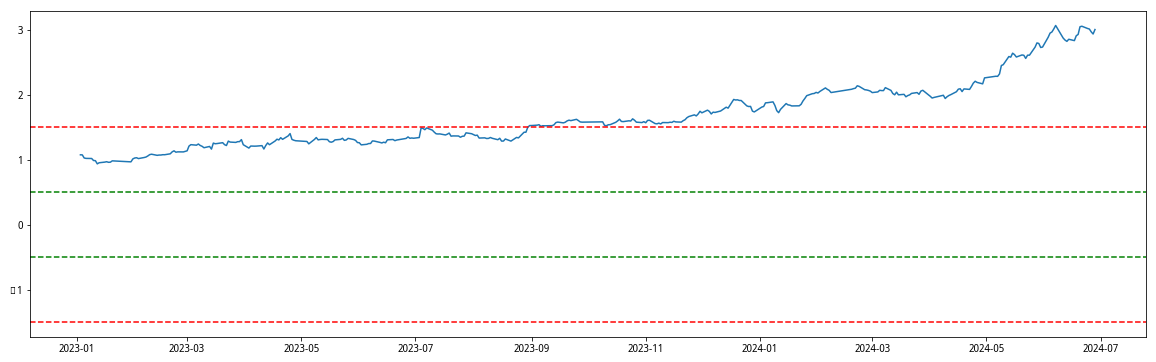

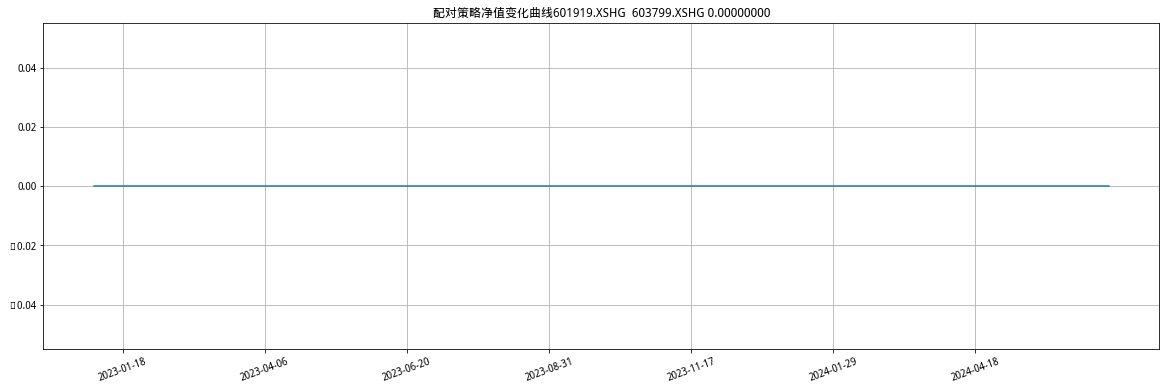

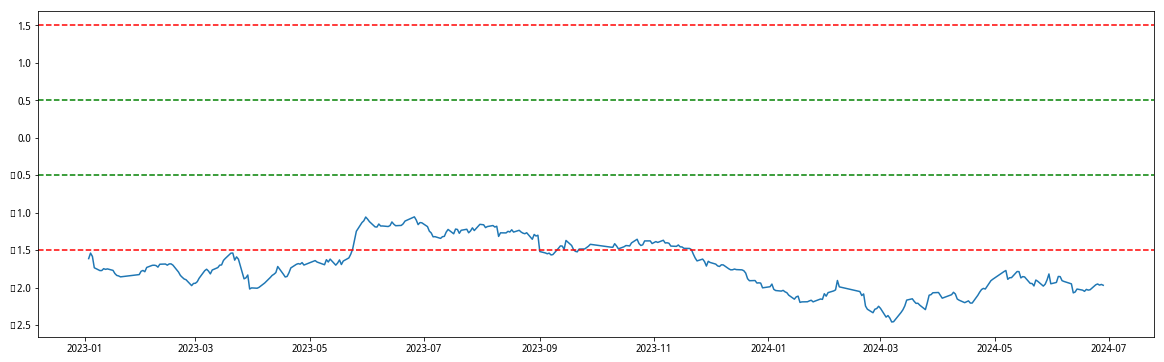

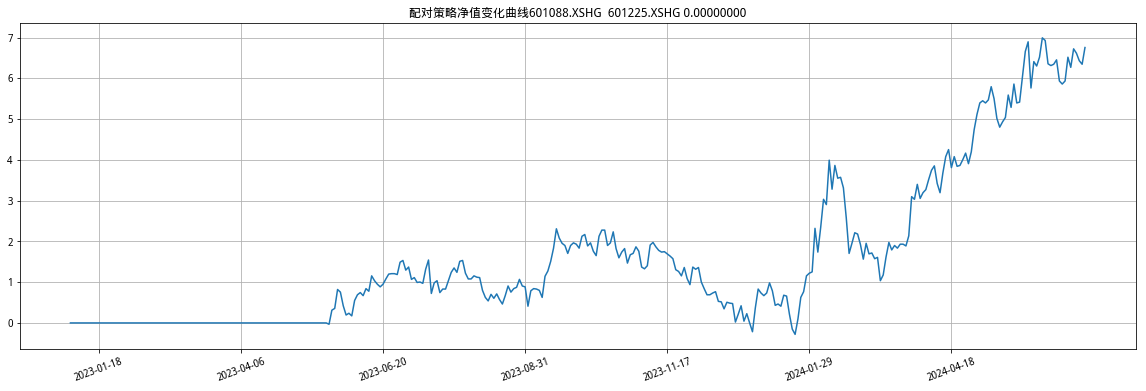

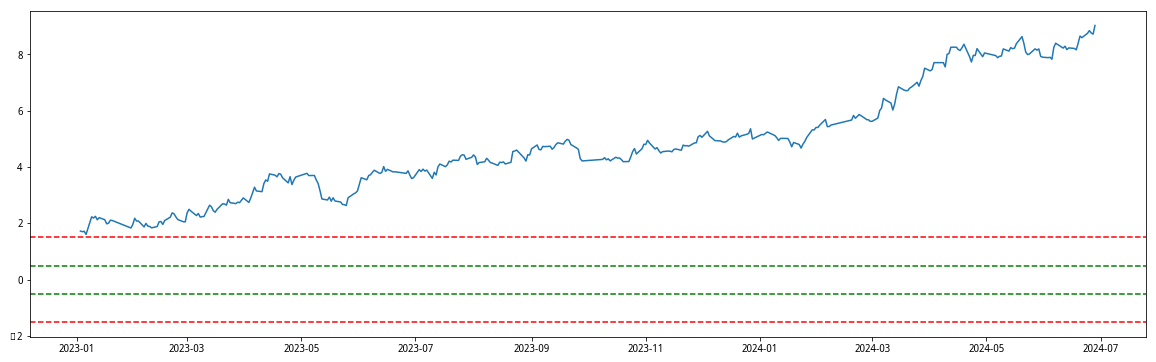

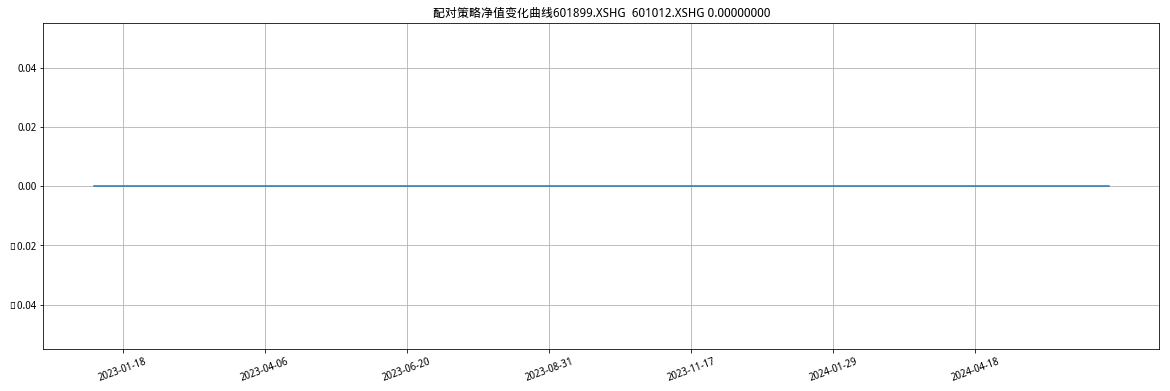

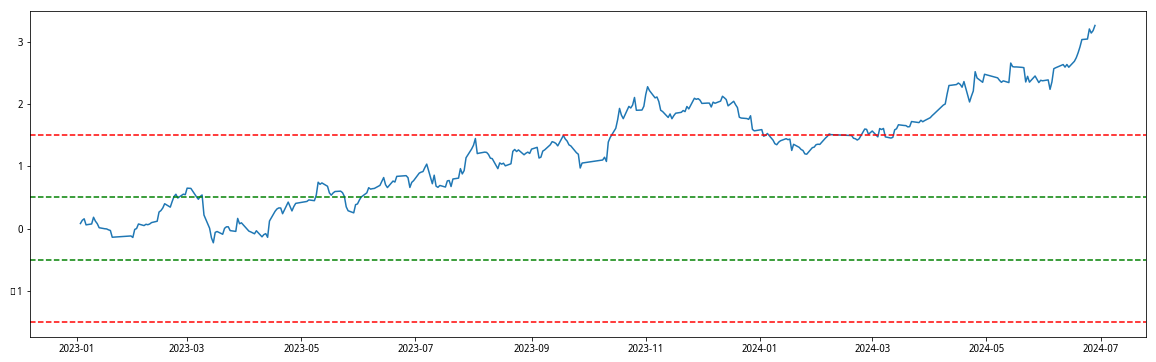

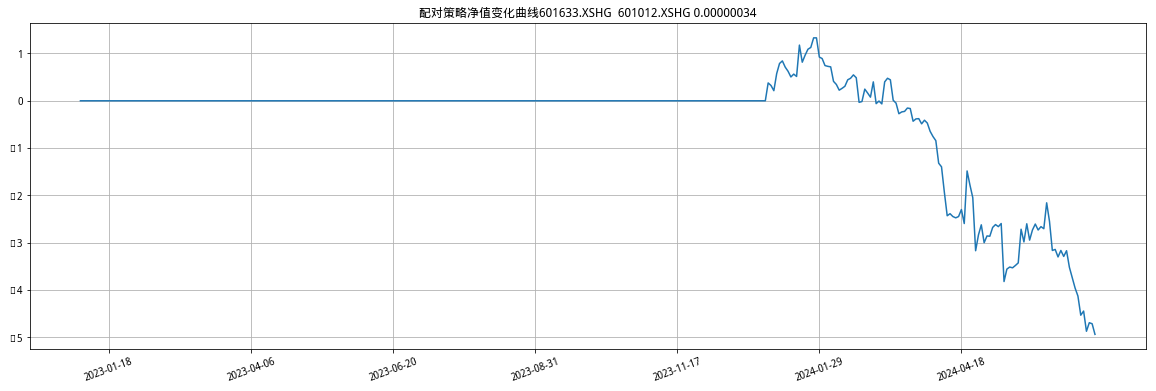

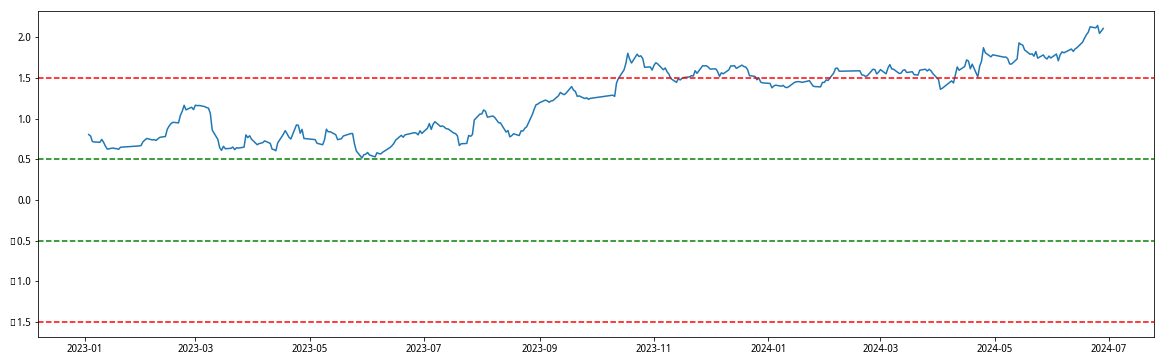

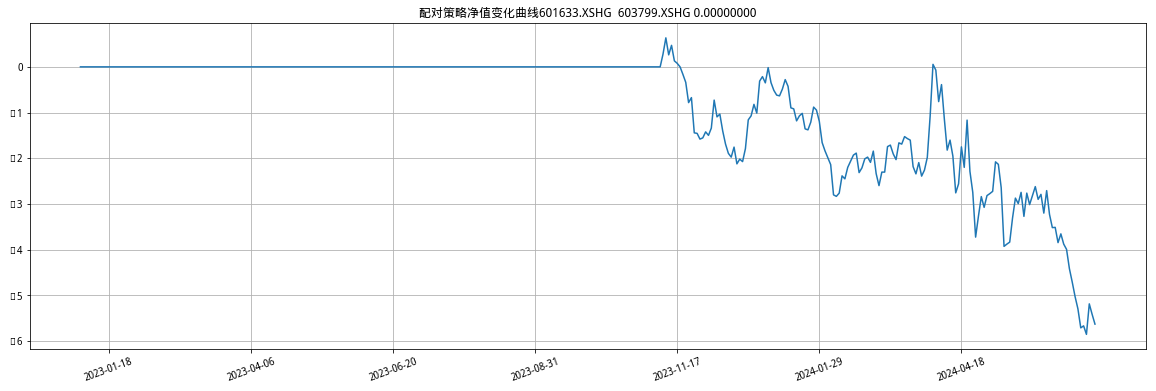

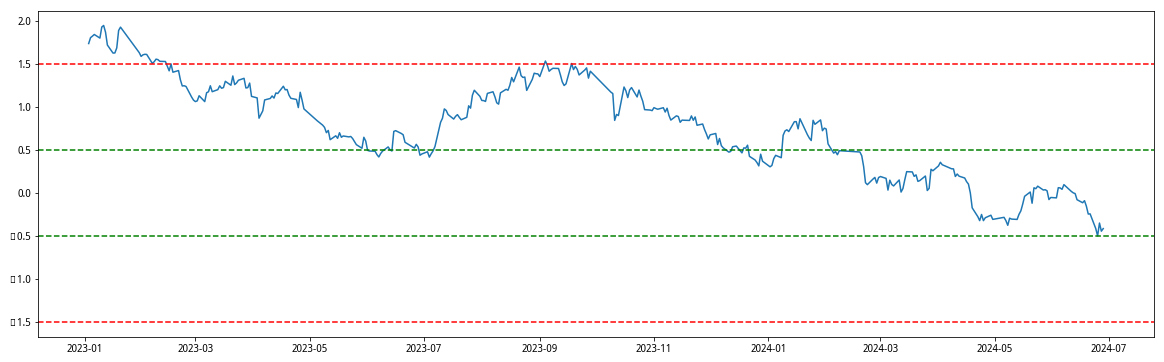

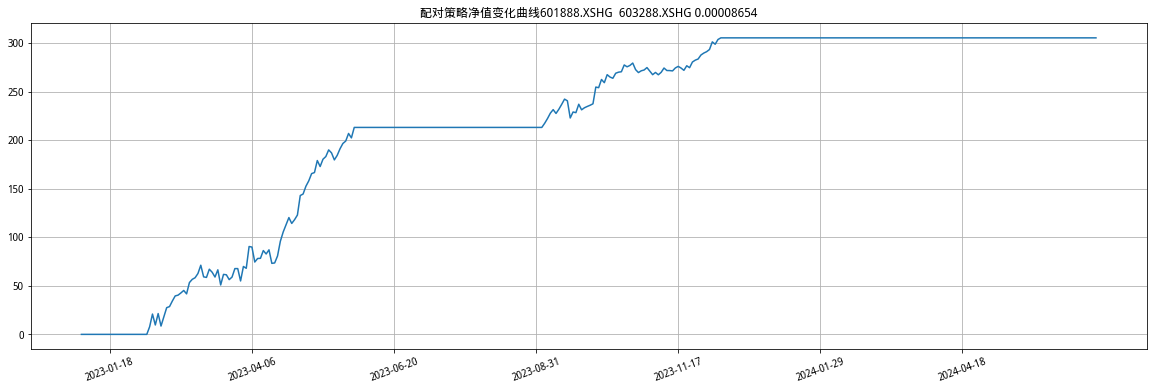

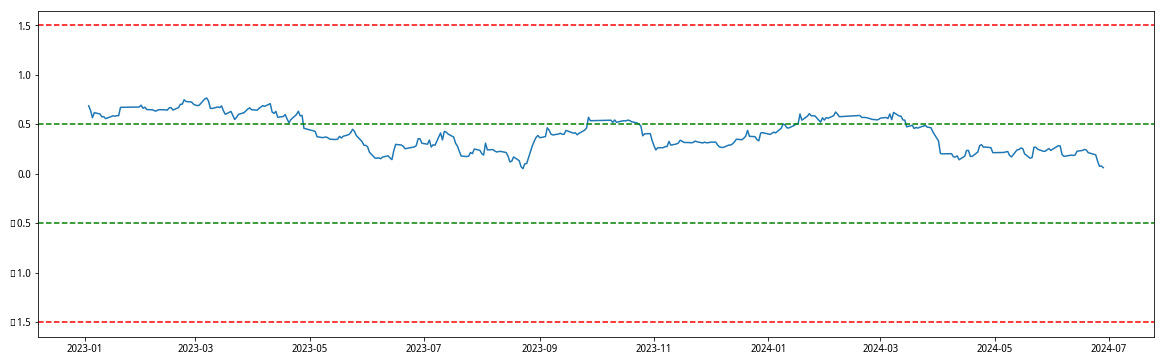

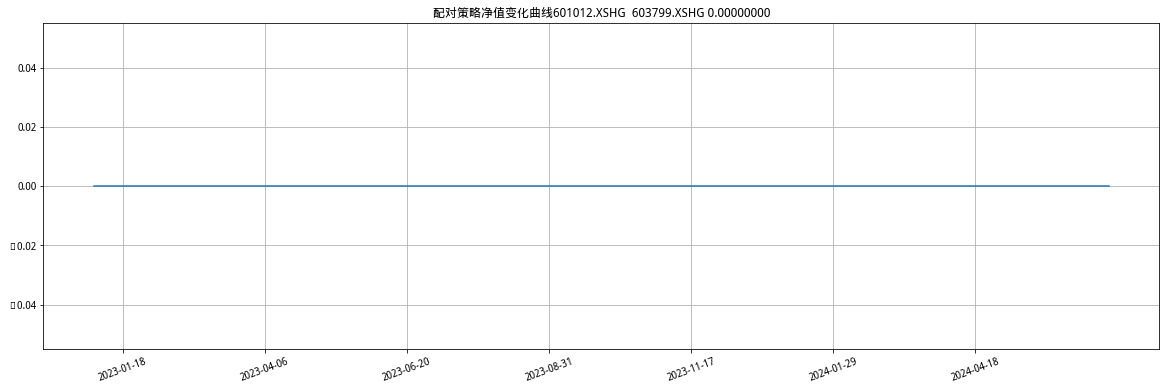

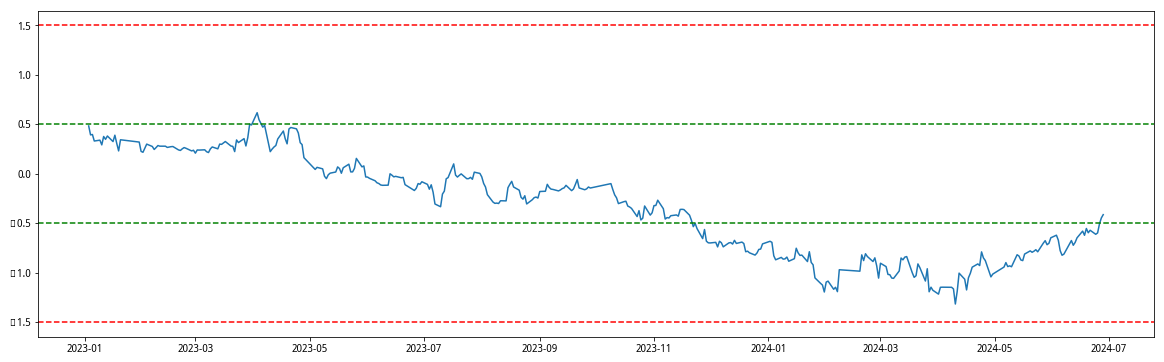

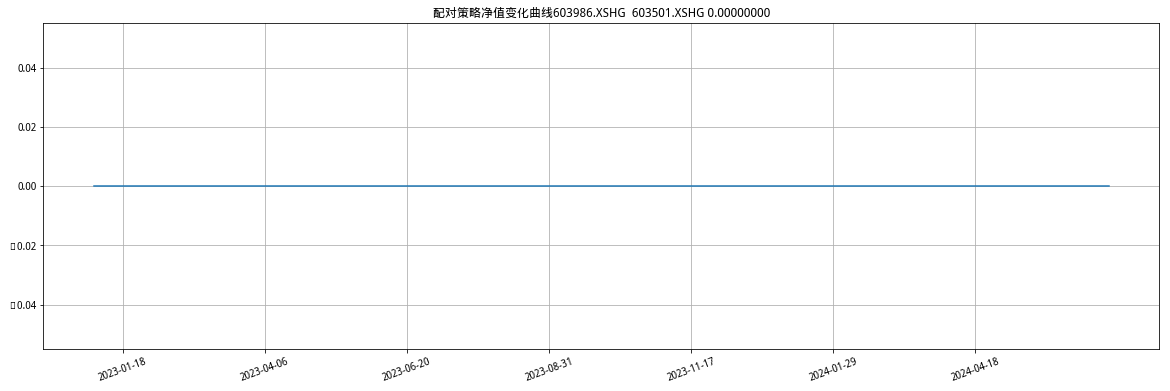

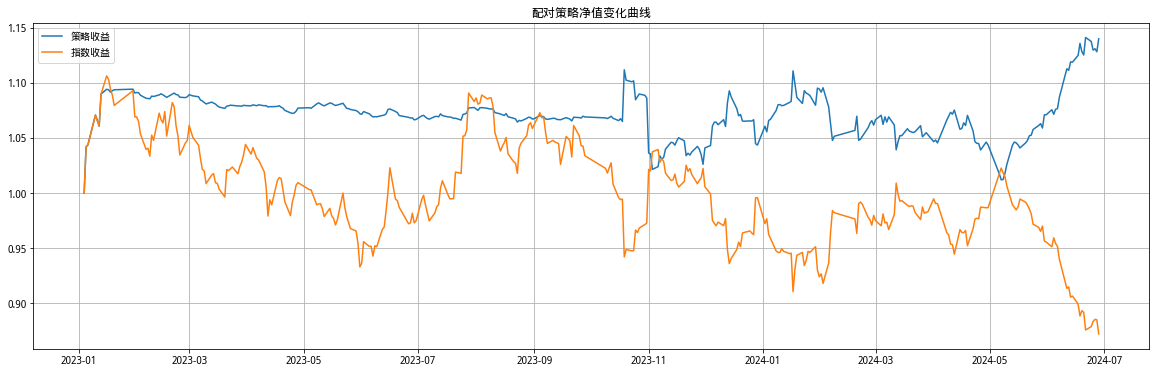

In [3]:
from datetime import datetime , timedelta

profit = np.zeros(len(get_price([selected[0][0]],start_date=test_start,end_date=test_end,fields='close')['close'])-1)

for stock in constituents:
    price = get_price(stock,start_date = (datetime.strptime(test_start, '%Y-%m-%d') + timedelta(days=3)).strftime('%Y-%m-%d'),end_date = test_end,fields='close')['close']
    weight = weights.loc[stock,'weight']
    #print(weight)
    #print( ' ')
    #print(price)
    profit += price*weight
#profit.drop(test_start)
origin = profit

final_profits = []
p_values = [] #研究p值和股票收益率的关系

for pair in selected:#遍历每组选出的股票
    name1 = pair[0]
    name2 = pair[1]
    
    price_mean=get_price([name1,name2],start_date = start_date,end_date = end_date,fields='close')['close']
    model = sm.OLS(np.log(price_mean[name1]),np.log(price_mean[name2])).fit()#建立线性回归模型
    slope=model.params[0]#产品1 vs 产品2 价格比例
    st_mean=np.log(price_mean[name1])-slope*np.log(price_mean[name2])#从震荡开始时计算差价，作为平均值和线性回归的参考
    
    jb_statistic, p_value = jarque_bera(np.log(price_mean[name1])-slope*np.log(price_mean[name2])) #获取p值
    

    price_std=get_price([name1,name2],start_date = start_date,end_date = end_date, fields='close')['close']
    st_std=np.log(price_std[name1])-slope*np.log(price_std[name2])#计算过去两年的差价，作为标准差的参考

    price_test=get_price([name1,name2],start_date = test_start ,end_date = test_end, fields='close')['close']
    st=np.log(price_test[name1])-slope*np.log(price_test[name2])#获取新一年的数据
    st=(st-np.mean(st_mean))/np.std(st_std)#使用过去数据的均值和标准差对新数据进行标准化
    
    
    ratio = p_value/total_p #根据p值进行分配，p值越大的配对更有机会有高收益
    ave = 1/len(selected) #可选择根据p值进行交易额分配，也可以平均分配
    
    plt.figure(figsize=(20,6))
    plt.plot(st)
    plt.axhline(y=1.5, color='r', linestyle='--')
    plt.axhline(y=-1.5, color='r', linestyle='--')
    plt.axhline(y=0.5, color='g', linestyle='--')
    plt.axhline(y=-0.5, color='g', linestyle='--')
    
    u=0
    quantity1=[]
    quantity2=[]
    num1=0
    num2=0
    us=[]
    for i in arange(1,len(st)):
        if u==0 and st[i-1]>1.5 and st[i] < 1.5:#产品1 价格高于 产品2
            num1=-weights.loc[name1,'weight']         #做空
            num2=-num1 #做多，期待差价回归平均值
            u=i
        elif u!=0 and st[i]<0.5 and st[i]>-0.5 : ##此时价差变为0，平仓
            num1=0
            num2=0
            u=0
        elif u==0 and st[i-1]<-1.5 and st[i] > -1.5:
            num1=weights.loc[name2,'weight']
            num2=-num1
            u=i
        quantity1.append(num1)
        quantity2.append(num2)
        
    rate1=price_test[name1].diff(1)[1:] /list(price_test[name1][:-1])#价格涨跌幅
    rate2=price_test[name2].diff(1)[1:] /list(price_test[name2][:-1])
    
    price1 = price_test[name1].diff(1)[1:]
    
    price2 = price_test[name2].diff(1)[1:]
    
    
    sumprofit=price1*quantity1+price2*quantity2#求每一组股票经过策略交易过后，每天的收益
    
    tempt=0 
    cumprofit = [] #各组股票的涨跌幅
    for i in arange(len(sumprofit)):
        tempt=tempt+sumprofit[i]
        cumprofit.append(tempt)
    #final_profits.append(cumrate[-1]/cumrate[0])
    p_values.append(p_value)
    plt.figure(figsize=(20,6))
    plt.plot(cumprofit)
    plt.title('配对策略净值变化曲线' + name1 +'  '+ name2 + ' '+ format(p_value, '.8f'))
    plt.grid(True)
    plt.xticks(np.arange(10,len(rate1.index),50),[str(rate1.index[i])[:10] for i in np.arange(10,len(rate1.index),50)],rotation=20)
    
    profit = profit + cumprofit  #添加至总涨跌幅
    


# 绘制表格，展示每天的收益率
origin /= origin[0]
profit /= profit[0]
plt.figure(figsize=(20,6))
plt.plot(profit, label = '策略收益')
plt.plot(origin, label = '指数收益')
#plt.xticks(np.arange(10,len(rate1.index),50),[str(rate1.index[i])[:10] for i in np.arange(10,len(rate1.index),50)],rotation=20)
plt.legend()
plt.title('配对策略净值变化曲线')
plt.grid(True)
                  
